## Data analysis

In [2]:
import math
from scipy.io import arff
from scipy.stats.stats import pearsonr
import pandas as pd
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
import json
# Formatação mais bonita para os notebooks
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

import json
from openai import OpenAI
import openai

api_key ="*************************************"
#client = OpenAI()
#client.api_key = api_key

client = OpenAI(
    # This is the default and can be omitted
    api_key=api_key,
)

import os


%matplotlib inline
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (15,5)


C:\Users\Justin\AppData\Local\Temp\ipykernel_115384\176426038.py:3: DeprecationWarning: Please use `pearsonr` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  from scipy.stats.stats import pearsonr


In [ ]:
chat_completion = client.chat.completions.create(
    messages=[
        {
            "role": "user",
            "content": "Say this is a test",
        }
    ],
    model="gpt-3.5-turbo",
)

In [20]:

response = client.Completion.create(
  engine="text-davinci-002",  # Or another model like "gpt-4" depending on your access
  prompt="Translate the following English text to French: 'Hello, how are you?'",
  max_tokens=60
)

print(response.choices[0].text.strip())

APIRemovedInV1: 

You tried to access openai.Completion, but this is no longer supported in openai>=1.0.0 - see the README at https://github.com/openai/openai-python for the API.

You can run `openai migrate` to automatically upgrade your codebase to use the 1.0.0 interface. 

Alternatively, you can pin your installation to the old version, e.g. `pip install openai==0.28`

A detailed migration guide is available here: https://github.com/openai/openai-python/discussions/742


## DESHARNAIS dataset

In [260]:
df_desharnais = pd.read_csv('../Data/02.desharnais.csv',  header=0)
df_desharnais.head()

id  Project  TeamExp  ManagerExp  YearEnd  Length  Effort  Transactions  \
0   1        1        1           4       85      12    5152           253   
1   2        2        0           0       86       4    5635           197   
2   3        3        4           4       85       1     805            40   
3   4        4        0           0       86       5    3829           200   
4   5        5        0           0       86       4    2149           140   

   Entities  PointsNonAdjust  Adjustment  PointsAjust  Language  
0        52              305          34          302         1  
1       124              321          33          315         1  
2        60              100          18           83         1  
3       119              319          30          303         1  
4        94              234          24          208         1

In [21]:
df_desharnais.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   id               81 non-null     int64
 1   Project          81 non-null     int64
 2   TeamExp          81 non-null     int64
 3   ManagerExp       81 non-null     int64
 4   YearEnd          81 non-null     int64
 5   Length           81 non-null     int64
 6   Effort           81 non-null     int64
 7   Transactions     81 non-null     int64
 8   Entities         81 non-null     int64
 9   PointsNonAdjust  81 non-null     int64
 10  Adjustment       81 non-null     int64
 11  PointsAjust      81 non-null     int64
 12  Language         81 non-null     int64
dtypes: int64(13)
memory usage: 8.4 KB


In [22]:
df_desharnais.describe()

id    Project    TeamExp  ManagerExp    YearEnd     Length  \
count  81.000000  81.000000  81.000000   81.000000  81.000000  81.000000   
mean   41.000000  41.000000   2.185185    2.530864  85.740741  11.666667   
std    23.526581  23.526581   1.415195    1.643825   1.222475   7.424621   
min     1.000000   1.000000  -1.000000   -1.000000  82.000000   1.000000   
25%    21.000000  21.000000   1.000000    1.000000  85.000000   6.000000   
50%    41.000000  41.000000   2.000000    3.000000  86.000000  10.000000   
75%    61.000000  61.000000   4.000000    4.000000  87.000000  14.000000   
max    81.000000  81.000000   4.000000    7.000000  88.000000  39.000000   

             Effort  Transactions    Entities  PointsNonAdjust  Adjustment  \
count     81.000000     81.000000   81.000000        81.000000   81.000000   
mean    5046.308642    182.123457  122.333333       304.456790   27.629630   
std     4418.767228    144.035098   84.882124       180.210159   10.591795   
min      546.000000      9.000000    7.000000        73.000000    5.000000   
25%     2352.000000     88.000000   57.000000       176.000000   20.000000   
50%     3647.000000    140.000000   99.000000       266.000000   28.000000   
75%     5922.000000    224.000000  169.000000       384.000000   35.000000   
max    23940.000000    886.000000  387.000000      1127.000000   52.000000   

       PointsAjust   Language  
count    81.000000  81.000000  
mean    289.234568   1.555556  
std     185.761088   0.707107  
min      62.000000   1.000000  
25%     152.000000   1.000000  
50%     255.000000   1.000000  
75%     351.000000   2.000000  
max    1116.000000   3.000000

In [48]:
formatted_data = [
    {
        "prompt": f"Project description: project number {row['id']}, Team's years of experiance: {row['TeamExp']}, Manager's years of experiance: {row['ManagerExp']}, Entities involved: 19{row['Entities']}, Language: {row['Language']};",
        "completion": f" Estimated cost: {row['Effort']} hours\n"
    }
    for index, row in df_desharnais.iterrows()
]

# To show the first few formatted entries, if you want to check the formatting
print(formatted_data[:5])

[{'prompt': "Project description: project number 1, Team's years of experiance: 1, Manager's years of experiance: 4, Entities involved: 1952, Language: 1;", 'completion': ' Estimated cost: 5152 hours\n'}, {'prompt': "Project description: project number 2, Team's years of experiance: 0, Manager's years of experiance: 0, Entities involved: 19124, Language: 1;", 'completion': ' Estimated cost: 5635 hours\n'}, {'prompt': "Project description: project number 3, Team's years of experiance: 4, Manager's years of experiance: 4, Entities involved: 1960, Language: 1;", 'completion': ' Estimated cost: 805 hours\n'}, {'prompt': "Project description: project number 4, Team's years of experiance: 0, Manager's years of experiance: 0, Entities involved: 19119, Language: 1;", 'completion': ' Estimated cost: 3829 hours\n'}, {'prompt': "Project description: project number 5, Team's years of experiance: 0, Manager's years of experiance: 0, Entities involved: 1994, Language: 1;", 'completion': ' Estimated 

In [291]:
new_train_df, new_test_df = train_test_split(df_desharnais, test_size=0.10, random_state=22)

In [292]:
test_data = [
    {
        "What is the estimated cost of hours of a Project with the description": f"Team's years of experiance: {row['TeamExp']}, Manager's years of experiance: {row['ManagerExp']}, Entities involved: 19{row['Entities']}, Transactions: {row['Transactions']};",
    }
    for index, row in new_test_df.iterrows()
]

# To show the first few formatted entries, if you want to check the formatting
print(test_data[:5])

[{'What is the estimated cost of hours of a Project with the description': "Team's years of experiance: 4, Manager's years of experiance: 3, Entities involved: 19176, Transactions: 469;"}, {'What is the estimated cost of hours of a Project with the description': "Team's years of experiance: 4, Manager's years of experiance: 7, Entities involved: 1974, Transactions: 69;"}, {'What is the estimated cost of hours of a Project with the description': "Team's years of experiance: 2, Manager's years of experiance: 4, Entities involved: 19132, Transactions: 306;"}, {'What is the estimated cost of hours of a Project with the description': "Team's years of experiance: 4, Manager's years of experiance: 4, Entities involved: 19241, Transactions: 886;"}, {'What is the estimated cost of hours of a Project with the description': "Team's years of experiance: 4, Manager's years of experiance: 1, Entities involved: 19230, Transactions: 86;"}]


In [49]:
with open('formatted_desharnais_data.json', 'w') as f:
    json.dump(formatted_data, f)

In [50]:
with open('formatted_data.json', 'w') as f:
    for entry in formatted_data:
        json.dump(entry, f)
        f.write('\n')

In [34]:
openai.api_key = api_key
with open('formatted_data.json', 'rb') as f:
    response = openai.File.create(file=f, purpose='fine-tune')
    file_id = response['id']

# Initiating fine-tuning
fine_tune_response = openai.FineTune.create(
    training_file=file_id,
    model="ada",
    n_epochs=4
)

print(fine_tune_response)

APIRemovedInV1: 

You tried to access openai.File, but this is no longer supported in openai>=1.0.0 - see the README at https://github.com/openai/openai-python for the API.

You can run `openai migrate` to automatically upgrade your codebase to use the 1.0.0 interface. 

Alternatively, you can pin your installation to the old version, e.g. `pip install openai==0.28`

A detailed migration guide is available here: https://github.com/openai/openai-python/discussions/742


In [44]:
response = client.fine_tuning.jobs.create(
  training_file="file-tlfF0903zVUpVWYWj7ugJRcT", # This will be returned from the upload step
  model="davinci-002", # Choose your model
#  n_epochs=4, # Set the number of training epochs
#  learning_rate_multiplier=0.1 # Optional: adjust the learning rate
)

print(response)

FineTuningJob(id='ftjob-b3Z24Nh6T0J3jvsK376l5gtn', created_at=1712954461, error=Error(code=None, message=None, param=None, error=None), fine_tuned_model=None, finished_at=None, hyperparameters=Hyperparameters(n_epochs='auto', batch_size='auto', learning_rate_multiplier='auto'), model='davinci-002', object='fine_tuning.job', organization_id='org-d2WLxCG6JKxfVlRZ2nXk8UD4', result_files=[], status='validating_files', trained_tokens=None, training_file='file-tlfF0903zVUpVWYWj7ugJRcT', validation_file=None, user_provided_suffix=None, seed=2095677296, integrations=[])


In [55]:
client.fine_tuning.jobs.retrieve('ftjob-b3Z24Nh6T0J3jvsK376l5gtn')

FineTuningJob(id='ftjob-b3Z24Nh6T0J3jvsK376l5gtn', created_at=1712954461, error=Error(code=None, message=None, param=None, error=None), fine_tuned_model='ft:davinci-002:personal::9DIXI8fw', finished_at=1712956543, hyperparameters=Hyperparameters(n_epochs=3, batch_size=1, learning_rate_multiplier=16), model='davinci-002', object='fine_tuning.job', organization_id='org-d2WLxCG6JKxfVlRZ2nXk8UD4', result_files=['file-4Anii9x2acDrDUpAyeyloPtT'], status='succeeded', trained_tokens=11643, training_file='file-tlfF0903zVUpVWYWj7ugJRcT', validation_file=None, user_provided_suffix=None, seed=2095677296, integrations=[])

In [52]:
response = client.fine_tuning.jobs.create(
  training_file="file-7VOhW6zIdrQ9fGNkXTZlasrG", # This will be returned from the upload step
  model="davinci-002", # Choose your model
#  n_epochs=4, # Set the number of training epochs
#  learning_rate_multiplier=0.1 # Optional: adjust the learning rate
)

print(response)

FineTuningJob(id='ftjob-s7NUzANRZ4XBR8oOAZWP5EIS', created_at=1712955566, error=Error(code=None, message=None, param=None, error=None), fine_tuned_model=None, finished_at=None, hyperparameters=Hyperparameters(n_epochs='auto', batch_size='auto', learning_rate_multiplier='auto'), model='davinci-002', object='fine_tuning.job', organization_id='org-d2WLxCG6JKxfVlRZ2nXk8UD4', result_files=[], status='validating_files', trained_tokens=None, training_file='file-7VOhW6zIdrQ9fGNkXTZlasrG', validation_file=None, user_provided_suffix=None, seed=1247424156, integrations=[])


In [54]:
client.fine_tuning.jobs.retrieve('ftjob-s7NUzANRZ4XBR8oOAZWP5EIS')

FineTuningJob(id='ftjob-s7NUzANRZ4XBR8oOAZWP5EIS', created_at=1712955566, error=Error(code=None, message=None, param=None, error=None), fine_tuned_model='ft:davinci-002:personal::9DIXLRr6', finished_at=1712956545, hyperparameters=Hyperparameters(n_epochs=3, batch_size=1, learning_rate_multiplier=16), model='davinci-002', object='fine_tuning.job', organization_id='org-d2WLxCG6JKxfVlRZ2nXk8UD4', result_files=['file-xYVFGZVngpI4vfLJZhBV2gOD'], status='succeeded', trained_tokens=11640, training_file='file-7VOhW6zIdrQ9fGNkXTZlasrG', validation_file=None, user_provided_suffix=None, seed=1247424156, integrations=[])

In [2]:
client.fine_tuning.jobs.retrieve('ftjob-s7NUzANRZ4XBR8oOAZWP5EIS')

FineTuningJob(id='ftjob-s7NUzANRZ4XBR8oOAZWP5EIS', created_at=1712955566, error=Error(code=None, message=None, param=None, error=None), fine_tuned_model='ft:davinci-002:personal::9DIXLRr6', finished_at=1712956545, hyperparameters=Hyperparameters(n_epochs=3, batch_size=1, learning_rate_multiplier=16), model='davinci-002', object='fine_tuning.job', organization_id='org-d2WLxCG6JKxfVlRZ2nXk8UD4', result_files=['file-xYVFGZVngpI4vfLJZhBV2gOD'], status='succeeded', trained_tokens=11640, training_file='file-7VOhW6zIdrQ9fGNkXTZlasrG', validation_file=None, user_provided_suffix=None, seed=1247424156, integrations=[])

In [56]:
responses = []
for prompt in test_data:
    response = openai.Completion.create(
        engine="fine-tuned-model-id",  # Replace with your model's ID
        prompt=prompt,
        max_tokens=50  # Adjust based on your needs
    )
    responses.append(response.choices[0].text.strip())

NameError: name 'test_data' is not defined

In [3]:
isbsg_2016 = pd.read_csv('../Data/ISBSG Release 2016 R1.1.csv',  header=3,encoding = "ISO-8859-1")
isbsg_2016

C:\Users\Justin\AppData\Local\Temp\ipykernel_115384\1064696797.py:1: DtypeWarning: Columns (222) have mixed types. Specify dtype option on import or set low_memory=False.
  isbsg_2016 = pd.read_csv('../Data/ISBSG Release 2016 R1.1.csv',  header=3,encoding = "ISO-8859-1")


ISBSG Project ID Data Quality Rating UFP rating  Year of Project  \
0                10001                   D          A             1998   
1                10003                   B          B             2015   
2                10011                   B          A             1996   
3                10012                   B          A             2002   
4                10014                   B          A             2004   
...                ...                 ...        ...              ...   
7513             32757                   B          A             1998   
7514             32758                   B          A             1995   
7515             32762                   B          B             2014   
7516             32766                   A        NaN             2000   
7517             32767                   B          B             2009   

         Industry Sector                 Organisation Type  \
0       Service Industry  Recreation & Personnel Services;   
1          Communication               Telecommunications;   
2           Construction                     Construction;   
3     Wholesale & Retail                          Billing;   
4                    NaN                               NaN   
...                  ...                               ...   
7513                 NaN                               NaN   
7514          Government                       Government;   
7515       Communication               Telecommunications;   
7516          Government            Public Administration;   
7517       Manufacturing                    Manufacturing;   

         Application Group                   Application Type  \
0     Business Application     Transaction/Production System;   
1     Business Application                    Online. eSales;   
2     Business Application  Stock control & order processing;   
3     Business Application                           Billing;   
4                      NaN                                NaN   
...                    ...                                ...   
7513                   NaN                                NaN   
7514  Business Application     Management Information System;   
7515  Business Application  Customer relationship management;   
7516  Business Application       Electronic Data Interchange;   
7517  Business Application                      Cars selling;   

     Development Type Development Platform  ... Graphic Artist Developer  \
0     New Development                   MR  ...            NaN       NaN   
1         Enhancement                Multi  ...            NaN       NaN   
2     New Development                Multi  ...            NaN       NaN   
3         Enhancement                  NaN  ...            NaN       NaN   
4         Enhancement                  NaN  ...            NaN       NaN   
...               ...                  ...  ...            ...       ...   
7513  New Development                  NaN  ...            NaN       NaN   
7514      Enhancement                   MF  ...            NaN       NaN   
7515      Enhancement                Multi  ...            NaN       NaN   
7516  New Development                   PC  ...            NaN       NaN   
7517      Enhancement                Multi  ...            NaN       NaN   

     QA/Tester  Training & Documentation Database Administrator  \
0          NaN                       NaN                    NaN   
1          NaN                       NaN                    NaN   
2          NaN                       NaN                    NaN   
3          NaN                       NaN                    NaN   
4          NaN                       NaN                    NaN   
...        ...                       ...                    ...   
7513       NaN                       NaN                    NaN   
7514       NaN                       NaN                    NaN   
7515       NaN                       NaN                    NaN   
7516    

In [4]:
isbsg_2016.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7518 entries, 0 to 7517
Columns: 264 entries, ISBSG Project ID to Other (2) Effort
dtypes: float64(92), int64(2), object(170)
memory usage: 15.1+ MB


In [70]:
isbsg_2016.describe()

ISBSG Project ID  Year of Project  Functional Size  \
count       7518.000000      7518.000000      6526.000000   
mean       21336.047353      2004.631285       334.082286   
std         6546.024412         5.871149       730.189014   
min        10001.000000      1989.000000         1.000000   
25%        15669.750000      2000.000000        64.000000   
50%        21336.000000      2004.000000       139.000000   
75%        26913.500000      2010.000000       332.000000   
max        32767.000000      2015.000000     19050.000000   

       Adjusted Function Points  Value Adjustment Factor  \
count               6227.000000              2006.000000   
mean                 361.838927                 1.033958   
std                  918.906307                 0.109492   
min                    3.000000                 0.300000   
25%                   63.000000                 1.000000   
50%                  138.000000                 1.000000   
75%                  327.000000                 1.100000   
max                20000.000000                 1.350000   

       Normalised Work Effort Level 1  Normalised Work Effort  \
count                     6673.000000             7499.000000   
mean                      4011.202757             4755.116682   
std                       8910.532499            15976.871173   
min                          2.000000                2.000000   
25%                        619.000000              687.000000   
50%                       1593.000000             1699.000000   
75%                       3933.000000             4219.500000   
max                     230514.000000           645694.000000   

       Summary Work Effort  Normalised Level 1 PDR (ufp)  \
count          7499.000000                   5733.000000   
mean           4339.545539                     30.429304   
std           15246.356949                     83.787086   
min               2.000000                      0.100000   
25%             619.000000                      5.400000   
50%            1550.000000                     11.200000   
75%            3876.500000                     24.000000   
max          645694.000000                   2816.300000   

       Normalised PDR (ufp)  ...  Software Architect  User-Interface  \
count           6509.000000  ...          138.000000       55.000000   
mean              28.953895  ...          860.688406      353.472727   
std               78.943767  ...         1936.845896      461.453374   
min                0.100000  ...            0.000000        0.000000   
25%                5.700000  ...          128.250000       74.000000   
50%               11.600000  ...          380.000000      181.000000   
75%               23.600000  ...          704.750000      448.000000   
max             2816.300000  ...        17984.000000     2400.000000   

       Graphic Artist     Developer     QA/Tester  Training & Documentation  \
count       26.000000    203.000000    170.000000                 55.000000   
mean       750.961538   2886.295567   1445.982353                198.472727   
std       3309.130683   5487.999881   3379.696703                400.383421   
min          0.000000     20.000000      2.000000                  0.000000   
25%          0.000000    411.500000    166.250000                 24.500000   
50%          9.000000   1131.000000    491.000000                 79.000000   
75%         77.750000   2892.500000   1470.750000                122.500000   
max      16920.000000  44880.000000  30240.000000               1883.000000   

       Database Administrator  IT System Administrator  Other (1) Effort  \
count               46.000000                 30.00000         86.000000   
mean               312.500000                416.50000       1126.034884   
std                714.795907                953.11521       4624.950097   
min                  0.000000                  0.00000          0.000000   
25%                  0.000000                 10

In [5]:
formatted_isbsg_2016 = [
    {
        "prompt": f"Project description: project number {row['ISBSG Project ID']}, Architecture: {row['Architecture']}, Number of developers with under 1 year of experiance: {row['BA team experience <1 yr']}, Number of developers 1 to 3 years of experiance: {row['BA team experience 1 to 3 yr']}, Number of developers with over 3 years of experiance: {row['BA team experience >3 yr']}, Manager's years of experiance: {row['Project manage experience']}, Application Group: {row['Application Group']}, Application Type: {row['Application Type']}, Primary Programming Language: {row['Primary Programming Language']}, Max Team Size: {row['Max Team Size']}, Development Methodologies: {row['Development Methodologies']};",
        "completion": f" Estimated cost: {row['Normalised Work Effort']} hours\n"
    }
    for index, row in isbsg_2016.iterrows()
]

# To show the first few formatted entries, if you want to check the formatting
print(formatted_isbsg_2016[:5])

[{'prompt': "Project description: project number 10001, Architecture: Stand alone, Number of developers with under 1 year of experiance: 5.0, Number of developers 1 to 3 years of experiance: 0.0, Number of developers with over 3 years of experiance: 0.0, Manager's years of experiance: nan, Application Group: Business Application, Application Type: Transaction/Production System;, Primary Programming Language: Oracle, Max Team Size: 5.0, Development Methodologies: nan;", 'completion': ' Estimated cost: 1850.0 hours\n'}, {'prompt': "Project description: project number 10003, Architecture: Multi-tier with web public interface, Number of developers with under 1 year of experiance: nan, Number of developers 1 to 3 years of experiance: nan, Number of developers with over 3 years of experiance: nan, Manager's years of experiance: nan, Application Group: Business Application, Application Type: Online. eSales;, Primary Programming Language: nan, Max Team Size: nan, Development Methodologies: Wat

In [82]:
# Split the data into 80% training and 20% testing
train_df, test_df = train_test_split(isbsg_2016, test_size=0.20, random_state=42)
train_df, val_df = train_test_split(train_df, test_size=0.25, random_state=42)  # 25% of 80% training data is 20% of the total data
print("Training data size:", train_df.shape)
print("Validation data size:", val_df.shape)
print("Testing data size:", test_df.shape)

Training data size: (4510, 264)
Validation data size: (1504, 264)
Testing data size: (1504, 264)


In [84]:
train_formatted_isbsg_2016 = [
    {

        "prompt": f"What is the estimated cost of hours of a Project with the description: Architecture is {row['Architecture']} with {row['BA team experience <1 yr']} Number of developers with under 1 year of experiance, {row['BA team experience 1 to 3 yr']} number of developers with 1 to 3 years of experiance, {row['BA team experience >3 yr']} Number of developers with over 3 years of experiance, Manager's years of experiance is {row['Project manage experience']}, {row['Application Group']} Application Group, {row['Application Type']} Application Type, Primary Programming Language is {row['Primary Programming Language']}, Max Team Size of {row['Max Team Size']}, Development Methodologies is {row['Development Methodologies']}?",
        "completion": f" Estimated cost is: {row['Normalised Work Effort']} hours\n"
    }
    for index, row in train_df.iterrows()
]

# To show the first few formatted entries, if you want to check the formatting
print(train_formatted_isbsg_2016[:5])

[{'prompt': "What is the estimated cost of hours of a Project with the description: Architecture is nan with nan Number of developers with under 1 year of experiance, nan number of developers with 1 to 3 years of experiance, nan Number of developers with over 3 years of experiance, Manager's years of experiance is nan, Business Application Application Group, Financial transaction process/accounting; Application Type, Primary Programming Language is .Net, Max Team Size of nan, Development Methodologies is Waterfall (incl Linear Processing & SSADM);?", 'completion': ' Estimated cost is: 77.0 hours\n'}, {'prompt': "What is the estimated cost of hours of a Project with the description: Architecture is nan with nan Number of developers with under 1 year of experiance, nan number of developers with 1 to 3 years of experiance, nan Number of developers with over 3 years of experiance, Manager's years of experiance is nan, Business Application Application Group, Financial transaction process/ac

In [193]:
exccc = [
    {

        "prompt": f"What is the estimated cost of hours of a Project with the description: Architecture is {row['Architecture']} with {row['BA team experience <1 yr']} Number of developers with under 1 year of experiance, {row['BA team experience 1 to 3 yr']} number of developers with 1 to 3 years of experiance, {row['BA team experience >3 yr']} Number of developers with over 3 years of experiance, Manager's years of experiance is {row['Project manage experience']}, {row['Application Group']} Application Group, {row['Application Type']} Application Type, Primary Programming Language is {row['Primary Programming Language']}, Max Team Size of {row['Max Team Size']}, Development Methodologies is {row['Development Methodologies']}?",
        "completion": f" Estimated cost is: {row['Normalised Work Effort']} hours\n"
    }
    for index, row in isbsg_2016.dropna(subset=['Architecture','Application Group','Application Type','Primary Programming Language','Max Team Size','Development Methodologies']).iterrows()
]

# To show the first few formatted entries, if you want to check the formatting
print(exccc[:2])

[{'prompt': "What is the estimated cost of hours of a Project with the description: Architecture is Stand alone with nan Number of developers with under 1 year of experiance, nan number of developers with 1 to 3 years of experiance, nan Number of developers with over 3 years of experiance, Manager's years of experiance is nan, Business Application Application Group, Office Information System; Application Type, Primary Programming Language is SQL, Max Team Size of 7.0, Development Methodologies is Joint Application Development (JAD);Multifunctional Teams;Rapid Application Development (RAD);Timeboxing;?", 'completion': ' Estimated cost is: 7490.0 hours\n'}, {'prompt': "What is the estimated cost of hours of a Project with the description: Architecture is Client server with 3.0 Number of developers with under 1 year of experiance, 1.0 number of developers with 1 to 3 years of experiance, nan Number of developers with over 3 years of experiance, Manager's years of experiance is 5.0, Busine

In [85]:
val_formatted_isbsg_2016 = [
    {

        "prompt": f"What is the estimated cost of hours of a Project with the description: Architecture is {row['Architecture']} with {row['BA team experience <1 yr']} Number of developers with under 1 year of experiance, {row['BA team experience 1 to 3 yr']} number of developers with 1 to 3 years of experiance, {row['BA team experience >3 yr']} Number of developers with over 3 years of experiance, Manager's years of experiance is {row['Project manage experience']}, {row['Application Group']} Application Group, {row['Application Type']} Application Type, Primary Programming Language is {row['Primary Programming Language']}, Max Team Size of {row['Max Team Size']}, Development Methodologies is {row['Development Methodologies']}?",
        "completion": f" Estimated cost is: {row['Normalised Work Effort']} hours\n"
    }
    for index, row in val_df.iterrows()
]

# To show the first few formatted entries, if you want to check the formatting
print(val_formatted_isbsg_2016[:5])

[{'prompt': "What is the estimated cost of hours of a Project with the description: Architecture is nan with nan Number of developers with under 1 year of experiance, nan number of developers with 1 to 3 years of experiance, nan Number of developers with over 3 years of experiance, Manager's years of experiance is nan, nan Application Group, nan Application Type, Primary Programming Language is COOL:Gen, Max Team Size of nan, Development Methodologies is nan?", 'completion': ' Estimated cost is: 150.0 hours\n'}, {'prompt': "What is the estimated cost of hours of a Project with the description: Architecture is nan with nan Number of developers with under 1 year of experiance, nan number of developers with 1 to 3 years of experiance, nan Number of developers with over 3 years of experiance, Manager's years of experiance is nan, nan Application Group, Embedded Systems; Application Type, Primary Programming Language is C, Max Team Size of 6.0, Development Methodologies is nan?", 'completio

In [86]:
with open('train_formatted_isbsg_2016.json', 'w') as f:
    json.dump(train_formatted_isbsg_2016, f)

In [87]:
with open('train_formatted_isbsg_2016_ln.json', 'w') as f:
    for entry in train_formatted_isbsg_2016:
        json.dump(entry, f)
        f.write('\n')

In [88]:
with open('val_formatted_isbsg_2016.json', 'w') as f:
    json.dump(val_formatted_isbsg_2016, f)
with open('val_formatted_isbsg_2016_ln.json', 'w') as f:
    for entry in val_formatted_isbsg_2016:
        json.dump(entry, f)
        f.write('\n')

In [94]:
response = client.fine_tuning.jobs.create(
  training_file="file-j1y6VgntU5NYWCwUum1ro3zS", # This will be returned from the upload step
  validation_file="file-Egz6w9P0Q0a0MEZFcj1AbpCM",
  model="davinci-002", # Choose your model
#  n_epochs=4, # Set the number of training epochs
#  learning_rate_multiplier=0.1 # Optional: adjust the learning rate
)

print(response)

FineTuningJob(id='ftjob-VAzBmlpeTGp53rABjJOw5jGg', created_at=1713673389, error=Error(code=None, message=None, param=None, error=None), fine_tuned_model=None, finished_at=None, hyperparameters=Hyperparameters(n_epochs='auto', batch_size='auto', learning_rate_multiplier='auto'), model='davinci-002', object='fine_tuning.job', organization_id='org-d2WLxCG6JKxfVlRZ2nXk8UD4', result_files=[], status='validating_files', trained_tokens=None, training_file='file-j1y6VgntU5NYWCwUum1ro3zS', validation_file='file-Egz6w9P0Q0a0MEZFcj1AbpCM', user_provided_suffix=None, seed=77287913, integrations=[])


In [95]:
client.fine_tuning.jobs.retrieve('ftjob-VAzBmlpeTGp53rABjJOw5jGg')

FineTuningJob(id='ftjob-VAzBmlpeTGp53rABjJOw5jGg', created_at=1713673389, error=Error(code=None, message=None, param=None, error=None), fine_tuned_model=None, finished_at=None, hyperparameters=Hyperparameters(n_epochs=3, batch_size=9, learning_rate_multiplier=16), model='davinci-002', object='fine_tuning.job', organization_id='org-d2WLxCG6JKxfVlRZ2nXk8UD4', result_files=[], status='running', trained_tokens=None, training_file='file-j1y6VgntU5NYWCwUum1ro3zS', validation_file='file-Egz6w9P0Q0a0MEZFcj1AbpCM', user_provided_suffix=None, seed=77287913, integrations=[])

In [81]:
df = pd.read_csv('../Data/test_data.csv')

# Convert the DataFrame column to a list
test_data = df['Description'].tolist()

In [105]:
response = client.completions.create(
    model="ft:davinci-002:personal::9DN8kWcm",
    prompt="project number 56481, Architecture: Stand alone, Number of developers with under 1 year of experiance: 5, Number of developers 1 to 3 years of experiance: 1, Number of developers with over 3 years of experiance: 1, Manager's years of experiance: 23, Application Group: Buisness Application, Application Type: Stock Control, Primary Programming Language: Python, Max Team Size: 7, Development Methodologies: waterfall",
    max_tokens=50
)
print(response.choices[0].text.strip())

cost
 Estimated cost: 2383.0 hours
0 cost
 Estimated cost: 48407.0 hours

 cost.0 cost
 Estimated cost: 41852.0 hours



. Estimated cost: 270


In [5]:
df_desharnais.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   id               81 non-null     int64
 1   Project          81 non-null     int64
 2   TeamExp          81 non-null     int64
 3   ManagerExp       81 non-null     int64
 4   YearEnd          81 non-null     int64
 5   Length           81 non-null     int64
 6   Effort           81 non-null     int64
 7   Transactions     81 non-null     int64
 8   Entities         81 non-null     int64
 9   PointsNonAdjust  81 non-null     int64
 10  Adjustment       81 non-null     int64
 11  PointsAjust      81 non-null     int64
 12  Language         81 non-null     int64
dtypes: int64(13)
memory usage: 8.4 KB


In [7]:
response = client.completions.create(
    model="ft:davinci-002:personal::9DN8kWcm",
    prompt="project number 65412215, Architecture: Stand alone, Number of Transactions 253, Number of Entities 52, Number of developers with under 1 year of experiance: 0, Number of developers 1 to 3 years of experiance: 1, Number of developers with over 3 years of experiance: 0, Manager's years of experiance: 4, Application Group: Buisness Application, Application Type: Buisness Application, Primary Programming Language: unknown, Max Team Size: unknown, Development Methodologies: unknown",
    max_tokens=50
)
print(response.choices[0].text.strip())

cost cost Estimated cost 3237.0 hours
 Estimated cost: 248.0 hours

 Estimated cost: 907.0 hours




. Estimated cost: 2846.0 hours



. x


In [8]:
2846.0/5152

0.5524068322981367

I need a paragraph explaining how when making the prompts, we used the full dataset, 7518 projects, which had a lot of blanks in the 10 features we selected. then made another prompt dataset with at most 5 blanks which contained 3904 entries out of the 7518 then another prompt dataset with at most 3 blanks which contained 228 entries out of the 7518 then a final dataset with no blanks out of the 10 features which only had a total of 35 entries out of the 7518 projects.

In [154]:
isbsg_2016_2 = isbsg_2016[['Architecture','BA team experience <1 yr','BA team experience 1 to 3 yr','BA team experience >3 yr','Project manage experience','Application Group','Application Type','Primary Programming Language','Max Team Size','Development Methodologies']]

In [155]:
isbsg_2016_2.dropna().info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35 entries, 77 to 7453
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Architecture                  35 non-null     object 
 1   BA team experience <1 yr      35 non-null     float64
 2   BA team experience 1 to 3 yr  35 non-null     float64
 3   BA team experience >3 yr      35 non-null     float64
 4   Project manage experience     35 non-null     float64
 5   Application Group             35 non-null     object 
 6   Application Type              35 non-null     object 
 7   Primary Programming Language  35 non-null     object 
 8   Max Team Size                 35 non-null     float64
 9   Development Methodologies     35 non-null     object 
dtypes: float64(5), object(5)
memory usage: 3.0+ KB


In [164]:
isbsg_2016_2.dropna(thresh=4,subset=['BA team experience <1 yr','BA team experience 1 to 3 yr','BA team experience >3 yr','Max Team Size']).info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 228 entries, 0 to 7516
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Architecture                  218 non-null    object 
 1   BA team experience <1 yr      228 non-null    float64
 2   BA team experience 1 to 3 yr  228 non-null    float64
 3   BA team experience >3 yr      228 non-null    float64
 4   Project manage experience     200 non-null    float64
 5   Application Group             206 non-null    object 
 6   Application Type              223 non-null    object 
 7   Primary Programming Language  222 non-null    object 
 8   Max Team Size                 228 non-null    float64
 9   Development Methodologies     47 non-null     object 
dtypes: float64(5), object(5)
memory usage: 19.6+ KB


In [167]:
isbsg_2016_2.dropna(thresh=4,subset=['Architecture','Application Group','Application Type','Primary Programming Language','Development Methodologies']).info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3904 entries, 0 to 7517
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Architecture                  2975 non-null   object 
 1   BA team experience <1 yr      271 non-null    float64
 2   BA team experience 1 to 3 yr  289 non-null    float64
 3   BA team experience >3 yr      354 non-null    float64
 4   Project manage experience     433 non-null    float64
 5   Application Group             3886 non-null   object 
 6   Application Type              3903 non-null   object 
 7   Primary Programming Language  3556 non-null   object 
 8   Max Team Size                 1104 non-null   float64
 9   Development Methodologies     2126 non-null   object 
dtypes: float64(5), object(5)
memory usage: 335.5+ KB


In [169]:
new_isbsg = isbsg_2016_2.dropna(thresh=4,subset=['BA team experience <1 yr','BA team experience 1 to 3 yr','BA team experience >3 yr','Max Team Size']).dropna(thresh=4,subset=['Architecture','Application Group','Application Type','Primary Programming Language','Development Methodologies'])
new_isbsg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 201 entries, 0 to 7516
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Architecture                  199 non-null    object 
 1   BA team experience <1 yr      201 non-null    float64
 2   BA team experience 1 to 3 yr  201 non-null    float64
 3   BA team experience >3 yr      201 non-null    float64
 4   Project manage experience     179 non-null    float64
 5   Application Group             199 non-null    object 
 6   Application Type              201 non-null    object 
 7   Primary Programming Language  200 non-null    object 
 8   Max Team Size                 201 non-null    float64
 9   Development Methodologies     47 non-null     object 
dtypes: float64(5), object(5)
memory usage: 17.3+ KB


In [172]:
new_train_df, new_test_df = train_test_split(new_isbsg, test_size=0.20, random_state=42)
new_train_df, new_val_df = train_test_split(new_train_df, test_size=0.25, random_state=42)  # 25% of 80% training data is 20% of the total data
print("Training data size:", new_train_df.shape)
print("Validation data size:", new_val_df.shape)
print("Testing data size:", new_test_df.shape)

Training data size: (120, 10)
Validation data size: (40, 10)
Testing data size: (41, 10)


In [189]:
isbsg_2016_2.dropna(subset=['Architecture','Application Group','Application Type','Primary Programming Language','Max Team Size','Development Methodologies'])

Architecture  BA team experience <1 yr  \
27                             Stand alone                       NaN   
62                           Client server                       3.0   
77                             Stand alone                       5.0   
88                             Stand alone                       NaN   
90                             Stand alone                       NaN   
...                                    ...                       ...   
7281                           Stand alone                       0.0   
7297  Multi-tier with web public interface                       NaN   
7391                         Client server                       NaN   
7453                           Stand alone                       2.0   
7501                           Stand alone                       NaN   

      BA team experience 1 to 3 yr  BA team experience >3 yr  \
27                             NaN                       NaN   
62                             1.0                       NaN   
77                             5.0                       0.0   
88                             NaN                       NaN   
90                             NaN                       NaN   
...                            ...                       ...   
7281                           0.0                       1.0   
7297                           1.0                       2.0   
7391                           NaN                       NaN   
7453                           1.0                       0.0   
7501                           NaN                       NaN   

      Project manage experience     Application Group  \
27                          NaN  Business Application   
62                          5.0  Business Application   
77                          1.0  Business Application   
88                          NaN  Business Application   
90                          4.0  Business Application   
...                         ...                   ...   
7281                        3.0  Business Application   
7297                       50.0  Business Application   
7391                       14.0  Business Application   
7453                       15.0  Business Application   
7501                        NaN  Business Application   

                                       Application Type  \
27                           Office Information System;   
62             Job, case, incident, project management;   
77                       Online analysis and reporting;   
88                           Surveillance and security;   
90            Financial transaction process/accounting;   
...                                                 ...   
7281  Catalogue/register of things or events;Custome...   
7297                  Stock control & order processing;   
7391                                  Customer billing;   
7453                     Management Information System;   
7501                         Surveillance and security;   

     Primary Programming Language  Max Team Size  \
27                            SQL            7.0   
62                           Java            4.0   
77                           Java           10.0   
88                             C#            1.0   
90                           PL/I            8.0   
...                           ...            ...   
7281                           C#            1.0   
7297                      ASP.Net            3.0   
7391                          C++           11.0   
7453                       Access            3.0   
7501                           C#            1.0   

                              Development Methodologies  
27    Joint Application Development (JAD);Multifunct...  
62          Waterfall (incl Linear Processing & SSADM);  
77          Waterfall (incl Linear Processing & SSADM);  
88                                   Agile Development;  
90          Waterfall (incl Linear Processing & SSADM);  
...                          

In [156]:
isbsg_2016_2.dropna(subset=['Architecture','Application Group','Application Type','Primary Programming Language','Max Team Size','Development Methodologies']).info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 232 entries, 27 to 7501
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Architecture                  232 non-null    object 
 1   BA team experience <1 yr      48 non-null     float64
 2   BA team experience 1 to 3 yr  60 non-null     float64
 3   BA team experience >3 yr      61 non-null     float64
 4   Project manage experience     65 non-null     float64
 5   Application Group             232 non-null    object 
 6   Application Type              232 non-null    object 
 7   Primary Programming Language  232 non-null    object 
 8   Max Team Size                 232 non-null    float64
 9   Development Methodologies     232 non-null    object 
dtypes: float64(5), object(5)
memory usage: 19.9+ KB


In [135]:
test_df_2 = test_df[['Architecture','BA team experience <1 yr','BA team experience 1 to 3 yr','BA team experience >3 yr','Project manage experience','Application Group','Application Type','Primary Programming Language','Max Team Size','Development Methodologies']]

In [139]:
test_df_2.dropna().info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11 entries, 1429 to 5654
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Architecture                  11 non-null     object 
 1   BA team experience <1 yr      11 non-null     float64
 2   BA team experience 1 to 3 yr  11 non-null     float64
 3   BA team experience >3 yr      11 non-null     float64
 4   Project manage experience     11 non-null     float64
 5   Application Group             11 non-null     object 
 6   Application Type              11 non-null     object 
 7   Primary Programming Language  11 non-null     object 
 8   Max Team Size                 11 non-null     float64
 9   Development Methodologies     11 non-null     object 
dtypes: float64(5), object(5)
memory usage: 968.0+ bytes


In [153]:
test_df_2.dropna(subset=['Architecture','Application Group','Application Type','Primary Programming Language','Max Team Size','Development Methodologies']).info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51 entries, 6041 to 6969
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Architecture                  51 non-null     object 
 1   BA team experience <1 yr      12 non-null     float64
 2   BA team experience 1 to 3 yr  15 non-null     float64
 3   BA team experience >3 yr      16 non-null     float64
 4   Project manage experience     15 non-null     float64
 5   Application Group             51 non-null     object 
 6   Application Type              51 non-null     object 
 7   Primary Programming Language  51 non-null     object 
 8   Max Team Size                 51 non-null     float64
 9   Development Methodologies     51 non-null     object 
dtypes: float64(5), object(5)
memory usage: 4.4+ KB


In [96]:
formatted_isbsg_2016_test = [
    {
        "What is the estimated cost of hours of a Project with the description": f"Architecture is {row['Architecture']} with {row['BA team experience <1 yr']} Number of developers with under 1 year of experiance, {row['BA team experience 1 to 3 yr']} number of developers with 1 to 3 years of experiance, {row['BA team experience >3 yr']} Number of developers with over 3 years of experiance, Manager's years of experiance is {row['Project manage experience']}, {row['Application Group']} Application Group, {row['Application Type']} Application Type, Primary Programming Language is {row['Primary Programming Language']}, Max Team Size of {row['Max Team Size']}, Development Methodologies is {row['Development Methodologies']}?"
    }
    for index, row in test_df.iterrows()
]

# To show the first few formatted entries, if you want to check the formatting
print(formatted_isbsg_2016_test[:5])

[{'What is the estimated cost of hours of a Project with the description': "Architecture is Stand alone with nan Number of developers with under 1 year of experiance, nan number of developers with 1 to 3 years of experiance, nan Number of developers with over 3 years of experiance, Manager's years of experiance is nan, nan Application Group, nan Application Type, Primary Programming Language is PL/I, Max Team Size of 5.0, Development Methodologies is Incremental;?"}, {'What is the estimated cost of hours of a Project with the description': "Architecture is Multi-tier / Client server with nan Number of developers with under 1 year of experiance, nan number of developers with 1 to 3 years of experiance, nan Number of developers with over 3 years of experiance, Manager's years of experiance is nan, Business Application Application Group, Sales contact management; Application Type, Primary Programming Language is Oracle, Max Team Size of nan, Development Methodologies is Waterfall (incl Li

In [33]:
from sklearn.model_selection import train_test_split

# Generate indices for training and testing sets
train_idx, test_idx = train_test_split(isbsg_2016.index, test_size=0.10, random_state=42)

# Output the test indices
print("Testing Indices:")
print(test_idx)


Testing Indices:
Int64Index([2337, 5624, 3668, 4161,  676,  132, 1253, 3039, 5455, 5003,
            ...
             585,  877, 4532, 7356, 2223, 3203, 3685,  491, 1322, 3101],
           dtype='int64', length=752)


In [60]:
df = pd.DataFrame(formatted_isbsg_2016_test)
df.loc[test_idx]

What is the estimated cost of hours of a Project description
2337  Architecture is Stand alone with nan Number of...          
5624  Architecture is Multi-tier / Client server wit...          
3668  Architecture is Multi-tier with nan Number of ...          
4161  Architecture is nan with nan Number of develop...          
676   Architecture is Client server with nan Number ...          
...                                                 ...          
3203  Architecture is nan with nan Number of develop...          
3685  Architecture is Client server with nan Number ...          
491   Architecture is Stand alone with 0.0 Number of...          
1322  Architecture is nan with nan Number of develop...          
3101  Architecture is nan with nan Number of develop...          

[752 rows x 1 columns]

In [104]:
responses = []
#df = pd.DataFrame(formatted_isbsg_2016_test)
for i in formatted_isbsg_2016_test:
    response = client.completions.create(
        model="ft:davinci-002:personal::9GJBoc2T",  # Replace with your model's ID
        prompt=i,
    #    max_tokens=100  # Adjust based on your needs
    )
    responses.append(response.choices[0].text.strip())

In [29]:
response = client.completions.create(
        model="ft:davinci-002:personal::9DN8kWcm",  # Replace with your model's ID
        prompt=prompt,
    #    max_tokens=100  # Adjust based on your needs
    )

In [103]:
i

{'What is the estimated cost of hours of a Project with the description': "Architecture is Stand alone with nan Number of developers with under 1 year of experiance, nan number of developers with 1 to 3 years of experiance, nan Number of developers with over 3 years of experiance, Manager's years of experiance is nan, nan Application Group, nan Application Type, Primary Programming Language is PL/I, Max Team Size of 5.0, Development Methodologies is Incremental;?"}

In [105]:
responses

[': Status: DUDE DUPE DUPE IS DUDE DOPIDOPI',
 'Estimated cost is: 12982.0 hours\n248.0 hours',
 'Estimated cost of 2144.0 hours\n9357. 75790',
 'Estimated cost is: 3431.0 hours\n758.0 hours',
 'Estimated cost is: 2500.0 hours\nCallia - Alpine Hel',
 'Estimated cost of 910.0 hours\n978.0 hours\n1241',
 'Estimated cost is: 4683.0 hours\n  Posted by: James',
 'Manual Estimated cost is: 108000.0 hours\n3715.0',
 'Estimated cost is: 070.0 hours\nWork Description: Repair Differential -',
 'Estimated cost is: 3288.0 hours\n2996.0 hours',
 'Estimated cost is 2.0 hours\n4069.0 hours\n259',
 'Estimated cost is 61.0 hours\n2270.0 hours\nSource',
 'Estimated cost for the board Estimated cost for the board Estimated cost for the board Estimated',
 'Estimated cost is 200.0 hours\n1511.0 hours\nShow',
 'Estimated cost is: 1366.0 hours\n13553.0 hours',
 'Estimated cost is: 1051.0 hours\n935.0 hours',
 'estim estimate cost of 2460.0 hours\n4140.0 hours',
 'Estimated cost is 177.0 hours\n465.0 hours\n4

In [13]:
from sklearn.model_selection import train_test_split

# Generate indices for training and testing sets
train_idx, test_idx = train_test_split(isbsg_2016.index, test_size=0.10, random_state=42)

# Output the test indices
print("Testing Indices:")
print(test_idx)

Testing Indices:
Int64Index([2337, 5624, 3668, 4161,  676,  132, 1253, 3039, 5455, 5003,
            ...
             585,  877, 4532, 7356, 2223, 3203, 3685,  491, 1322, 3101],
           dtype='int64', length=752)


In [33]:
#new_isbsg = isbsg_2016.dropna(thresh=4,subset=['BA team experience <1 yr','BA team experience 1 to 3 yr','BA team experience >3 yr','Max Team Size']).dropna(thresh=4,subset=['Architecture','Application Group','Application Type','Primary Programming Language','Development Methodologies'])
new_train_df, new_test_df = train_test_split(isbsg_2016, test_size=0.20, random_state=42)
new_train_df, new_val_df = train_test_split(new_train_df, test_size=0.25, random_state=42)  # 25% of 80% training data is 20% of the total data
print("Training data size:", new_train_df.shape)
print("Validation data size:", new_val_df.shape)
print("Testing data size:", new_test_df.shape)

Training data size: (4510, 264)
Validation data size: (1504, 264)
Testing data size: (1504, 264)


In [ ]:
new_isbsg = isbsg_2016.dropna(thresh=4,subset=['BA team experience <1 yr','BA team experience 1 to 3 yr','BA team experience >3 yr','Max Team Size']).dropna(thresh=4,subset=['Architecture','Application Group','Application Type','Primary Programming Language','Development Methodologies'])
new_train_df, new_test_df = train_test_split(new_isbsg, test_size=0.20, random_state=42)
new_train_df, new_val_df = train_test_split(new_train_df, test_size=0.25, random_state=42)  # 25% of 80% training data is 20% of the total data
print("Training data size:", new_train_df.shape)
print("Validation data size:", new_val_df.shape)
print("Testing data size:", new_test_df.shape)

In [35]:
formatted_isbsg_2016_test = [
    {
        f"What is the estimated cost of hours of a Project with an Architecture is {row['Architecture']} with {row['BA team experience <1 yr']} Number of developers with under 1 year of experiance, {row['BA team experience 1 to 3 yr']} number of developers with 1 to 3 years of experiance, {row['BA team experience >3 yr']} Number of developers with over 3 years of experiance, Manager's years of experiance is {row['Project manage experience']}, {row['Application Group']} Application Group, {row['Application Type']} Application Type, Primary Programming Language is {row['Primary Programming Language']}, Max Team Size of {row['Max Team Size']}, Development Methodologies is {row['Development Methodologies']}?"
    }
    for index, row in new_test_df.iterrows()
]

# To show the first few formatted entries, if you want to check the formatting
print(formatted_isbsg_2016_test[:5])

[{"What is the estimated cost of hours of a Project with an Architecture is Stand alone with nan Number of developers with under 1 year of experiance, nan number of developers with 1 to 3 years of experiance, nan Number of developers with over 3 years of experiance, Manager's years of experiance is nan, nan Application Group, nan Application Type, Primary Programming Language is PL/I, Max Team Size of 5.0, Development Methodologies is Incremental;?"}, {"What is the estimated cost of hours of a Project with an Architecture is Multi-tier / Client server with nan Number of developers with under 1 year of experiance, nan number of developers with 1 to 3 years of experiance, nan Number of developers with over 3 years of experiance, Manager's years of experiance is nan, Business Application Application Group, Sales contact management; Application Type, Primary Programming Language is Oracle, Max Team Size of nan, Development Methodologies is Waterfall (incl Linear Processing & SSADM);?"}, {"

In [36]:
responses = []
#df = pd.DataFrame(formatted_isbsg_2016_test)
for i in formatted_isbsg_2016_test:
    response = client.completions.create(
        model="ft:davinci-002:personal::9GJBoc2T",  # Replace with your model's ID
        prompt=i,
    #    max_tokens=100  # Adjust based on your needs
    )
    responses.append(response.choices[0].text.strip())
responses

['Estimated cost is: 3800.0 hours\n1310.0 hours',
 'Estimated cost is: 2095.0 hours\n605.0 days',
 'Estimated cost is: 1849.0 hours\n1342.0 hours',
 'Estimated cost is: 220.0 hours\n3555.0 hours',
 'Estimated cost is: 4409.0 hours\n2645.0 hours',
 'Estimated cost is: 3945.0 hours\n8490.0 hours',
 'Estimated cost is: 785.0 hours\n...\nEstimated cost is:',
 'Estimated cost is: 8679.0 hours\n46589.0 hours',
 'Estimated cost is: 2762.0 hours\n7969.0 hours',
 'Estimated cost is: 1471.0 hours\n408.0 hours',
 'Estimated cost is: 2102.0 hours\n17600.0 hours',
 'Estimated cost is: 5668.0 hours\n7773.0 hours',
 'Estimated cost is: 455.0 hours\n...\nOne Day of Private Teaching',
 'Estimated cost is: 27990.0 hours',
 'Estimated cost is: 1600.0 hours\n16793.0 hours',
 'Estimated cost is: 435.0 hours\n...\nEstimated cost is:',
 'Estimated cost is: 18091.0 hours\n2803.0 hours',
 'Estimated cost is: 63.0 hours\n1762.0 hours',
 'Estimated cost is: 3363.0 hours\nEstimated cost is:',
 'Estimated cost is:

In [37]:
drop_arr = []
count = 0
import re
def extract_numbers(response):
    # Remove non-numeric characters except for decimal point and numbers
    cleaned_response = re.sub(r'[^\d.]+', ' ', response)
    # Find all numbers in the cleaned string
    numbers = re.findall(r'\b\d+\.?\d*\b', cleaned_response)
    # Convert found numbers to float
    nums = [float(num) for num in numbers if num.strip()]
    if len(nums) == 0:
        drop_arr.append(count)
        return 1000
#    return sum(nums) / len(nums)
    return [float(num) for num in numbers if num.strip()][0]

    
new_list = []
for response in responses:
    numbers = extract_numbers(response)
    new_list.append(numbers)
    count = count + 1
print("Extracted numbers:", new_list)

Extracted numbers: [3800.0, 2095.0, 1849.0, 220.0, 4409.0, 3945.0, 785.0, 8679.0, 2762.0, 1471.0, 2102.0, 5668.0, 455.0, 27990.0, 1600.0, 435.0, 18091.0, 63.0, 3363.0, 1218.0, 1809.0, 5372.0, 710.0, 2154.0, 272.0, 2095.0, 417.0, 854.0, 385.0, 4108.0, 1337.0, 1192.0, 950.0, 2003.0, 3542.0, 9214.0, 9850.0, 13054.0, 788.0, 610.0, 327.0, 598.0, 1243.0, 1196.0, 568.0, 2289.0, 937.0, 1629.0, 1000.0, 144.0, 11364.0, 6372.0, 2457.0, 23.0, 2418.0, 6434.0, 1439.0, 435.0, 3020.0, 869.0, 3000.0, 8566.0, 1303.0, 5923.0, 1166.0, 10452.0, 1397.0, 1711.0, 1613.0, 1246.0, 402.0, 7385.0, 980.0, 1944.0, 5281.0, 1096.0, 3799.0, 680.0, 900.0, 849.0, 958.0, 3566.0, 835.0, 1761.0, 6.0, 548.0, 2800.0, 364.0, 1101.0, 4839.0, 3441.0, 3283.0, 1593.0, 1231.0, 449.0, 2187.0, 1360.0, 4139.0, 21216.0, 1767.0, 3896.0, 15618.0, 1143.0, 14.0, 1200.0, 11040.0, 1870.0, 38500.0, 389.0, 1414.0, 687.0, 6626.0, 702.0, 22500.0, 333.0, 1430.0, 1238.0, 10229.0, 6221.0, 665.0, 2053.0, 320.0, 12453.0, 1717.0, 7290.0, 3742.0, 10.0

In [38]:
test_results = [
       row['Normalised Work Effort']
    for index, row in new_test_df.iterrows()
]

# To show the first few formatted entries, if you want to check the formatting
print(test_results[:5])

[456.0, 14811.0, 1271.0, 2640.0, 825.0]


In [39]:
replaced_test_results = [1000 if math.isnan(x) else x for x in test_results]

In [40]:
y_true = np.array(replaced_test_results)
y_true = np.delete(y_true, drop_arr)
y_pred = np.array(new_list)
y_pred = np.delete(y_pred, drop_arr)

In [ ]:
y_true = np.array(test_results)
y_pred = np.array(new_list)
print(f"MSE: {np.sum((y_true - y_pred)**2)}")
print(f"RMSE: {np.sqrt(np.sum((y_true - y_pred)**2))}")
print(f"R2: {r2_score(y_true, y_pred)}")

In [41]:
print(f"RMSE: {np.sqrt(np.sum((y_true - y_pred)**2))}")

RMSE: 506575.95890622365


13062.330171495014
4209.190968915659


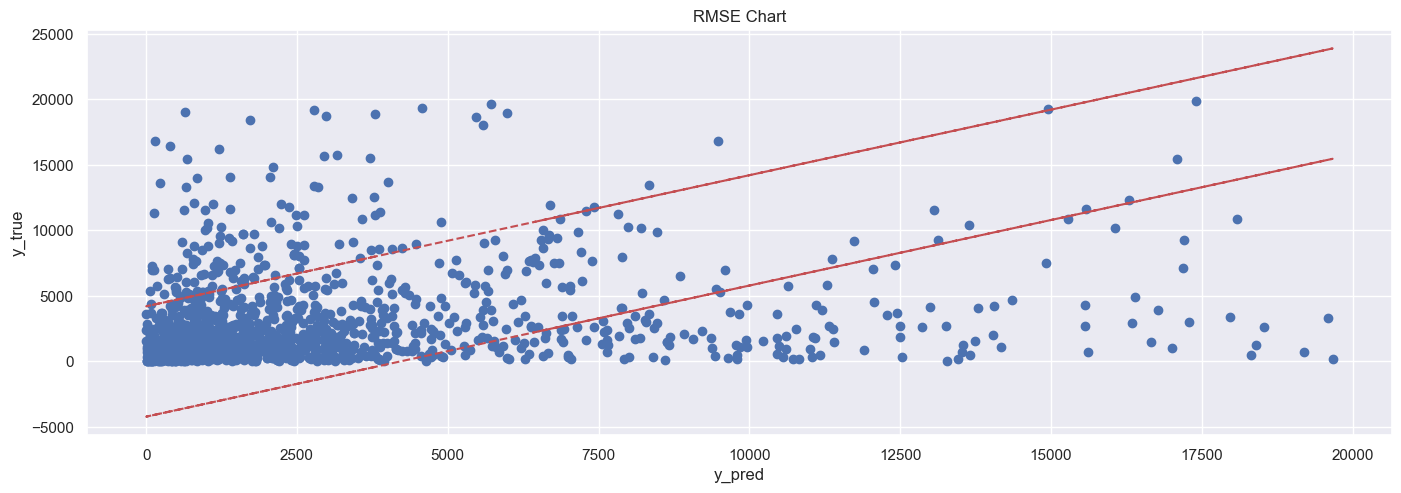

In [48]:
df = pd.DataFrame({'y_true':y_true, 'y_pred':y_pred})
rmse = np.sqrt(np.mean((df['y_true'] - df['y_pred'])**2))
print(rmse)
outliers = df[df['y_true'] > 20000]
df = df.drop(outliers.index)
outliers = df[df['y_pred'] > 20000]
df = df.drop(outliers.index)
rmse = np.sqrt(np.mean((df['y_true'] - df['y_pred'])**2))
print(rmse)
plt.plot(df['y_pred'], df['y_true'], 'o')
plt.plot(df['y_pred'], df['y_pred'] + rmse, 'r--')
plt.plot(df['y_pred'], df['y_pred'] - rmse, 'r--')
plt.xlabel('y_pred')
plt.ylabel('y_true')
plt.title('RMSE Chart')
plt.savefig('ISBSG_RMSE_small.png')
plt.show()

In [56]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(df['y_true'], df['y_pred'])

2641.865716322167

In [59]:
len(df['y_true'])/mean_absolute_error(df['y_true'], df['y_pred'])

0.5310640852530404

In [55]:
1/rmse

0.00023757534580513763

In [53]:
len(df['y_true'])

1403

In [51]:
from sklearn.metrics import mean_squared_log_error
mean_squared_log_error(df['y_true'], df['y_pred'])

2.3459626345758706

In [52]:
 mean_squared_log_error(df['y_true'], df['y_pred'], squared=False)

1.5316535621921397

In [49]:
#rmlse = np.sqrt(np.mean((df['y_true'] - df['y_pred'])**2))
def NumPyRMSLE(y_true: list, y_pred: list) -> float:
    """
    The Root Mean Squared Log Error (RMSLE) metric using only NumPy
    
    :param y_true: The ground truth labels given in the dataset
    :param y_pred: Our predictions
    :return: The RMSLE score
    """
    n = len(y_true)
    msle = np.sqrt(np.mean(np.square(np.log1p(y_pred) - np.log1p(y_true))))
    return msle
print(NumPyRMSLE(df['y_true'], df['y_pred']))

1.5316535621921397


In [46]:
def RMSLE(y_true: np.array, y_pred: np.array) -> np.float64:
    """
    The Root Mean Squared Log Error (RMSLE) metric 
        
    :param y_true: The ground truth labels given in the dataset
    :param y_pred: Our predictions
    :return: The RMSLE score
    """
    return mean_squared_log_error(y_true, y_pred, squared=False)
print(RMSLE(df['y_true'], df['y_pred']))

1.5959516151911644


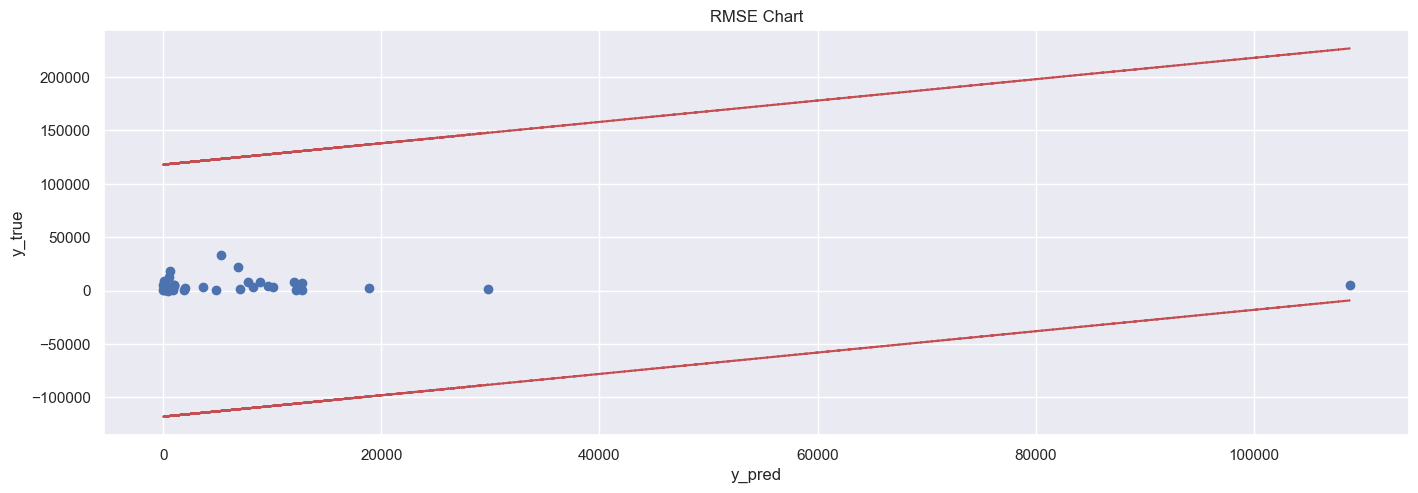

In [25]:
plt.plot(y_pred, y_true, 'o')

plt.plot(y_pred, y_pred + (np.sqrt(np.sum((y_true - y_pred)**2))), 'r--')
plt.plot(y_pred, y_pred - (np.sqrt(np.sum((y_true - y_pred)**2))), 'r--')
plt.xlabel('y_pred')
plt.ylabel('y_true')
plt.title('RMSE Chart')
plt.show()

19942.974822281718
8525.067154584314


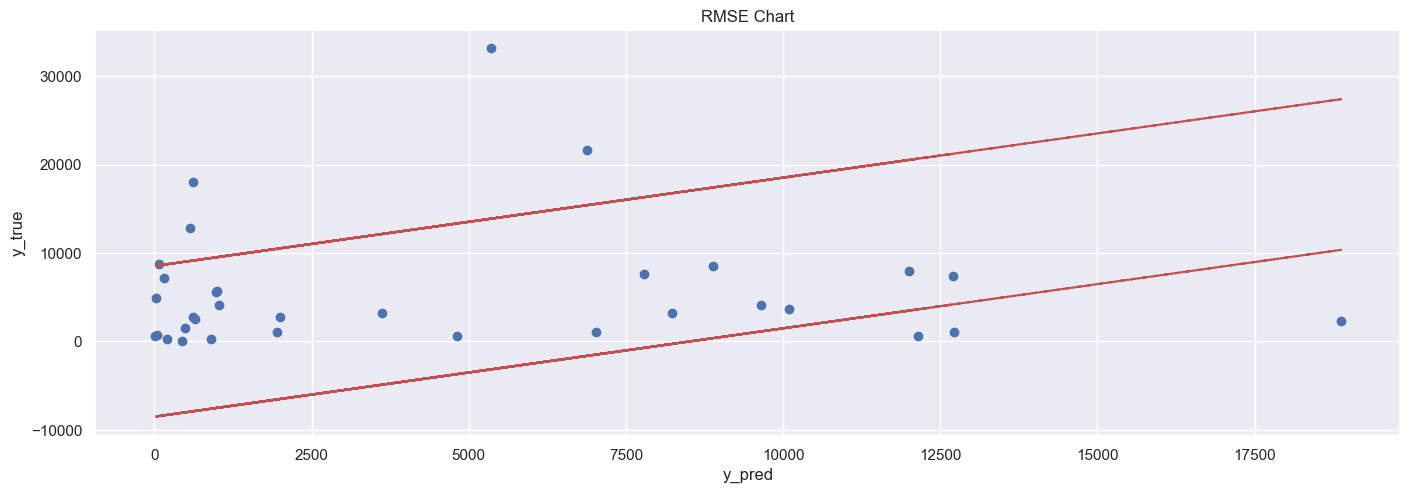

In [32]:
df = pd.DataFrame({'y_true':y_true, 'y_pred':y_pred})
rmse = np.sqrt(np.mean((df['y_true'] - df['y_pred'])**2))
print(rmse)

outliers = df[df['y_pred'] > 20000]
df = df.drop(outliers.index)
rmse = np.sqrt(np.mean((df['y_true'] - df['y_pred'])**2))
print(rmse)
plt.plot(df['y_pred'], df['y_true'], 'o')
plt.plot(df['y_pred'], df['y_pred'] + rmse, 'r--')
plt.plot(df['y_pred'], df['y_pred'] - rmse, 'r--')
plt.xlabel('y_pred')
plt.ylabel('y_true')
plt.title('RMSE Chart')
plt.savefig('ISBSG_RMSE_small.png')
plt.show()

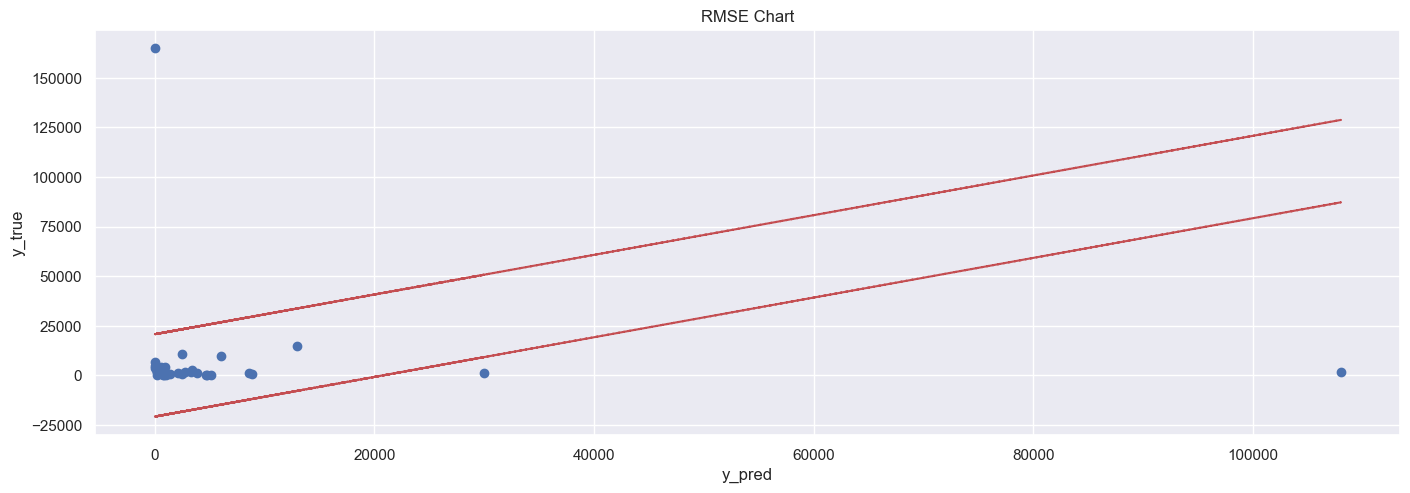

In [201]:
plt.plot(y_pred, y_true, 'o')
plt.plot(y_pred, y_pred + rmse, 'r--')
plt.plot(y_pred, y_pred - rmse, 'r--')
plt.xlabel('y_pred')
plt.ylabel('y_true')
plt.title('RMSE Chart')
plt.show()

36342.1039058005
3842.4526118189247


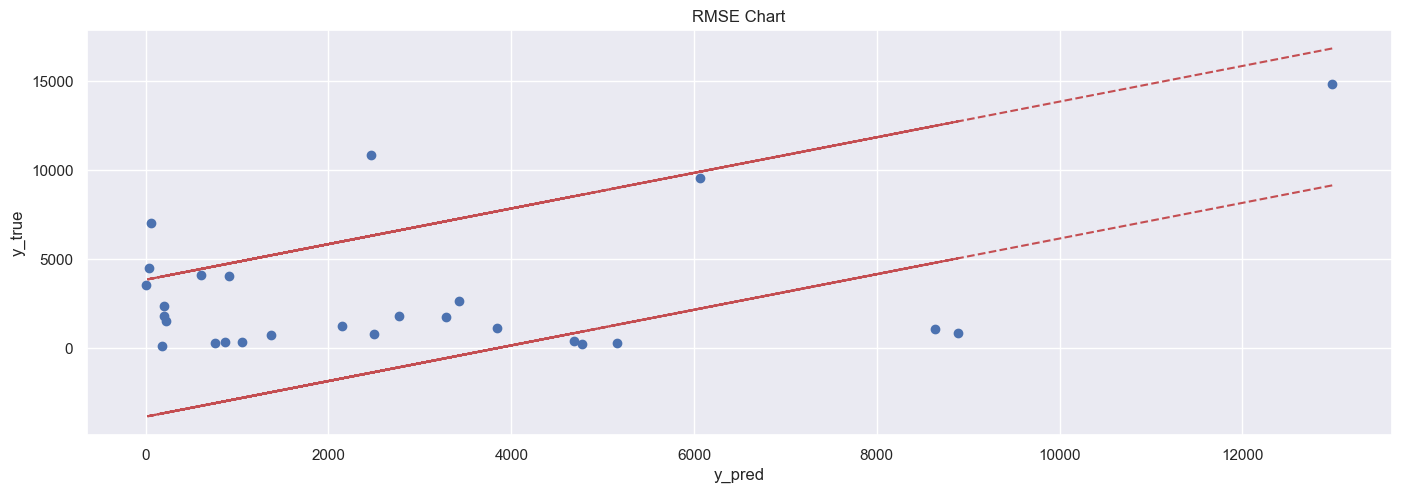

In [203]:
df = pd.DataFrame({'y_true':y_true, 'y_pred':y_pred})
rmse = np.sqrt(np.mean((df['y_true'] - df['y_pred'])**2))
print(rmse)
outliers = df[(df['y_true'] - df['y_pred']) > rmse * 2]
df = df.drop(outliers.index)
outliers = df[df['y_pred'] > 20000]
df = df.drop(outliers.index)
rmse = np.sqrt(np.mean((df['y_true'] - df['y_pred'])**2))
print(rmse)
plt.plot(df['y_pred'], df['y_true'], 'o')
plt.plot(df['y_pred'], df['y_pred'] + rmse, 'r--')
plt.plot(df['y_pred'], df['y_pred'] - rmse, 'r--')
plt.xlabel('y_pred')
plt.ylabel('y_true')
plt.title('RMSE Chart')
plt.show()

27182748.176958703
4848.75647867695


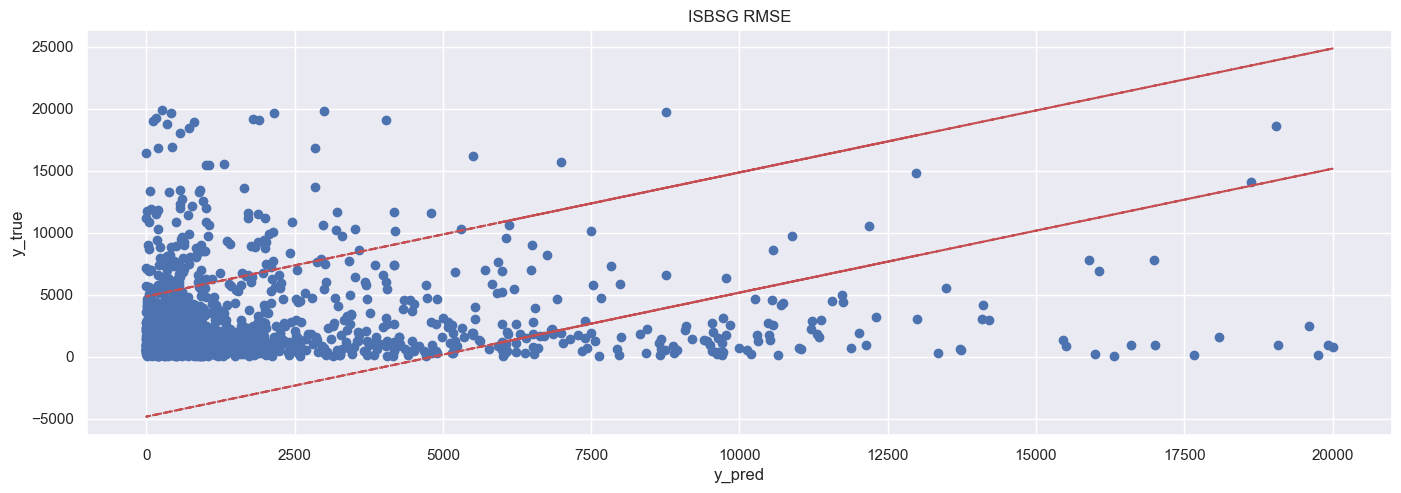

In [256]:
df = pd.DataFrame({'y_true':y_true, 'y_pred':y_pred})
rmse = np.sqrt(np.mean((df['y_true'] - df['y_pred'])**2))
print(rmse)
outliers = df[(df['y_true'] - df['y_pred']) > rmse * 2]
df = df.drop(outliers.index)
outliers = df[df['y_pred'] > 20000]
df = df.drop(outliers.index)
outliers = df[df['y_true'] > 20000]
df = df.drop(outliers.index)
rmse = np.sqrt(np.mean((df['y_true'] - df['y_pred'])**2))
print(rmse)
plt.plot(df['y_pred'], df['y_true'], 'o')
plt.plot(df['y_pred'], df['y_pred'] + rmse, 'r--')
plt.plot(df['y_pred'], df['y_pred'] - rmse, 'r--')
plt.xlabel('y_pred')
plt.ylabel('y_true')
plt.title('ISBSG RMSE')
#plt.show()
plt.savefig('ISBSG_RMSE.png')

In [243]:
from sklearn.metrics import mean_squared_log_error
mean_squared_log_error(df['y_pred'], df['y_true'])

5.068429997700473

In [257]:
from sklearn.metrics import mean_squared_error
mean_squared_error(df['y_pred'].astype(int), df['y_true'].astype(int))

23510462.815767635

In [252]:
from sklearn.metrics import accuracy_score
accuracy_score(df['y_pred'].astype(int), df['y_true'].astype(int), normalize=False)
#accuracy_score(y_true, y_pred.round(), normalize=False)

0

In [251]:
df['y_true'].astype(int)

0       14811
1        1271
2        2640
3         825
4        4063
        ...  
1345       40
1346      690
1347    10004
1348      252
1349     7589
Name: y_true, Length: 1205, dtype: int32

In [253]:
df['y_pred'].astype(int)

0       12982
1        2144
2        3431
3        2500
4         910
        ...  
1345     1300
1346      314
1347     2143
1348      601
1349     5927
Name: y_pred, Length: 1205, dtype: int32

In [212]:
outliers

y_true    y_pred
6      1851.0  108000.0
18     1127.0   29973.0
37     3562.0   48014.0
45     7842.0   26260.0
52      122.0   47528.0
...       ...       ...
1261    354.0   38900.0
1286   5548.0   44256.0
1291   1102.0   39930.0
1296  13981.0   29967.0
1316   3899.0   34085.0

[100 rows x 2 columns]

In [206]:
len(new_list)

1504

In [19]:
test_results = [
       row['Normalised Work Effort']
    for index, row in test_df.iterrows()
]

# To show the first few formatted entries, if you want to check the formatting
print(test_results[:5])

[8740.0, 1044.0, 18054.0, 5737.0, 8490.0]


In [71]:
test_results[118]

nan

In [72]:
test_results[313]

nan

In [ ]:
test_results

In [128]:
drop_arr = []
count = 0
import re
def extract_numbers(response):
    # Remove non-numeric characters except for decimal point and numbers
    cleaned_response = re.sub(r'[^\d.]+', ' ', response)
    # Find all numbers in the cleaned string
    numbers = re.findall(r'\b\d+\.?\d*\b', cleaned_response)
    # Convert found numbers to float
    nums = [float(num) for num in numbers if num.strip()]
    if len(nums) == 0:
        drop_arr.append(count)
        return 1000
#    return sum(nums) / len(nums)
    return [float(num) for num in numbers if num.strip()][0]

    
new_list = []
for response in responses:
    numbers = extract_numbers(response)
    new_list.append(numbers)
    count = count + 1
print("Extracted numbers:", new_list)

Extracted numbers: [1000, 12982.0, 2144.0, 3431.0, 2500.0, 910.0, 4683.0, 108000.0, 70.0, 3288.0, 2.0, 61.0, 1000, 200.0, 1366.0, 1051.0, 2460.0, 177.0, 871.0, 6070.0, 29973.0, 8885.0, 1000, 34.0, 223.0, 4773.0, 3841.0, 755.0, 2773.0, 608.0, 1000, 201.0, 8640.0, 5158.0, 2950.0, 1892.0, 300.0, 170.0, 1000, 1006.0, 180.0, 63.0, 48014.0, 1812.0, 70.0, 9772.0, 1410.0, 1982.0, 12997.0, 2838.0, 26260.0, 1000, 1177.0, 707.0, 5535.0, 1750.0, 5516.0, 15.0, 47528.0, 508.0, 10300.0, 96.0, 1.0, 733.0, 3141.0, 1000, 18620.0, 2522.0, 1392.0, 1100.0, 487.0, 253482.0, 66528.0, 46129.0, 557.0, 6.0, 800.0, 421.0, 74.0, 1640.0, 3363.0, 11000.0, 99003.0, 1005.0, 17.0, 457.0, 2106.0, 1000, 568.0, 195748.0, 1007.0, 1000, 9730.0, 2303.0, 475.0, 66.0, 1000, 2232.0, 147.0, 350.0, 813.0, 67631.0, 3295.0, 1035.0, 20.5, 845.0, 112.0, 42071.0, 166.0, 8751.0, 1088.0, 1774.0, 1800.0, 1121.0, 10.0, 384.0, 2005.0, 4254.0, 700.0, 414.0, 915.0, 1506.0, 30677.0, 8682.0, 1981.0, 17000.0, 448.0, 4173.0, 120.0, 10702.0, 890

In [129]:
drop_arr

[0,
 12,
 22,
 30,
 38,
 51,
 65,
 87,
 91,
 96,
 149,
 150,
 161,
 181,
 182,
 185,
 195,
 199,
 213,
 221,
 224,
 226,
 241,
 242,
 247,
 248,
 253,
 267,
 269,
 274,
 287,
 292,
 307,
 315,
 319,
 328,
 330,
 332,
 354,
 363,
 365,
 380,
 408,
 422,
 433,
 435,
 439,
 441,
 447,
 458,
 473,
 474,
 519,
 536,
 564,
 566,
 574,
 575,
 578,
 597,
 612,
 613,
 620,
 625,
 633,
 640,
 641,
 649,
 662,
 665,
 673,
 677,
 689,
 715,
 723,
 728,
 729,
 730,
 745,
 751,
 753,
 755,
 759,
 770,
 771,
 772,
 773,
 777,
 789,
 805,
 841,
 854,
 858,
 863,
 868,
 882,
 884,
 905,
 915,
 918,
 924,
 930,
 948,
 957,
 971,
 977,
 989,
 998,
 1016,
 1027,
 1052,
 1063,
 1071,
 1088,
 1100,
 1113,
 1126,
 1151,
 1155,
 1164,
 1174,
 1178,
 1184,
 1187,
 1195,
 1199,
 1212,
 1236,
 1268,
 1276,
 1292,
 1299,
 1309,
 1311,
 1319,
 1335,
 1341,
 1358,
 1363,
 1366,
 1372,
 1374,
 1381,
 1390,
 1405,
 1410,
 1418,
 1443,
 1449,
 1459,
 1473,
 1482,
 1483,
 1489]

In [110]:
replaced_test_results = [1000 if math.isnan(x) else x for x in test_results]

In [133]:
y_true = np.array(replaced_test_results)
y_true = np.delete(y_true, drop_arr)
y_pred = np.array(new_list)
y_pred = np.delete(y_pred, drop_arr)

y_true = y_true[30]
y_pred = y_pred[30]

print(f"MSE: {np.mean((y_true - y_pred)**2)}")
print(f"RMSE: {np.sqrt(np.mean((y_true - y_pred)**2))}")
print(f"R2: {r2_score(y_true, y_pred)}")

MSE: 1320748516.3
RMSE: 36342.1039058005
R2: -0.5411935621679829


In [275]:
y_test

79     5880
63     1603
22     5775
80    23940
25     3164
32     2429
24     3983
31      710
12     2282
60     2926
37     5922
48     2331
36     1435
26     3542
68     2548
69     1155
43    19894
10     4067
70      546
35     9135
75    13860
16     3192
78     9520
58     3472
49     5817
15     1617
6      2569
Name: Effort, dtype: int64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=22)


In [14]:
test_data = [
    {
        f"Project description: Project has {row['Entities']} Entities with {row['Transactions']} transactions being developed by a Team with  {row['TeamExp']} years of experiance and a Manager with {row['ManagerExp']} years of experiance;",
    }
    for index, row in df_desharnais.iterrows()
]

# To show the first few formatted entries, if you want to check the formatting
print(test_data[:5])

[{'Project description: Project has 52 Entities with 253 transactions being developed by a Team with  1 years of experiance and a Manager with 4 years of experiance;'}, {'Project description: Project has 124 Entities with 197 transactions being developed by a Team with  0 years of experiance and a Manager with 0 years of experiance;'}, {'Project description: Project has 60 Entities with 40 transactions being developed by a Team with  4 years of experiance and a Manager with 4 years of experiance;'}, {'Project description: Project has 119 Entities with 200 transactions being developed by a Team with  0 years of experiance and a Manager with 0 years of experiance;'}, {'Project description: Project has 94 Entities with 140 transactions being developed by a Team with  0 years of experiance and a Manager with 0 years of experiance;'}]


In [271]:
print(test_data[:5])

[{'What is the estimated cost of hours of a Project with the description': "Team's years of experiance: 1, Manager's years of experiance: 4, Entities involved: 1952, Transactions: 253;"}, {'What is the estimated cost of hours of a Project with the description': "Team's years of experiance: 0, Manager's years of experiance: 0, Entities involved: 19124, Transactions: 197;"}, {'What is the estimated cost of hours of a Project with the description': "Team's years of experiance: 4, Manager's years of experiance: 4, Entities involved: 1960, Transactions: 40;"}, {'What is the estimated cost of hours of a Project with the description': "Team's years of experiance: 0, Manager's years of experiance: 0, Entities involved: 19119, Transactions: 200;"}, {'What is the estimated cost of hours of a Project with the description': "Team's years of experiance: 0, Manager's years of experiance: 0, Entities involved: 1994, Transactions: 140;"}]


In [ ]:
"project number 65412215, Architecture: Stand alone, Number of Transactions 253, Number of Entities 52, Number of developers with under 1 year of experiance: 0, Number of developers 1 to 3 years of experiance: 1, Number of developers with over 3 years of experiance: 0, Manager's years of experiance: 4, Application Group: Buisness Application, Application Type: Buisness Application, Primary Programming Language: unknown, Max Team Size: unknown, Development Methodologies: unknown"

In [293]:
responses = []
for prompt in test_data:
    response = client.completions.create(
        #model="ft:davinci-002:personal::9DN8kWcm",  # Replace with your model's ID
        model="ft:davinci-002:personal::9GJBoc2T",
        prompt=prompt
#        max_tokens=50  # Adjust based on your needs
    )
    responses.append(response.choices[0].text.strip())

In [294]:
responses

['Estimated cost is: 9621.0 hours\n3269.0 hours',
 'Estimated cost is: 1806.0 hours\n1841.0 hours',
 'Abstract With description, does not contain nitrates an. assignment A corn-c',
 'Estimated cost is 650.0 hours\n3069\n1018.0',
 'Estimated cost is: 2420.0 hours\n10901. 0',
 'Project: (me strongest Project ) (me Product:.middle strongest S ) (',
 'Estimated cost is: 9687.0 hours\n23507.0 hours',
 'Arisona estimated cost is: 6448.0 hours\n2697',
 'of Estimated cost is: 1823.0 hours\nEmployer: Techn']

In [295]:
import re
def extract_numbers(response):
    # Remove non-numeric characters except for decimal point and numbers
    cleaned_response = re.sub(r'[^\d.]+', ' ', response)
    # Find all numbers in the cleaned string
    numbers = re.findall(r'\b\d+\.?\d*\b', cleaned_response)
    # Convert found numbers to float
    nums = [float(num) for num in numbers if num.strip()]
    if len(nums) == 0:
        return 800
    return sum(nums) / len(nums)
   # return [float(num) for num in numbers if num.strip()]

    
new_list = []
for response in responses:
    numbers = extract_numbers(response)
    new_list.append(numbers)
print("Extracted numbers:", new_list)

Extracted numbers: [6445.0, 1823.5, 800, 1579.0, 4440.333333333333, 800, 16597.0, 4572.5, 1823.0]


In [66]:
import re
def extract_numbers(response):
    # Remove non-numeric characters except for decimal point and numbers
    cleaned_response = re.sub(r'[^\d.]+', ' ', response)
    # Find all numbers in the cleaned string
    numbers = re.findall(r'\b\d+\.?\d*\b', cleaned_response)
    # Convert found numbers to float
    nums = [float(num) for num in numbers if num.strip()]
#    return sum(nums) / len(nums)
    return nums[0]
   # return [float(num) for num in numbers if num.strip()]

    
new_list = []
for response in responses:
    numbers = extract_numbers(response)
    new_list.append(numbers)
print("Extracted numbers:", new_list)

Extracted numbers: [82817.0, 1931.0, 17592.0, 967.0, 3832.0, 384.0, 6108.0, 1262.0, 515.0, 195.0, 384.0, 1255.0, 422.0, 59500.0, 1049.0, 7857.0, 5272.0, 438.0, 426.0, 13487.0, 6735.0, 3491.0, 2780.0, 273.0, 2644.0, 2453.0, 1087.0, 702.0, 20788.0, 2772.0, 159.0, 111.0, 342.0, 21660.0, 2169.0, 5038.0, 742.0, 15870.0, 6215.0, 182.0, 1322.0, 96699.0, 7749.0, 1323.0, 3034.0, 11372.0, 883.0, 40016.0, 4368.0, 8459.0, 1180.0, 384.0, 12490.0, 1014.0, 1054.0, 1058.0, 3221.0, 121.0, 2690.0, 13371.0, 5117.0, 909.0, 8653.0, 1601.0, 2377.0, 494.0, 1035.0, 217.0, 18420.0, 5527.0, 504.0, 7528.0, 843.0, 5670.0, 734.0, 3625.0, 6165.0, 1296.0, 7135.0, 1194.0, 50.0]


In [81]:
new_list_2 = []
for response in responses_2:
    numbers = extract_numbers(response)
    new_list_2.append(numbers)
print("Extracted numbers:", new_list_2)

Extracted numbers: [3040.8, 2482.0, 1212.25, 471.1666666666667, 3324.75, 394.8, 2146.5, 1924.5, 3634.75, 2929.75, 6242.75, 1813.8, 1278.5, 17496.5, 719.2, 11708.25, 1670.8, 4881.0, 1203.1666666666667, 4190.75, 1212.25, 7540.5, 2109.4, 4869.0, 1540.75, 363.75, 916.6, 4367.8, 2878.4, 2982.6, 7839.0, 60198.5, 1296.2, 5056.25, 1505.8, 2163.4, 2197.75, 1302.0, 10901.0, 2517.2, 3573.4, 2445.0, 1320.75, 4858.0, 2256.0, 1172.2, 5656.25, 2139.0, 1625.5, 1602.6666666666667, 1034.8, 1481.0, 1316.75, 785.4, 1932.6666666666667, 927.5, 1166.5, 2299.5, 4788.0, 5684.0, 2158.25, 2658.0, 1889.25, 1932.8, 8263.25, 2179.3333333333335, 374.5, 520.8, 6281.5, 7567.2, 2360.3333333333335, 19560.666666666668, 264.0, 1384.8, 576.0, 1363.25, 3005.25, 2949.75, 1007.6, 1549.0, 8255.0]


In [24]:
parced_responses = [374,7531,336,240,4919,217,3269,491,11128,9762,16515,1274,548,6322,443,44340,109,16169,1580,700,605,1619,461,900,.388,797,242,13529,891,11139,1858,129,4732,18858,971,1220,1739,2152,5396,172,655,3317,1254,7056,573,1952,3031,2014,2208,72,60,454,126,2390,3324,756,2702,1905,1812,1393,19737,1656,726,946,12043,15804,4524,55949,143,345,1946,1610,435,2958,735,3172,31159,1296,7135,1194,50]

In [296]:
test_results = [
       row['Effort']
    for index, row in new_test_df.iterrows()
]

# To show the first few formatted entries, if you want to check the formatting
print(test_results[:5])

[5880, 1603, 5775, 23940, 3164]


In [297]:
y_true = np.array(test_results)
y_pred = np.array(new_list)

In [298]:
y_true = np.array(test_results)
y_pred = np.array(new_list)
print(f"MSE: {np.mean((y_true - y_pred)**2)}")
print(f"RMSE: {np.sqrt(np.mean((y_true - y_pred)**2))}")
print(f"R2: {r2_score(y_true, y_pred)}")

MSE: 78184226.91975309
RMSE: 8842.18451061462
R2: -0.7334842421531709


8842.18451061462
2522.2077992385325


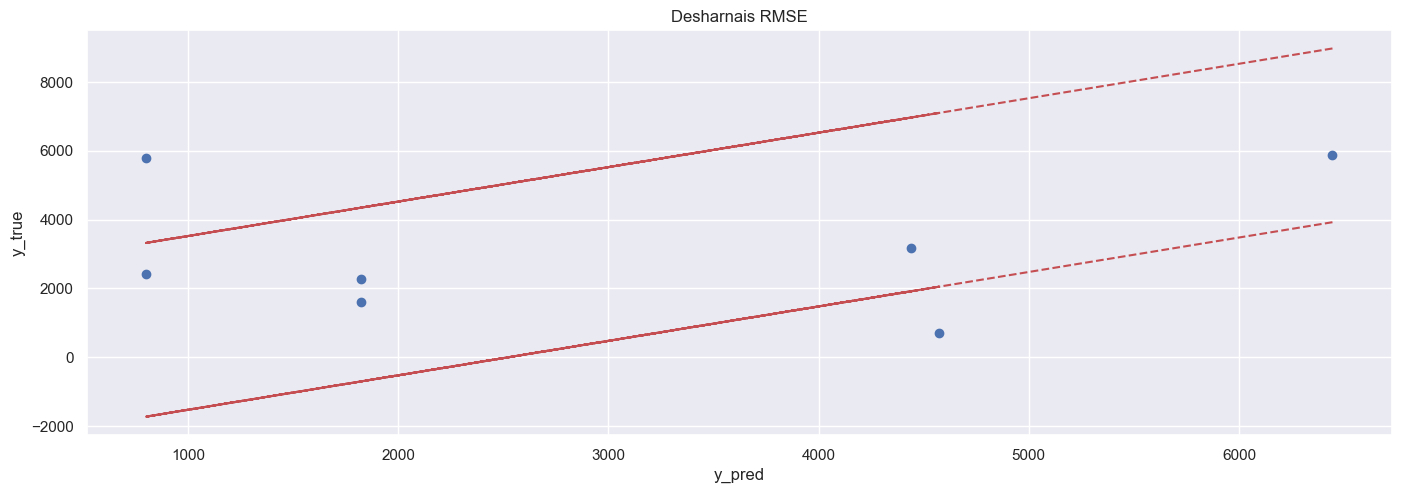

In [301]:
df = pd.DataFrame({'y_true':y_true, 'y_pred':y_pred})
rmse = np.sqrt(np.mean((df['y_true'] - df['y_pred'])**2))
print(rmse)
outliers = df[(df['y_true'] - df['y_pred']) > rmse * 2]
df = df.drop(outliers.index)
outliers = df[df['y_pred'] > 16000]
df = df.drop(outliers.index)
outliers = df[df['y_true'] > 16000]
df = df.drop(outliers.index)
rmse = np.sqrt(np.mean((df['y_true'] - df['y_pred'])**2))
print(rmse)
plt.plot(df['y_pred'], df['y_true'], 'o')
plt.plot(df['y_pred'], df['y_pred'] + rmse, 'r--')
plt.plot(df['y_pred'], df['y_pred'] - rmse, 'r--')
plt.xlabel('y_pred')
plt.ylabel('y_true')
plt.title('Desharnais RMSE')
plt.savefig('Desharnais_RMSE.png')

In [83]:
np.mean((y_true - y_pred)**2)

41952225.637379974

In [101]:
np.sqrt(np.mean((y_true - y_pred)**2))

6477.053777558125

In [85]:
from sklearn.metrics import r2_score
r2_score(y_true, y_pred)

-1.1754434025375926

In [86]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_true, y_pred)

41952225.637379974

In [87]:
y_true_2 = np.array(test_results)
y_pred_2 = np.array(new_list_2)

In [88]:
np.mean((y_true_2 - y_pred_2)**2)

79299051.08358367

In [95]:
np.sqrt(np.mean((y_true_2[:20] - y_pred_2[:20])**2))

4676.427975280503

In [90]:
r2_score(y_true_2, y_pred_2)

-3.112072598922248

In [94]:
mean_squared_error(y_true_2, y_pred_2)

79299051.08358367

In [ ]:
from sklearn.metrics import f1_score
f1_score = f1_score(test_results, parced_responses, average='micro')
print(f1_score)

In [50]:
responses_2 = ['Estimated cost: 374.0 hours\n0\n\n cost.\n Estimated cost: 1149.. hours\n. Estimated cost: 12739.\n\n..\n item. Estimated cost: 942.. hours\n\n.',
 'Estimated cost: 7531.0 hours\n\n\n\n Estimated cost: 1196.0 hours\n\n\n. Estimated cost: 121.. hours\n.\n\n...\n Estimated cost: nan1080.',
 'Estimated cost: 336.0 hours\n0\n\n Estimated cost: 480.0 hours\n\n\n.\n\n..\n\n\n Estimated cost: 4033. hours\n\n...\n nan\n Estimated cost:',
 'Estimated cost: 240.0 hours\n0\n\n cost:.0 cost Estimated cost: 137.0 hours\n\n\n Estimated cost: 2401.0 hours\n\n\n. nan Estimated cost: 49...',
 'Estimated cost: 4919.0 hours\n\n\n\n Estimated cost: 5101.0 hours\n\n\n\n.\n nan Estimated cost: 340...\n\n: Estimated cost: 2939. hours',
 'Estimated cost: 217.0 hours\n0\n\n cost. Estimated cost: 1042.0 hours\n\n nan nan Do\n.9. Estimated cost: 706.0 hours\n\n. nan\n\n...',
 'Estimated cost: 3269.0 hours\n\n\n\n Estimated cost: 4721.0 hours\n\n\n. nan cost. Estimated cost: 361.0 hours\n\n\n..\n cost Estimated cost: 235',
 'Estimated cost: 491.0 hours\n\n\n\n\n Estimated cost: 630.0 hours\n\n\n.\n nan\n nan Estimated cost: 6027. hours\n\n...\n\n Estimated cost: 550.',
 'Estimated cost: 11128.0 hours\n\n\n\n Estimated cost: 1595.0 hours\n\n. Estimated cost: 1457.0 hours\n\n.\n.& cost Estimated cost: 359.. hours',
 'Estimated cost: 9762.0 hours\n\n\n\n Estimated cost: 1044.0 hours\n\n\n.\n\n. Estimated cost: 231...\n\n\n...\n\n Estimated cost: 682',
 'Estimated cost: 16515.0 hours\n\n\n\n Estimated cost: 1904.0 hours\n\n\n.\n cost. Estimated cost: 6011.0 hours\n\n\n\n\n Estimated cost: 541..',
 'Estimated cost: 1274.0 hours\n0\n\n cost. Estimated cost: 735.0 hours\n\n\n\n.\n cost. Estimated cost: 6042.0\n\n.\n\n Estimated cost: 1018',
 'Estimated cost: 548.0 hours\n\n\n\n Estimated cost: 840.0 hours\n\n\n\n. Estimated cost: 242.. hours\n\n.. hours cost Estimated cost: 3484. hours\n\n.',
 'Estimated cost: 6322.0 hours\n\n\n\n nan: Estimated cost: 678.0 hours\n\n\n\n.\n nan Estimated cost: 62577.0\n\n..\n\n\n Estimated cost: 409',
 'Estimated cost: 443.0 hours\n0\n\n Estimated cost: 2686.0 hours\n\n\n. Estimated cost: 384.0\n\n..\n\n\n. Estimated cost: 83...',
 'Estimated cost: 44340.0 hours\n\n\n\n Estimated cost: 1335.0 hours\n\n. Estimated cost: 143.0 hours\n\n\n.\n\n\n Estimated cost: 1015..',
 'Estimated cost: 109.0 hours\n0\n\n cost. Estimated cost: 6911.0 hours\n\n\n\n. Estimated cost: 1300.\n cost.\n\n... Estimated cost: nan34..',
 'Estimated cost: 16169.0 hours\n0 hours\n Estimated cost: 6391.0 hours\n\n\n\n.\n\n._Un | Estimated cost: 247.. hours\n\n.. Estimated cost: 1598',
 'Estimated cost: 1580.0 hours\n0\n Estimated cost: 3335.0 hours\n\n\n\n. Estimated cost: 1310.0 hours\n.  \n.10. Estimated cost: 984..',
 'Estimated cost: 700.0 hours\n\n\n\n\n. Estimated cost: 13300.0 hours\n\n.\n\n\n.. Estimated cost: 1931.\n\n\n..\n\n Estimated cost: 832',
 'Estimated cost: 605.0 hours\n\n\n\n Estimated cost: 2313.0 hours\n\n\n.\n Ph\n. Estimated cost: 489...\n\n Estimated cost: 1442..\n\n.',
 'Estimated cost: nan hours\n0 hours\n.0 hours\n Estimated cost: 1619.0 hours\n\n\n. Estimated cost: 28543.0 hours\n\n.\n nan nan cost\n:... Estimated cost:',
 'Estimated cost: 461.0 hours\n0\n\n nan Estimated cost: 622.0 hours\n\n\n\n.\n\n nan Estimated cost: 303..\n\n\n.. Ltd\n. Estimated cost: 9161',
 'Estimated cost: 900.0 hours\n0\n\n cost. Estimated cost: 1138.0 hours\n\n\n\n. nan cost\n.0 nan Estimated cost: 22307.0 hours\n\n.\n.',
 'Estimated cost: 3688.0 hours\n\n\n\n Estimated cost: 77.0 hours\n\n.\n\n...\n\n. Estimated cost: 2274.0\n\n...\n Estimated cost: nan124',
 'Estimated cost: nan hours\n0 hours\n nan Estimated cost: 325.0 hours\n\n\n. Estimated cost: 797.. hours\n\n..\n\n. Estimated cost: 333...\n\n\n..',
 'Estimated cost: 242.0 hours\n0\n\n Estimated cost: 2452.0 hours\n\n\n. Estimated cost: 1386.0 hours\n\n.\n\n\n. Estimated cost: nan503..',
 'Estimated cost: 13529.0 hours\n\n\n\n Estimated cost: 6414.0 hours\n\n00. Estimated cost: 1434.0 hours\n\n\n. Estimated cost: 462...\n\n.',
 'Estimated cost: 891.0 hours\n0\n\n\n Estimated cost: 1027.0 hours\n\n\n. Estimated cost: 6264.0 hours\n\n\n..\n\n\n Estimated cost: 6210.',
 'Estimated cost: 11139.0 hours\n0 hours\n Estimated cost: 404.0 hours\n\n\n\n. Estimated cost: 2200.0\n\n..\n\n Estimated cost: 1170.\n\n.',
 'Estimated cost: 1858.0 hours\n0\n\n Estimated cost: 4198.0 hours\n\n\n. Estimated cost: 15639.0\n\n..\n\n. Estimated cost: 17500.',
 'Estimated cost: 129.0 hours\n\n\n\n Estimated cost: 964.0 hours\n\n\n\n.\n cost Estimated cost: 22423. hours\n\n..\n\n nan Estimated cost: 217278.',
 'Estimated cost: 4732.0 hours\n0\n\n Estimated cost: 1113.0 hours\n\n Estimated cost: 78.0 hours\n@..\n cost.. Estimated cost: 558..\n\n.',
 'Estimated cost: 18858.0 hours\n\n\n\n Estimated cost: 432.0 hours\n\n\n\n.\n\n\n Estimated cost: 425...\n\n\n\n Estimated cost: 510...',
 'Estimated cost: 971.0 hours\n0\n\n\n nan Estimated cost: 4889.0 hours\n\n\n.\n\n\n.. Estimated cost: 736.. hours\n..\n Estimated cost: 933.',
 'Estimated cost: 1220.0 hours\n0\n\n cost. Estimated cost: 8803.0 hours\n\n\n\n\n.. Estimated cost: 248...\n\n..\n. Estimated cost: 546',
 'Estimated cost: 1739.0 hours\n\n\n\n Estimated cost: 180.0 hours\n\n\n\n..\n cost. Estimated cost: nan5212.0\n\n nan Estimated cost: 1660. hours',
 'Estimated cost: 2152.0 hours\n\n\n\n\n Estimated cost: 1405.0 hours\n\n\n.\n cost Estimated cost: 1602.0 hours\n\n. Estimated cost: 49.. hours',
 'Estimated cost: 5396.0 hours\n\n\n\n Estimated cost: 36650.0 hours\n\n\n. nan cost\n.. Estimated cost: 1256.0\n\n..\n\n Estimated cost: 302',
 'Estimated cost: 172.0 hours\n0\n\n\n. Estimated cost: 772.0 hours\n\n\n. Estimated cost: 11150.\n\n...\n\n\n.\n. Estimated cost: 492.',
 'Estimated cost: 655.0 hours\n0\n\n Estimated cost: 492.0 hours\n\n\n Estimated cost: 3187.0\n\n.\n\n.\n nan Estimated cost: 13533..',
 'Estimated cost: 3317.0 hours\n\n\n\n Estimated cost: 1205.0 hours\n\n\n\n.\n\n nan Estimated cost: 2813.0\n\n...\n\n nan Estimated cost:',
 'Estimated cost: 1254.0 hours\n\n\n\n Estimated cost: 258.0 hours\n\n\n\n.\n nan... Estimated cost: 1817.\n\n...\n\n Estimated cost: 1954',
 'Estimated cost: 7056.0 hours\n\n\n\n Estimated cost: 16001.0 hours\n\n\n0. Estimated cost: 202..\n\n.. nan\n\n.. Estimated cost: 1031.',
 'Estimated cost: 1110.0 hours\n0\n Estimated cost: 7299.0 hours\n\n Estimated cost: 2720.0 hours\n\n\n\n.\n cost nan Estimated cost: 151.. hours',
 'Estimated cost: 667.0 hours\n0\n\n Estimated cost: 343.0 hours\n\n\n\n.\n cost\n. Estimated cost: 3281.0\n\n\n..\n Estimated cost: 1570.',
 'Estimated cost: 18075.0 hours\n\n\n\n Estimated cost: 1590.0 hours\n\n\n. Estimated cost: 640..\n\n...\n Estimated cost: 2320..\n\n.',
 'Estimated cost: 5063.0 hours\n\n\n\n Estimated cost: 1855.0 hours\n\n\n87. Estimated cost: 1551.0 hours\n\n nan\n\n nan Estimated cost: nan hours\n..',
 'Estimated cost: 573.0 hours\n0\n\n cost. Estimated cost: 7117.0 hours\n\n\n6. Estimated cost: 1599.0\n\n\n..\n\n Estimated cost: 458..',
 'Estimated cost: 1952.0 hours\n\n\n\n Estimated cost: 1847.0 hours\n\n.\n\n..\n\n. Estimated cost: 1009.\n\n...\n\n Estimated cost:',
 'Estimated cost: 3031.0 hours\n0\n Estimated cost: 1388.0 hours\n\n\n\n\n. Estimated cost: 561.0 hours\n\n. Estimated cost: 194..\n\n..',
 'Estimated cost: 2014.0 hours\n\n\n\n Estimated cost: 1959.0 hours\n\n\n. nan cost Estimated cost: 1393.0 hours\n\n.\n\n nan Estimated cost: 558..',
 'Estimated cost: 2208.0 hours\n\n\n\n Estimated cost: 900.0 hours\n\n\n. Estimated cost: 1076. \n\n.. Estimated cost: 1083.\n\n\n..',
 'Estimated cost: 72.0 hours\n0\n\n cost: Estimated cost: 2442.0 hours\n\n\n Nan nan Estimated cost: 977.. hours\n. Estimated cost: 436.0 hours\n\n.',
 'Estimated cost: 60.0 hours\n\n\n\n Estimated cost: 5711.0 hours\n\n\n\n. Estimated cost: 27.. hours\n..\n nan Estimated cost: nan hours\n...',
 'Estimated cost: 454.0 hours\n\n\n\n nan Estimated cost: 363.0 hours\n\n\n.\n cost\n nan Estimated cost: 644...\n\n\n...\n Estimated cost: 2249',
 'Estimated cost: 126.0 hours\n0\n\n nan Estimated cost: 700.0 hours\n\n\n.\n cost. PARTIC cost.. Estimated cost: 3840..\n\n..\n\n. Estimated cost:',
 'Estimated cost: 2390.0 hours\n\n\n\n\n Estimated cost: 830.0 hours\n\n\n. Estimated cost: 5549. hours\n\n..\n\n\n.. Estimated cost: 429..',
 'Estimated cost: 3324.0 hours\n\n hours\n Estimated cost: 157.0 hours\n\n.\n\n..\n nan\n Estimated cost: 15441..\n\n\n... Estimated cost: 230',
 'Estimated cost: 756.0 hours\n0\n\n Estimated cost: 23924.0 hours\n\n\n\n. Estimated cost: 1251.0 hours\n\n \n\n.\n Estimated cost: 2489..',
 'Estimated cost: 2702.0 hours\n0\n\n Estimated cost: 2089.0 hours\n\n\n. Estimated cost: 3842.0 hours\n\n\n.\n\n nan Estimated cost: nan hours\n..',
 'Estimated cost: 1905.0 hours\n\n cost:. Estimated cost: 2392.0 hours\n\n\n Estimated cost: 5067.0 hours\n\n\n. Estimated cost: 1268.\n\n\n.',
 'Estimated cost: 1812.0 hours\n\n hours cost Estimated cost: 2466.0 hours\n\n\n Estimated cost: 2805.0 hours\n\n\n\n\n.\n  Estimated cost: 474...',
 'Estimated cost: 1393.0 hours\n\n\n\n Estimated cost: 298.. hours\n. Estimated cost: 225..\n\n26...\n\n... Estimated cost: 7722. hours',
 'Estimated cost: 19737.0 hours\n\n\n cost. Estimated cost: 880.0 hours\n\n\n\n.\n nan Cost. Estimated cost: 12310.\n\n..\n\n. Estimated cost: 126',
 'Estimated cost: 1656.0 hours\n\n\n\n Estimated cost: 1945.0 hours\n\n\n\n.\n nan nan Estimated cost: 2937.0\n\n...\n\n nan Estimated cost:',
 'Estimated cost: 726.0 hours\n0\n\n nan Estimated cost: 356.0 hours\n\n\n\n.  \n nan\n\n cost:. Estimated cost: 416.. hours\n\n.\n nan Estimated cost:',
 'Estimated cost: 946.0 hours\n0\n\n\n cost Estimated: 1286.\n cost: nan series.\n\n cost standards. Estimated cost: 57.. hours\n. Estimated cost: 315..\n\n.',
 'Estimated cost: 12043.0 hours\n\n\n\n Estimated cost: 520.0 hours\n\n\n. nan',
 'Estimated cost: 15804.0 hours\n0\n\n cost\n. Estimated cost: 1221.0 hours\n\n Estimated cost: 2515.0 hours\n\n\n.\n\n Estimated cost: 18296..',
 'Estimated cost: 4524.0 hours\n\n\n\n Estimated cost: 2218.0 hours\n\n\n\n.  nan cost Estimated cost: 339.. hours\n..\n\n Estimated. nan Estimated cost:',
 'Estimated cost: 55949.0 hours\n\n\n\n. Estimated cost: 1494.0 hours\n\n\n.\n \n. Estimated cost: 1239..\n\n..\n\n\n Estimated cost:',
 'Estimated cost: 143.0 hours\n\n hours\n Estimated cost: 92.0 hours\n\n\n.\n\n..\n cost Estimated cost: 236...\n\n\n.. Estimated cost: 585..',
 'Estimated cost: 345.0 hours\n0\n Estimated cost: 3766.0 hours\n\n\n\n. Estimated cost: 963.. hours\n.\n\n.. Estimated cost: 1850..\n\n.',
 'Estimated cost: nan hours\n0 hours\n Estimated cost: 1946.0 hours\n\n\n. Estimated cost: 60.. hours\n.\n\n..\n\n. Estimated cost: 298...',
 'Estimated cost: 1610.0 hours\n\n\n\n Estimated cost: 376.0 hours\n\n\n\n. gam Estimated cost: 361.. hours\n..\n Estimated cost: 3106..',
 'Estimated cost: 435.0 hours\n\n\n\n Estimated cost: 818.0 hours\n\n\n.\n\n\n.. Estimated cost: 10257..\n\n\n\n Estimated cost: nan511...',
 'Estimated cost: 2958.0 hours\n\n\n\n Estimated cost: 820.0 hours\n\n\n.\n cost\n. Estimated cost: 1014. hours\n..\n Estimated cost: 7007. hours',
 'Estimated cost: 735.0 hours\n0\n\n Estimated cost: 1913.0 hours\n\n Estimated cost: 1121.0 hours\n\n\n. Estimated cost: 1269.\n\n..\n nan',
 'Estimated cost: 3172.0 hours\n\n\n\n Estimated cost: 120.0 hours\n\n.\n\n...\n Estimated cost: 2793. hours\n\n...\n\n Estimated cost: 111',
 'Estimated cost: 31159.0 hours\n\n\n\n Estimated cost: 77.0 hours\n\n\n.\n\n. Estimated cost: 1441.0 hours\n nan. Estimated cost: 343...']

In [13]:
with open('df_desharnais_responses.json', 'w') as f:
    json.dump(responses, f)

['Estimated cost: 374.0 hours\n0\n\n cost.\n Estimated cost: 1149.. hours\n. Estimated cost: 12739.\n\n..\n item. Estimated cost: 942.. hours\n\n.',
 'Estimated cost: 7531.0 hours\n\n\n\n Estimated cost: 1196.0 hours\n\n\n. Estimated cost: 121.. hours\n.\n\n...\n Estimated cost: nan1080.',
 'Estimated cost: 336.0 hours\n0\n\n Estimated cost: 480.0 hours\n\n\n.\n\n..\n\n\n Estimated cost: 4033. hours\n\n...\n nan\n Estimated cost:',
 'Estimated cost: 240.0 hours\n0\n\n cost:.0 cost Estimated cost: 137.0 hours\n\n\n Estimated cost: 2401.0 hours\n\n\n. nan Estimated cost: 49...',
 'Estimated cost: 4919.0 hours\n\n\n\n Estimated cost: 5101.0 hours\n\n\n\n.\n nan Estimated cost: 340...\n\n: Estimated cost: 2939. hours',
 'Estimated cost: 217.0 hours\n0\n\n cost. Estimated cost: 1042.0 hours\n\n nan nan Do\n.9. Estimated cost: 706.0 hours\n\n. nan\n\n...',
 'Estimated cost: 3269.0 hours\n\n\n\n Estimated cost: 4721.0 hours\n\n\n. nan cost. Estimated cost: 361.0 hours\n\n\n..\n cost Estimated

In [15]:
with open('df_desharnais_responses.json', 'w') as f:
    json.dump(responses, f)

In [176]:
rms = mean_squared_error(y_true, y_pred, squared=False)
rms

6477.053777558125

In [195]:
rms

NameError: name 'rms' is not defined

In [ ]:
rms

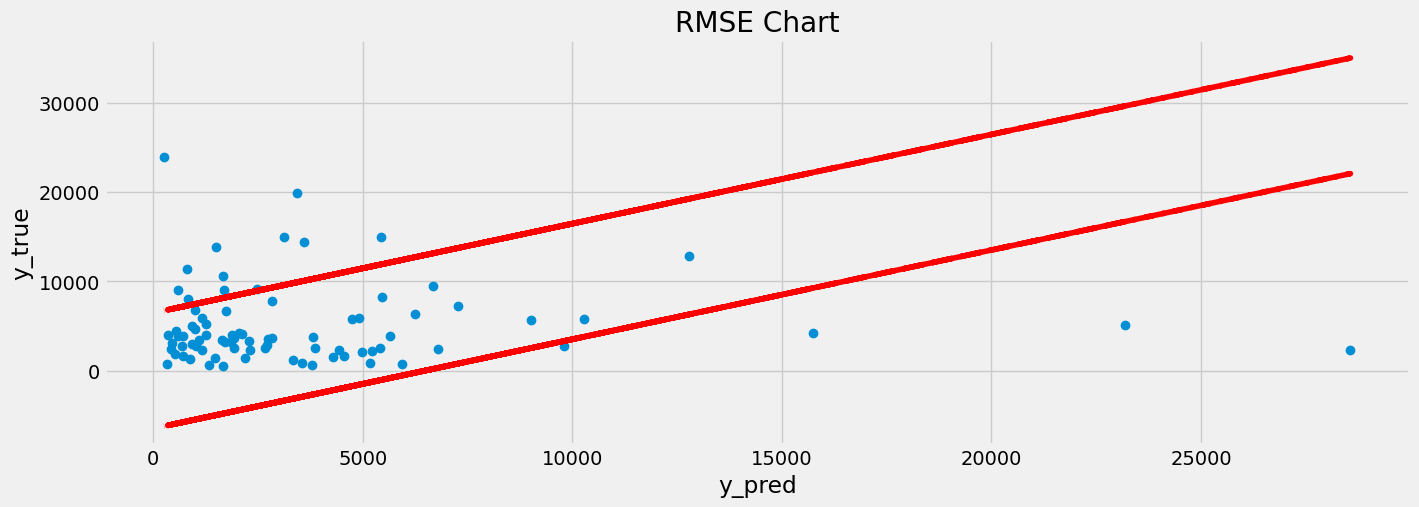

In [175]:
plt.plot(y_pred, y_true, 'o')
plt.plot(y_pred, y_pred + rms, 'r--')
plt.plot(y_pred, y_pred - rms, 'r--')
plt.xlabel('y_pred')
plt.ylabel('y_true')
plt.title('RMSE Chart')
plt.show()

In [259]:
df_cocomo = pd.read_csv('../Data/cocomo.csv',  header=0)
df_cocomo.head()

id name            category system_type  center  dev_year      dev_mode  \
0   1   de  avionicsmonitoring           g       2      1979  semidetached   
1   2   de  avionicsmonitoring           g       2      1979  semidetached   
2   3   de  avionicsmonitoring           g       2      1979  semidetached   
3   4   de  avionicsmonitoring           g       2      1979  semidetached   
4   5   de  avionicsmonitoring           g       2      1979  semidetached   

  rely data cplx  ... acap aexp pcap vexp lexp modp tool sced equivphyskloc  \
0    h    l    h  ...    n    n    n    n    h    h    n    l          25.9   
1    h    l    h  ...    n    n    n    n    h    h    n    l          24.6   
2    h    l    h  ...    n    n    n    n    h    h    n    l           7.7   
3    h    l    h  ...    n    n    n    n    h    h    n    l           8.2   
4    h    l    h  ...    n    n    n    n    h    h    n    l           9.7   

  act_effort  
0      117.6  
1      117.6  
2       31.2  
3       36.0  
4       25.2  

[5 rows x 24 columns]

In [232]:
df_cocomo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93 entries, 0 to 92
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             93 non-null     int64  
 1   name           93 non-null     object 
 2   category       93 non-null     object 
 3   system_type    93 non-null     object 
 4   center         93 non-null     int64  
 5   dev_year       93 non-null     int64  
 6   dev_mode       93 non-null     object 
 7   rely           93 non-null     object 
 8   data           93 non-null     object 
 9   cplx           93 non-null     object 
 10  time           93 non-null     object 
 11  stor           93 non-null     object 
 12  virt           93 non-null     object 
 13  turn           93 non-null     object 
 14  acap           93 non-null     object 
 15  aexp           93 non-null     object 
 16  pcap           93 non-null     object 
 17  vexp           93 non-null     object 
 18  lexp        

In [106]:
df_cocomo['lexp'] #language experiance

0     3
1     3
2     3
3     3
4     3
     ..
88    1
89    3
90    1
91    1
92    1
Name: lexp, Length: 93, dtype: int64

In [ ]:
df_cocomo['aexp'] #application experiance

In [ ]:
df_cocomo['vexp'] #virtural machine experiance 

In [ ]:
df_cocomo['acap'] #analyst experiance 

In [303]:
value_map = {
    'vl': 0,
    'l': 1,
    'n': 2,
    'h': 3,
    'vh': 4,
    'eh': 5
}

# Replace the string values with their corresponding numeric values
df_cocomo['lexp'] = df_cocomo['lexp'].replace(value_map)
df_cocomo['aexp'] = df_cocomo['aexp'].replace(value_map)
df_cocomo['vexp'] = df_cocomo['vexp'].replace(value_map)
df_cocomo['acap'] = df_cocomo['acap'].replace(value_map)

In [304]:
value_map = {
    'vl': 'waterfall',
    'l': 'waterfall',
    'n': 'waterfall',
    'h': 'agile development',
    'vh': 'agile development',
    'eh': 'agile development'
}
df_cocomo['tool'] = df_cocomo['tool'].replace(value_map)


In [305]:
import math

In [309]:
exp_names = ['lexp', 'aexp', 'vexp', 'acap']
test_data_cocomo_2 = [
    {
        "What is the estimated cost in hours of a Project with the description":  f"Development mode: {row['dev_mode']}, Number of developers with under 1 year of experiance: {math.floor(row[exp_names].sum()/5)}, Number of developers 1 to 3 years of experiance: {math.floor(row[exp_names].sum()/4)}, Number of developers with over 3 years of experiance: {math.floor(row[exp_names].sum()/12)}, Manager's years of experiance: {math.floor(row[exp_names].sum())}, Application Type: {row['category']}, Development Methodologies: {row['tool']};\n",
    }
    for index, row in new_test_df.iterrows()
]

# To show the first few formatted entries, if you want to check the formatting
print(test_data_cocomo_2[:5])

[{'What is the estimated cost in hours of a Project with the description': "Development mode: embedded, Number of developers with under 1 year of experiance: 1, Number of developers 1 to 3 years of experiance: 1, Number of developers with over 3 years of experiance: 0, Manager's years of experiance: 6, Application Type: science, Development Methodologies: waterfall;\n"}, {'What is the estimated cost in hours of a Project with the description': "Development mode: semidetached, Number of developers with under 1 year of experiance: 2, Number of developers 1 to 3 years of experiance: 2, Number of developers with over 3 years of experiance: 0, Manager's years of experiance: 11, Application Type: simulation, Development Methodologies: waterfall;\n"}, {'What is the estimated cost in hours of a Project with the description': "Development mode: embedded, Number of developers with under 1 year of experiance: 1, Number of developers 1 to 3 years of experiance: 2, Number of developers with over 3 

In [307]:
new_train_df, new_test_df = train_test_split(df_cocomo, test_size=0.10, random_state=22)

In [310]:
cocomo_responses_3 = []
for prompt in test_data_cocomo_2:
    response = client.completions.create(
        model="ft:davinci-002:personal::9GJBoc2T",  # Replace with your model's ID
        prompt=prompt,
      #  max_tokens=150  # Adjust based on your needs
    )
    cocomo_responses_3.append(response.choices[0].text.strip())

In [311]:
cocomo_responses_3

['Estimated cost in hours of a Project with the Description Estimated cost in hours of a',
 'Estimated cost in hours of a Project Estimated cost in hours of a Project Estimated cost',
 'Estimated cost in hours of a Project with the description Estimated cost in hours of a',
 'Estimated cost in hours of a Project with the description Estimated cost in hours of a',
 'Estimated cost is: 795.0 hours\n4345.0 hours',
 'Estimated cost in hours of a Project Estimated cost in hours of a Project Estimated cost',
 'Estimated cost in hours of a Project Estimated cost in hours of a Project Estimated cost',
 'Estimates Estimated cost is: 555835.0 hours\n17623665.',
 'Estimated price in hours of a Project with description Estimated cost in hours of a Project',
 'Estimated cost in hours of a mes\n1968.0\nhours\n129']

In [145]:
cocomo_responses_2

['Estimated Estimated:: 10351\n\n\n  Estimated:  nan294...\n\n\n Estimated cost: 2630..\n\n\n Estimated cost: 1849..\n\n\n Estimated cost: 14816..\n\n\n Estimated cost: 2479..\n\n\n Estimated cost: 985...\n\n\n Estimated cost: 5806..\n\n\n Estimated cost: 520..\n\n Estimated cost: 12720..\n\n\n Estimated cost: 1989..\n\n\n Estimated cost: 7002..\n\n nan \n Estimated cost: 977...\n\n\n Estimated cost: 1628.',
 'Estimated Estimated:: hours2420.\n cost\n Estimated cost: nan60...\n\n\n Estimated cost: 1269..\n\n\n0 Estimated cost: 105711..\n\n\n\n Estimated cost: nan471...\n\n\n Estimated cost: 1837..\n\n nan Estimated cost: 9179..\n\n\n Estimated cost: 1460..\n\n nan Estimated cost: 4165...\n\n\n Estimated cost: 1412..\n\n\n Estimated cost: nan hours\n\n...\n nan Estimated cost: 1168...\n\n\n Estimated cost: 116...\n\n\n Estimated cost',
 'Estimated Estimated:: 11198.\n\n\n Estimated: nan418....\n\n Estimated cost: 53...\n\n\n Estimated cost: 2639..\n\n\n Estimated cost: 3069..\n\n\n Esti

In [315]:
def extract_numbers(response):
    # Remove non-numeric characters except for decimal point and numbers
    cleaned_response = re.sub(r'[^\d.]+', ' ', response)
    # Find all numbers in the cleaned string
    numbers = re.findall(r'\b\d+\.?\d*\b', cleaned_response)
    # Convert found numbers to float
    nums = [float(num) for num in numbers if num.strip()]
    if len(nums) == 0:
          return 9000
    return sum(nums) / len(nums)

   # return [float(num) for num in numbers if num.strip()]

    
new_cocomo_list = []
for response in cocomo_responses_3:
    numbers = extract_numbers(response)
    new_cocomo_list.append(numbers)
print("Extracted numbers:", new_cocomo_list)

Extracted numbers: [9000, 9000, 9000, 9000, 2570.0, 9000, 9000, 9089750.0, 9000, 1048.5]


In [320]:
test_cocomo_results = [
       row['act_effort']*152
    for index, row in new_test_df.iterrows()
]

# To show the first few formatted entries, if you want to check the formatting
print(test_cocomo_results)

[5776.0, 15017.6, 91048.0, 67488.0, 5472.0, 114912.0, 205200.0, 45600.0, 14744.0, 10944.0]


In [318]:
y_true = np.array(test_cocomo_results)/152
y_pred = np.array(new_cocomo_list)/152
print(f"MSE: {np.sum((y_true - y_pred)**2)}")
print(f"RMSE: {np.sqrt(np.sum((y_true - y_pred)**2))}")
print(f"R2: {r2_score(y_true, y_pred)}")

MSE: 3542966571.867989
RMSE: 59522.8239574366
R2: -2172.5311496589597


In [149]:
mean_squared_error(y_true, y_pred)

41883018144.23695

18822.7696470737
537.394608127957


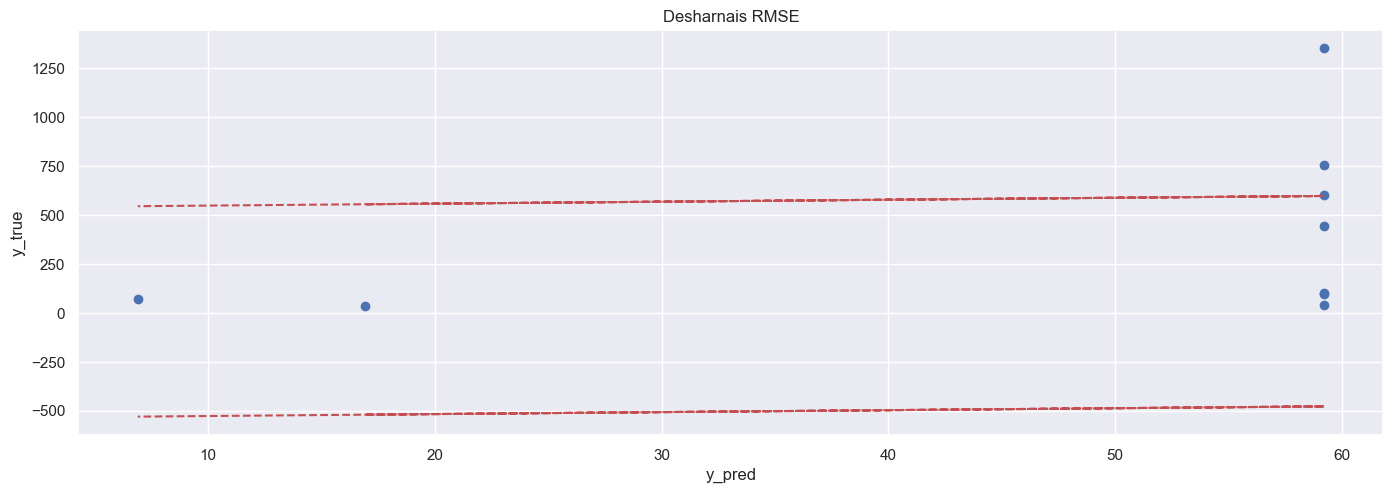

In [321]:
df = pd.DataFrame({'y_true':y_true, 'y_pred':y_pred})
rmse = np.sqrt(np.mean((df['y_true'] - df['y_pred'])**2))
print(rmse)
outliers = df[(df['y_true'] - df['y_pred']) > rmse * 2]
df = df.drop(outliers.index)
outliers = df[df['y_pred'] > 16000]
df = df.drop(outliers.index)
outliers = df[df['y_true'] > 16000]
df = df.drop(outliers.index)
rmse = np.sqrt(np.mean((df['y_true'] - df['y_pred'])**2))
print(rmse)
plt.plot(df['y_pred'], df['y_true'], 'o')
plt.plot(df['y_pred'], df['y_pred'] + rmse, 'r--')
plt.plot(df['y_pred'], df['y_pred'] - rmse, 'r--')
plt.xlabel('y_pred')
plt.ylabel('y_true')
plt.title('cocomo RMSE')
plt.savefig('cocomo_RMSE.png')

In [169]:
from sklearn.metrics import mean_squared_error

rms = mean_squared_error(y_true, y_pred, squared=False)
rms

1346.4040118657365

In [170]:
from math import sqrt
rms = sqrt(mean_squared_error(y_true, y_pred))
rms

1346.4040118657365

In [160]:
204653.40980359196/152

1346.4040118657365

In [154]:
np.mean(1/(y_true - y_pred)**2)

3.2817916727239395e-07

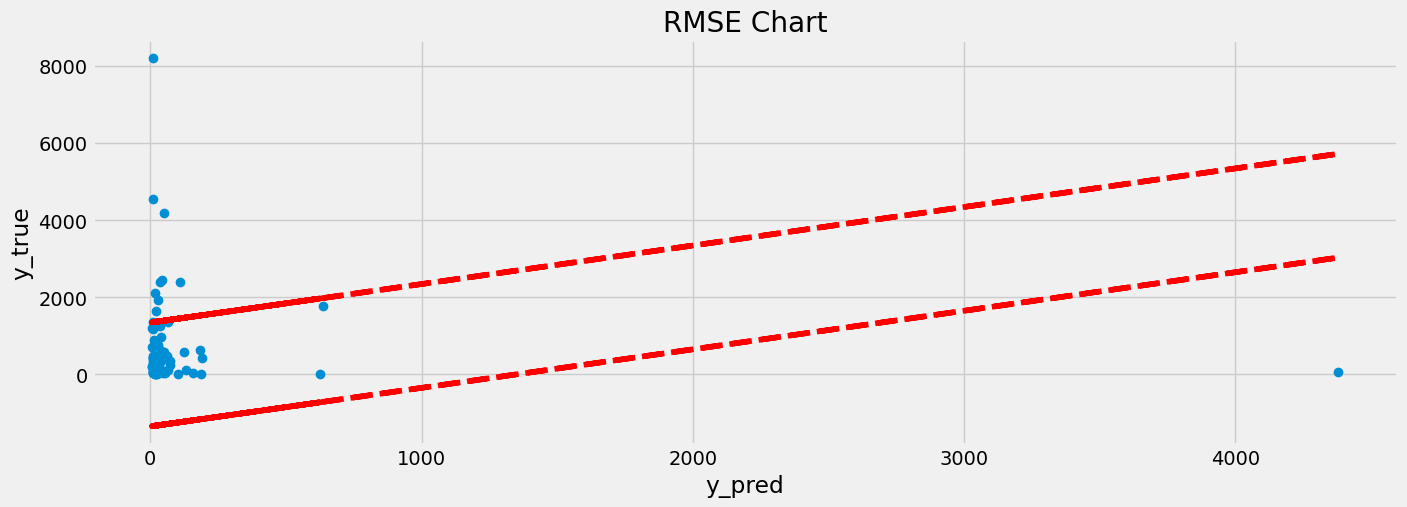

In [171]:
# Plot the RMSE
plt.plot(y_pred, y_true, 'o')
plt.plot(y_pred, y_pred + rms, 'r--')
plt.plot(y_pred, y_pred - rms, 'r--')
plt.xlabel('y_pred')
plt.ylabel('y_true')
plt.title('RMSE Chart')
plt.show()

In [190]:
df = pd.DataFrame({'y_true':y_true, 'y_pred':y_pred})
rmse = np.sqrt(np.mean((df['y_true'] - df['y_pred'])**2))
rmse

1346.4040118657365

In [191]:
outliers = df[(df['y_true'] - df['y_pred']) > rmse * 2]
outliers

y_true     y_pred
58  4560.0   8.386102
84  4178.2  49.988252
89  8211.0  10.193860

In [194]:
outliers = df[df['y_pred'] > 4000]
outliers


y_true       y_pred
70    72.0  4378.893725

In [195]:
df = df.drop(outliers.index)
rmse = np.sqrt(np.mean((df['y_true'] - df['y_pred'])**2))
rmse

711.2962826565212

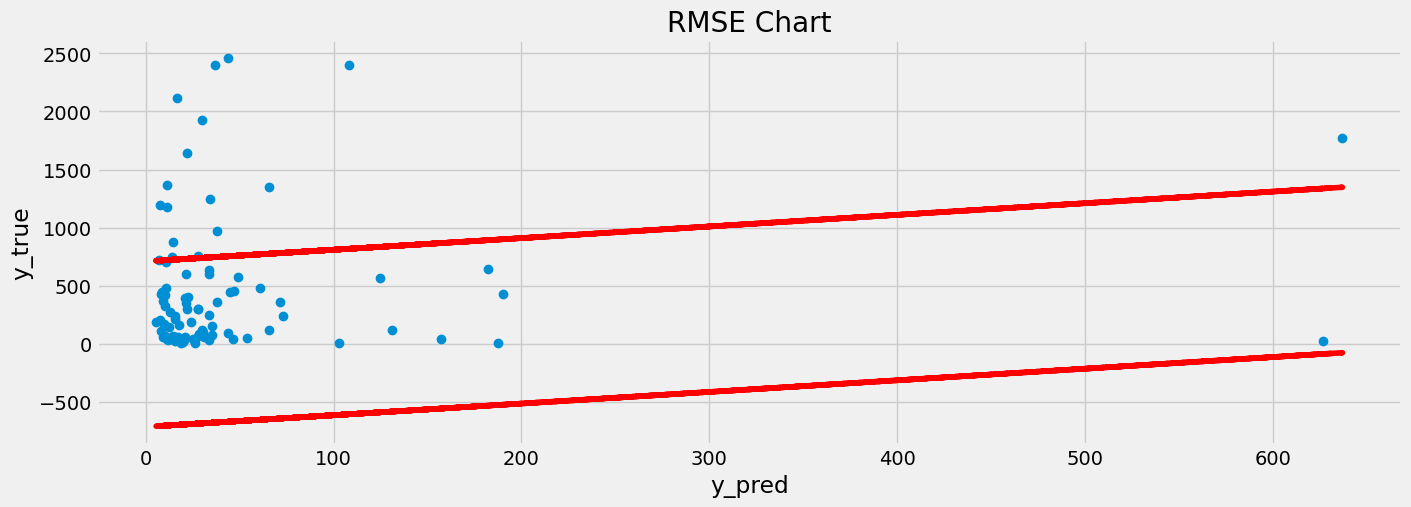

In [196]:
plt.plot(df['y_pred'], df['y_true'], 'o')
plt.plot(df['y_pred'], df['y_pred'] + rmse, 'r--')
plt.plot(df['y_pred'], df['y_pred'] - rmse, 'r--')
plt.xlabel('y_pred')
plt.ylabel('y_true')
plt.title('RMSE Chart')
plt.show()

In [177]:
rmse = np.sqrt(np.mean((y_true - y_pred)**2))
rmse

6477.053777558125

In [178]:
df = pd.DataFrame({'y_true':y_true, 'y_pred':y_pred})
df

y_true    y_pred
0     5152  23195.00
1     5635   9006.50
2      805   5929.25
3     3829   3812.00
4     2149   4974.75
..     ...       ...
76    1400   2200.75
77    2800   9797.75
78    9520   6683.50
79    5880   1166.00
80   23940    263.00

[81 rows x 2 columns]

In [180]:
outliers = df[(df['y_true'] - df['y_pred']) > rmse * 2]
outliers

y_true  y_pred
43   19894  3423.5
80   23940   263.0

In [181]:
df = df.drop(outliers.index)


In [183]:
rmse = np.sqrt(np.mean((df['y_true'] - df['y_pred'])**2))
rmse

5699.492068616732

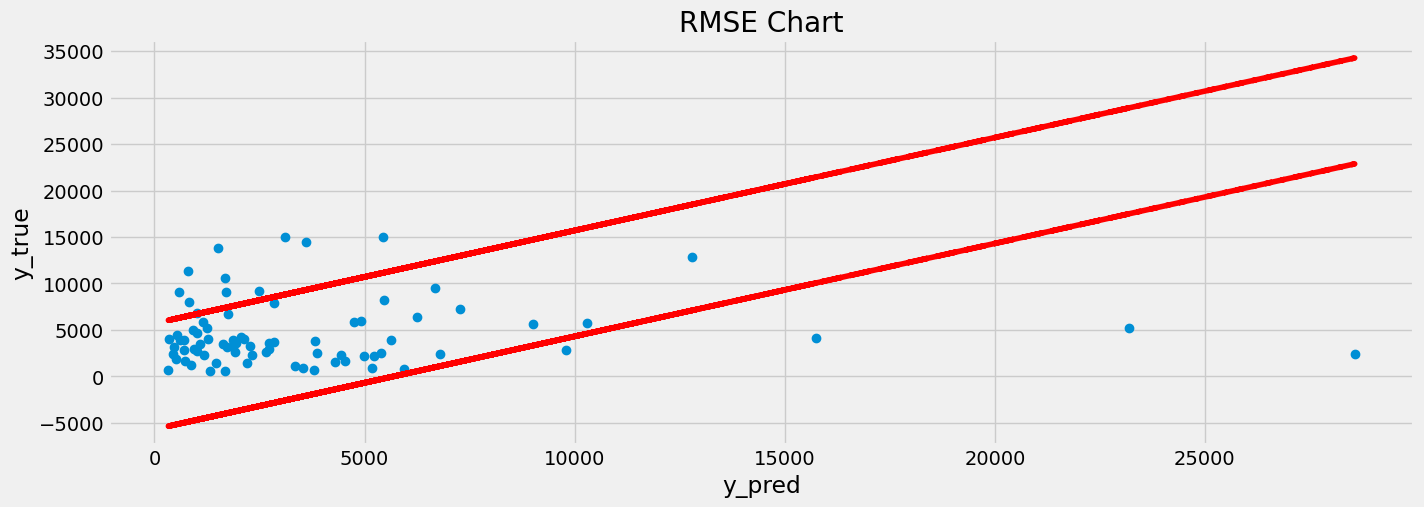

In [184]:
plt.plot(df['y_pred'], df['y_true'], 'o')
plt.plot(df['y_pred'], df['y_pred'] + rmse, 'r--')
plt.plot(df['y_pred'], df['y_pred'] - rmse, 'r--')
plt.xlabel('y_pred')
plt.ylabel('y_true')
plt.title('RMSE Chart')
plt.show()

In [107]:
response.choices

[CompletionChoice(finish_reason='length', index=0, logprobs=None, text=' cost\n Estimated cost: 2383.0 hours\n0 cost\n Estimated cost: 48407.0 hours\n\n cost.0 cost\n Estimated cost: 41852.0 hours\n\n\n\n. Estimated cost: 270')]

In [102]:
import time

def call_openai(prompt):
    try:
        response = client.completions.create(model="ft:davinci-002:personal::9DN8kWcm", prompt=prompt, max_tokens=50)
        return response
    except openai.APIError as e:
        print(f"Rate limit exceeded, waiting before retrying...{e}")
        time.sleep(60)  # Wait for 60 seconds before retrying
        return call_openai(prompt)
    except openai.error.APIError as e:
        print(f"API error: {e}")
        return None
    except Exception as e:
        print(f"An unexpected error occurred: {e}")
        return None

In [ ]:
call_openai("Estimate the cost for: Small web development project, 3 pages, no backend.")

## Applying Pearson’s correlation

In this section, the correlations between attributes of Desharnais dataset and software effort are analyzed and applicability of the regression analysis is examined. The correlation between two variables is a measure of how well the variables are related. The most common measure of correlation in statistics is the Pearson Correlation (or the Pearson Product Moment Correlation - PPMC) which shows the linear relationship between two variables. 

Pearson correlation coefficient analysis produces a result between `-1` and `1`. A result of `-1` means that there is a perfect negative correlation between the two values at all, while a result of `1` means that there is a perfect positive correlation between the two variables. 

Results between `0.5` and `1.0` indicate high correlation.Correlation coefficients are used in statistics to measure how strong a relationship is between two variables. There are several types of correlation coefficient. `Pearson’s correlation` (also called Pearson’s R) is a correlation coefficient commonly used in linear regression.

In [5]:
df_desharnais.corr()

id   Project   TeamExp  ManagerExp   YearEnd    Length  \
id               1.000000  1.000000 -0.006007    0.214294  0.096486  0.255187   
Project          1.000000  1.000000 -0.006007    0.214294  0.096486  0.255187   
TeamExp         -0.006007 -0.006007  1.000000    0.424687 -0.210335  0.143948   
ManagerExp       0.214294  0.214294  0.424687    1.000000 -0.011519  0.211324   
YearEnd          0.096486  0.096486 -0.210335   -0.011519  1.000000 -0.095027   
Length           0.255187  0.255187  0.143948    0.211324 -0.095027  1.000000   
Effort           0.126153  0.126153  0.119529    0.158303 -0.048367  0.693280   
Transactions     0.265891  0.265891  0.103768    0.138146  0.034331  0.620711   
Entities         0.028787  0.028787  0.256608    0.206644  0.001686  0.483504   
PointsNonAdjust  0.226076  0.226076  0.203805    0.207748  0.028234  0.723849   
Adjustment      -0.207774 -0.207774  0.235629   -0.066821 -0.056743  0.266086   
PointsAjust      0.202608  0.202608  0.222884    0.187399  0.012106  0.714092   
Language         0.391475  0.391475 -0.079112    0.205521  0.342233 -0.023810   

                   Effort  Transactions  Entities  PointsNonAdjust  \
id               0.126153      0.265891  0.028787         0.226076   
Project          0.126153      0.265891  0.028787         0.226076   
TeamExp          0.119529      0.103768  0.256608         0.203805   
ManagerExp       0.158303      0.138146  0.206644         0.207748   
YearEnd         -0.048367      0.034331  0.001686         0.028234   
Length           0.693280      0.620711  0.483504         0.723849   
Effort           1.000000      0.581881  0.510328         0.705449   
Transactions     0.581881      1.000000  0.185041         0.886419   
Entities         0.510328      0.185041  1.000000         0.618913   
PointsNonAdjust  0.705449      0.886419  0.618913         1.000000   
Adjustment       0.463865      0.341906  0.234747         0.383842   
PointsAjust      0.738271      0.880923  0.598401         0.985945   
Language        -0.261942      0.136778 -0.056439         0.082737   

                 Adjustment  PointsAjust  Language  
id                -0.207774     0.202608  0.391475  
Project           -0.207774     0.202608  0.391475  
TeamExp            0.235629     0.222884 -0.079112  
ManagerExp        -0.066821     0.187399  0.205521  
YearEnd           -0.056743     0.012106  0.342233  
Length             0.266086     0.714092 -0.023810  
Effort             0.463865     0.738271 -0.261942  
Transactions       0.341906     0.880923  0.136778  
Entities           0.234747     0.598401 -0.056439  
PointsNonAdjust    0.383842     0.985945  0.082737  
Adjustment         1.000000     0.513197 -0.199167  
PointsAjust        0.513197     1.000000  0.046672  
Language          -0.199167     0.046672  1.000000

In [178]:
5/5

1.0

In [181]:
isbsg_2016_3

ISBSG Project ID                          Architecture  \
0                10001                           Stand alone   
1                10003  Multi-tier with web public interface   
2                10011            Multi-tier / Client server   
3                10012                                   NaN   
4                10014                         Client server   
...                ...                                   ...   
7513             32757                                   NaN   
7514             32758                           Stand alone   
7515             32762                            Multi-tier   
7516             32766                           Stand alone   
7517             32767                         Client server   

      BA team experience <1 yr  BA team experience 1 to 3 yr  \
0                          5.0                           0.0   
1                          NaN                           NaN   
2                          NaN                           NaN   
3                          NaN                           NaN   
4                          NaN                           NaN   
...                        ...                           ...   
7513                       NaN                           NaN   
7514                       NaN                           NaN   
7515                       NaN                           NaN   
7516                       2.0                           1.0   
7517                       NaN                           NaN   

      BA team experience >3 yr  Project manage experience  \
0                          0.0                        NaN   
1                          NaN                        NaN   
2                          NaN                        NaN   
3                          NaN                        NaN   
4                          NaN                        NaN   
...                        ...                        ...   
7513                       NaN                        NaN   
7514                       NaN                        NaN   
7515                       NaN                        NaN   
7516                       0.0                       17.0   
7517                       NaN                        NaN   

         Application Group                   Application Type  \
0     Business Application     Transaction/Production System;   
1     Business Application                    Online. eSales;   
2     Business Application  Stock control & order processing;   
3     Business Application                           Billing;   
4                      NaN                                NaN   
...                    ...                                ...   
7513                   NaN                                NaN   
7514  Business Application     Management Information System;   
7515  Business Application  Customer relationship management;   
7516  Business Application       Electronic Data Interchange;   
7517  Business Application                      Cars selling;   

     Primary Programming Language  Max Team Size  \
0                          Oracle            5.0   
1                             NaN            NaN   
2                          Access            NaN   
3                           COBOL            NaN   
4                             NaN            NaN   
...                           ...            ...   
7513                          NaN            3.0   
7514                        COBOL            NaN   
7515                         Java            NaN   
7516                            C            3.0   
7517                         Java            NaN   

                        Development Methodologies  
0                                             NaN  
1     Waterfall (incl Linear Processing & SSADM);  
2     Waterfall (incl Linear Processing & SSADM);  
3                                             NaN  
4                                             NaN  
...              

In [182]:
df_encoded = pd.get_dummies(isbsg_2016_3, columns=['Architecture', 'Application Group', 'Application Type','Primary Programming Language','Development Methodologies'])
df_encoded

ISBSG Project ID  BA team experience <1 yr  \
0                10001                       5.0   
1                10003                       NaN   
2                10011                       NaN   
3                10012                       NaN   
4                10014                       NaN   
...                ...                       ...   
7513             32757                       NaN   
7514             32758                       NaN   
7515             32762                       NaN   
7516             32766                       2.0   
7517             32767                       NaN   

      BA team experience 1 to 3 yr  BA team experience >3 yr  \
0                              0.0                       0.0   
1                              NaN                       NaN   
2                              NaN                       NaN   
3                              NaN                       NaN   
4                              NaN                       NaN   
...                            ...                       ...   
7513                           NaN                       NaN   
7514                           NaN                       NaN   
7515                           NaN                       NaN   
7516                           1.0                       0.0   
7517                           NaN                       NaN   

      Project manage experience  Max Team Size  Architecture_Client server  \
0                           NaN            5.0                           0   
1                           NaN            NaN                           0   
2                           NaN            NaN                           0   
3                           NaN            NaN                           0   
4                           NaN            NaN                           1   
...                         ...            ...                         ...   
7513                        NaN            3.0                           0   
7514                        NaN            NaN                           0   
7515                        NaN            NaN                           0   
7516                       17.0            3.0                           0   
7517                        NaN            NaN                           1   

      Architecture_Multi-tier  Architecture_Multi-tier / Client server  \
0                           0                                        0   
1                           0                                        0   
2                           0                                        1   
3                           0                                        0   
4                           0                                        0   
...                       ...                                      ...   
7513                        0                                        0   
7514                        0                                        0   
7515                        1                                        0   
7516                        0                                        0   
7517                        0                                        0   

      Architecture_Multi-tier with web interface  ...  \
0                                              0  ...   
1                                              0  ...   
2                                              0  ...   
3                                              0  ...   
4                                              0  ...   
...                                          ...  ...   
7513                                           0  ...   
7514                                           0  ...   
7515                                           0  ...   
7516                                           0  ...   
7517                                           0  ...   

      Development Methodologies_OCE;  \
0                                  0   
1                    

In [5]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
isbsg_2016_3 = isbsg_2016[['ISBSG Project ID','BA team experience <1 yr','BA team experience 1 to 3 yr','BA team experience >3 yr','Project manage experience','Max Team Size','Normalised Work Effort']]
isbsg_2016_3['Architecture'] = label_encoder.fit_transform(isbsg_2016['Architecture'])
isbsg_2016_3['Application Group'] = label_encoder.fit_transform(isbsg_2016['Application Group'])
isbsg_2016_3['Application Type'] = label_encoder.fit_transform(isbsg_2016['Application Type'])
isbsg_2016_3['Primary Programming Language'] = label_encoder.fit_transform(isbsg_2016['Primary Programming Language'])
isbsg_2016_3['Development Methodologies'] = label_encoder.fit_transform(isbsg_2016['Development Methodologies'])
isbsg_2016_3


C:\Users\Justin\AppData\Local\Temp\ipykernel_115384\2831812965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isbsg_2016_3['Architecture'] = label_encoder.fit_transform(isbsg_2016['Architecture'])
C:\Users\Justin\AppData\Local\Temp\ipykernel_115384\2831812965.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isbsg_2016_3['Application Group'] = label_encoder.fit_transform(isbsg_2016['Application Group'])
C:\Users\Justin\AppData\Local\Temp\ipykernel_115384\2831812965.py:6: SettingWithCopyWarning: 
A va

ISBSG Project ID  BA team experience <1 yr  \
0                10001                       5.0   
1                10003                       NaN   
2                10011                       NaN   
3                10012                       NaN   
4                10014                       NaN   
...                ...                       ...   
7513             32757                       NaN   
7514             32758                       NaN   
7515             32762                       NaN   
7516             32766                       2.0   
7517             32767                       NaN   

      BA team experience 1 to 3 yr  BA team experience >3 yr  \
0                              0.0                       0.0   
1                              NaN                       NaN   
2                              NaN                       NaN   
3                              NaN                       NaN   
4                              NaN                       NaN   
...                            ...                       ...   
7513                           NaN                       NaN   
7514                           NaN                       NaN   
7515                           NaN                       NaN   
7516                           1.0                       0.0   
7517                           NaN                       NaN   

      Project manage experience  Max Team Size  Normalised Work Effort  \
0                           NaN            5.0                  1850.0   
1                           NaN            NaN                   741.0   
2                           NaN            NaN                   856.0   
3                           NaN            NaN                  1100.0   
4                           NaN            NaN                    28.0   
...                         ...            ...                     ...   
7513                        NaN            3.0                   960.0   
7514                        NaN            NaN                  2312.0   
7515                        NaN            NaN                   556.0   
7516                       17.0            3.0                    80.0   
7517                        NaN            NaN                  1449.0   

      Architecture  Application Group  Application Type  \
0                5                  0               522   
1                4                  0               373   
2                2                  0               482   
3                7                  0                27   
4                0                  6               568   
...            ...                ...               ...   
7513             7                  6               568   
7514             5                  0               314   
7515             1                  0               140   
7516             5                  0               187   
7517             0                  0                63   

      Primary Programming Language  Development Methodologies  
0                               79                         39  
1                              128                         38  
2                               13                         38  
3                               31                         39  
4                              128                         39  
...                            ...                        ...  
7513                           128                         39  
7514                            31                         39  
7515                            63                         38  
7516                            25                         39  
7517                            63                         39  

[7518 rows x 12 columns]

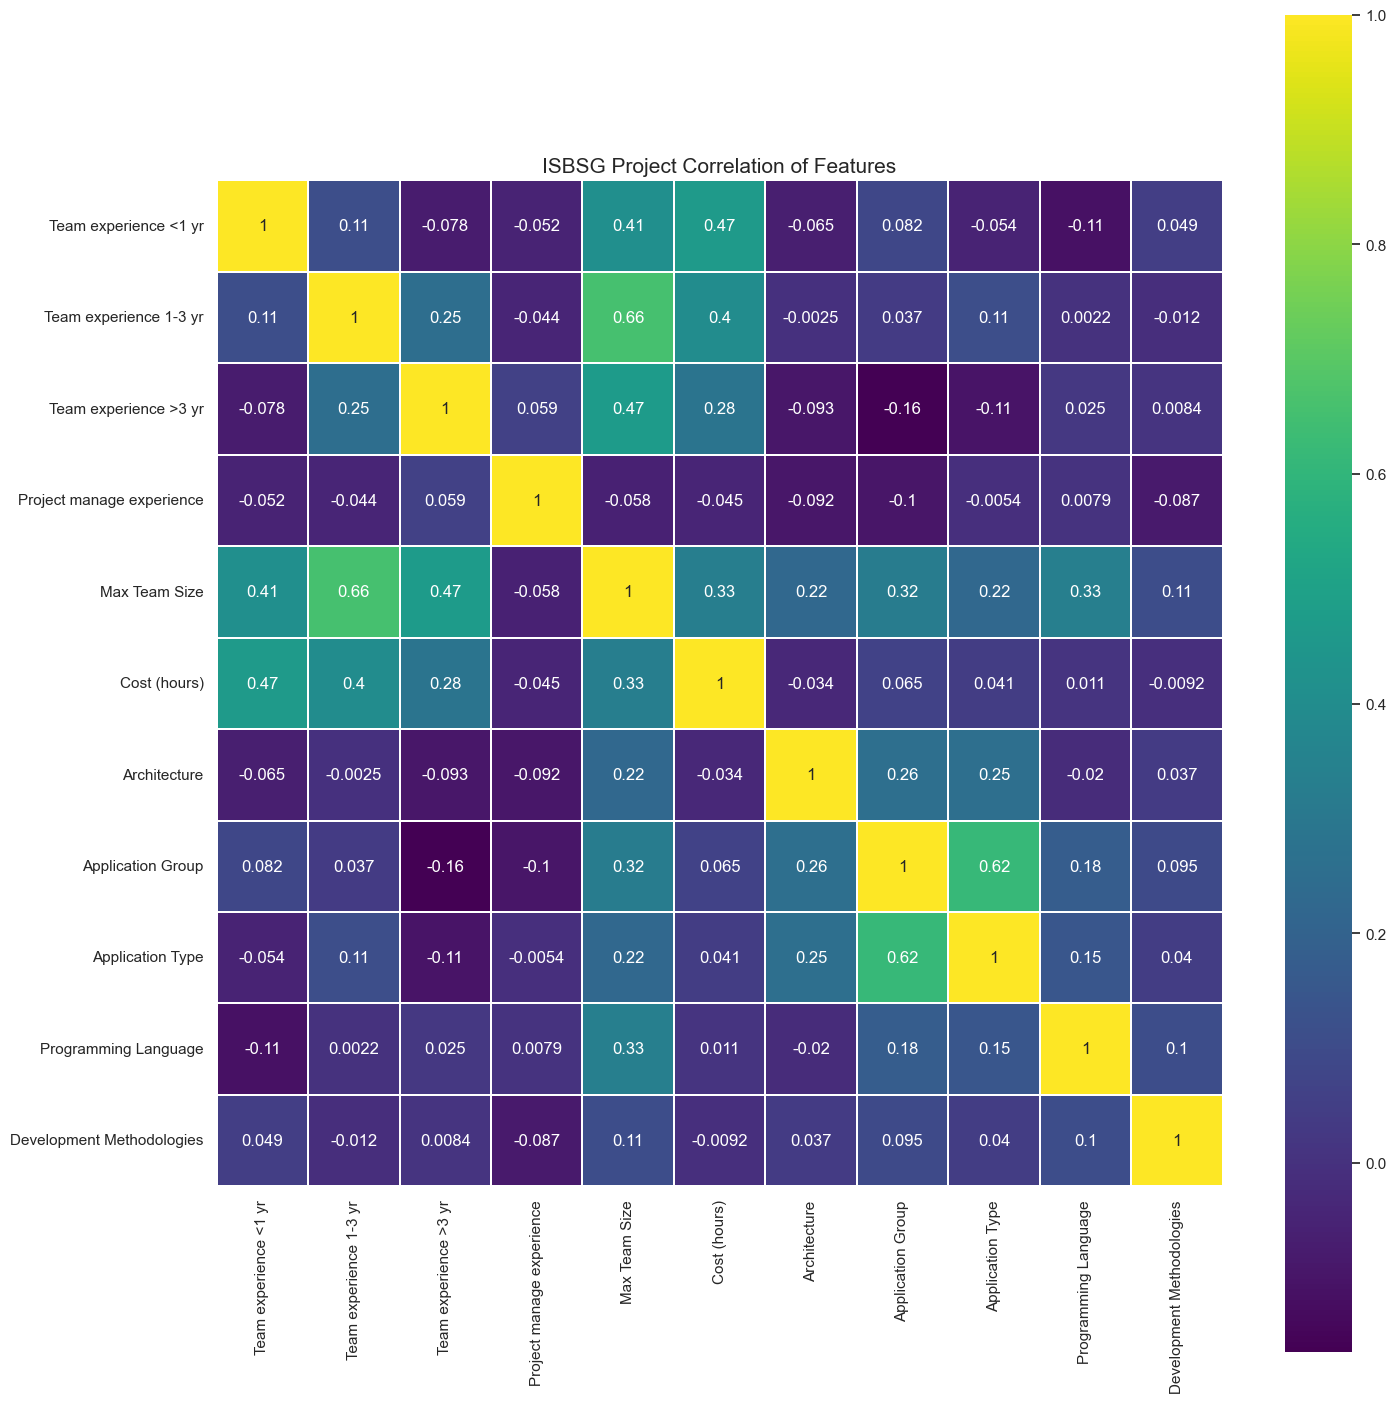

In [12]:
isbsg_2016_4 = isbsg_2016_3.rename(columns={"BA team experience <1 yr": "Team experience <1 yr", "BA team experience 1 to 3 yr": "Team experience 1-3 yr", "BA team experience >3 yr": "Team experience >3 yr", "Primary Programming Language": "Programming Language","Normalised Work Effort": "Cost (hours)"})
#isbsg_2016_3.rename(columns={"Normalised Work Effort": "Cost (hours)"})

colormap = plt.cm.viridis
plt.figure(figsize=(15,15))
plt.title('ISBSG Project Correlation of Features', y=1, size=15)
sns.set(font_scale=1)
sns.heatmap(isbsg_2016_4.drop(['ISBSG Project ID'], axis=1).astype(float).corr(),linewidths=0.1,vmax=1.0, square=True,cmap=colormap, linecolor='white', annot=True)
plt.tight_layout()
plt.savefig('corrlation of ISBSG 3.png')

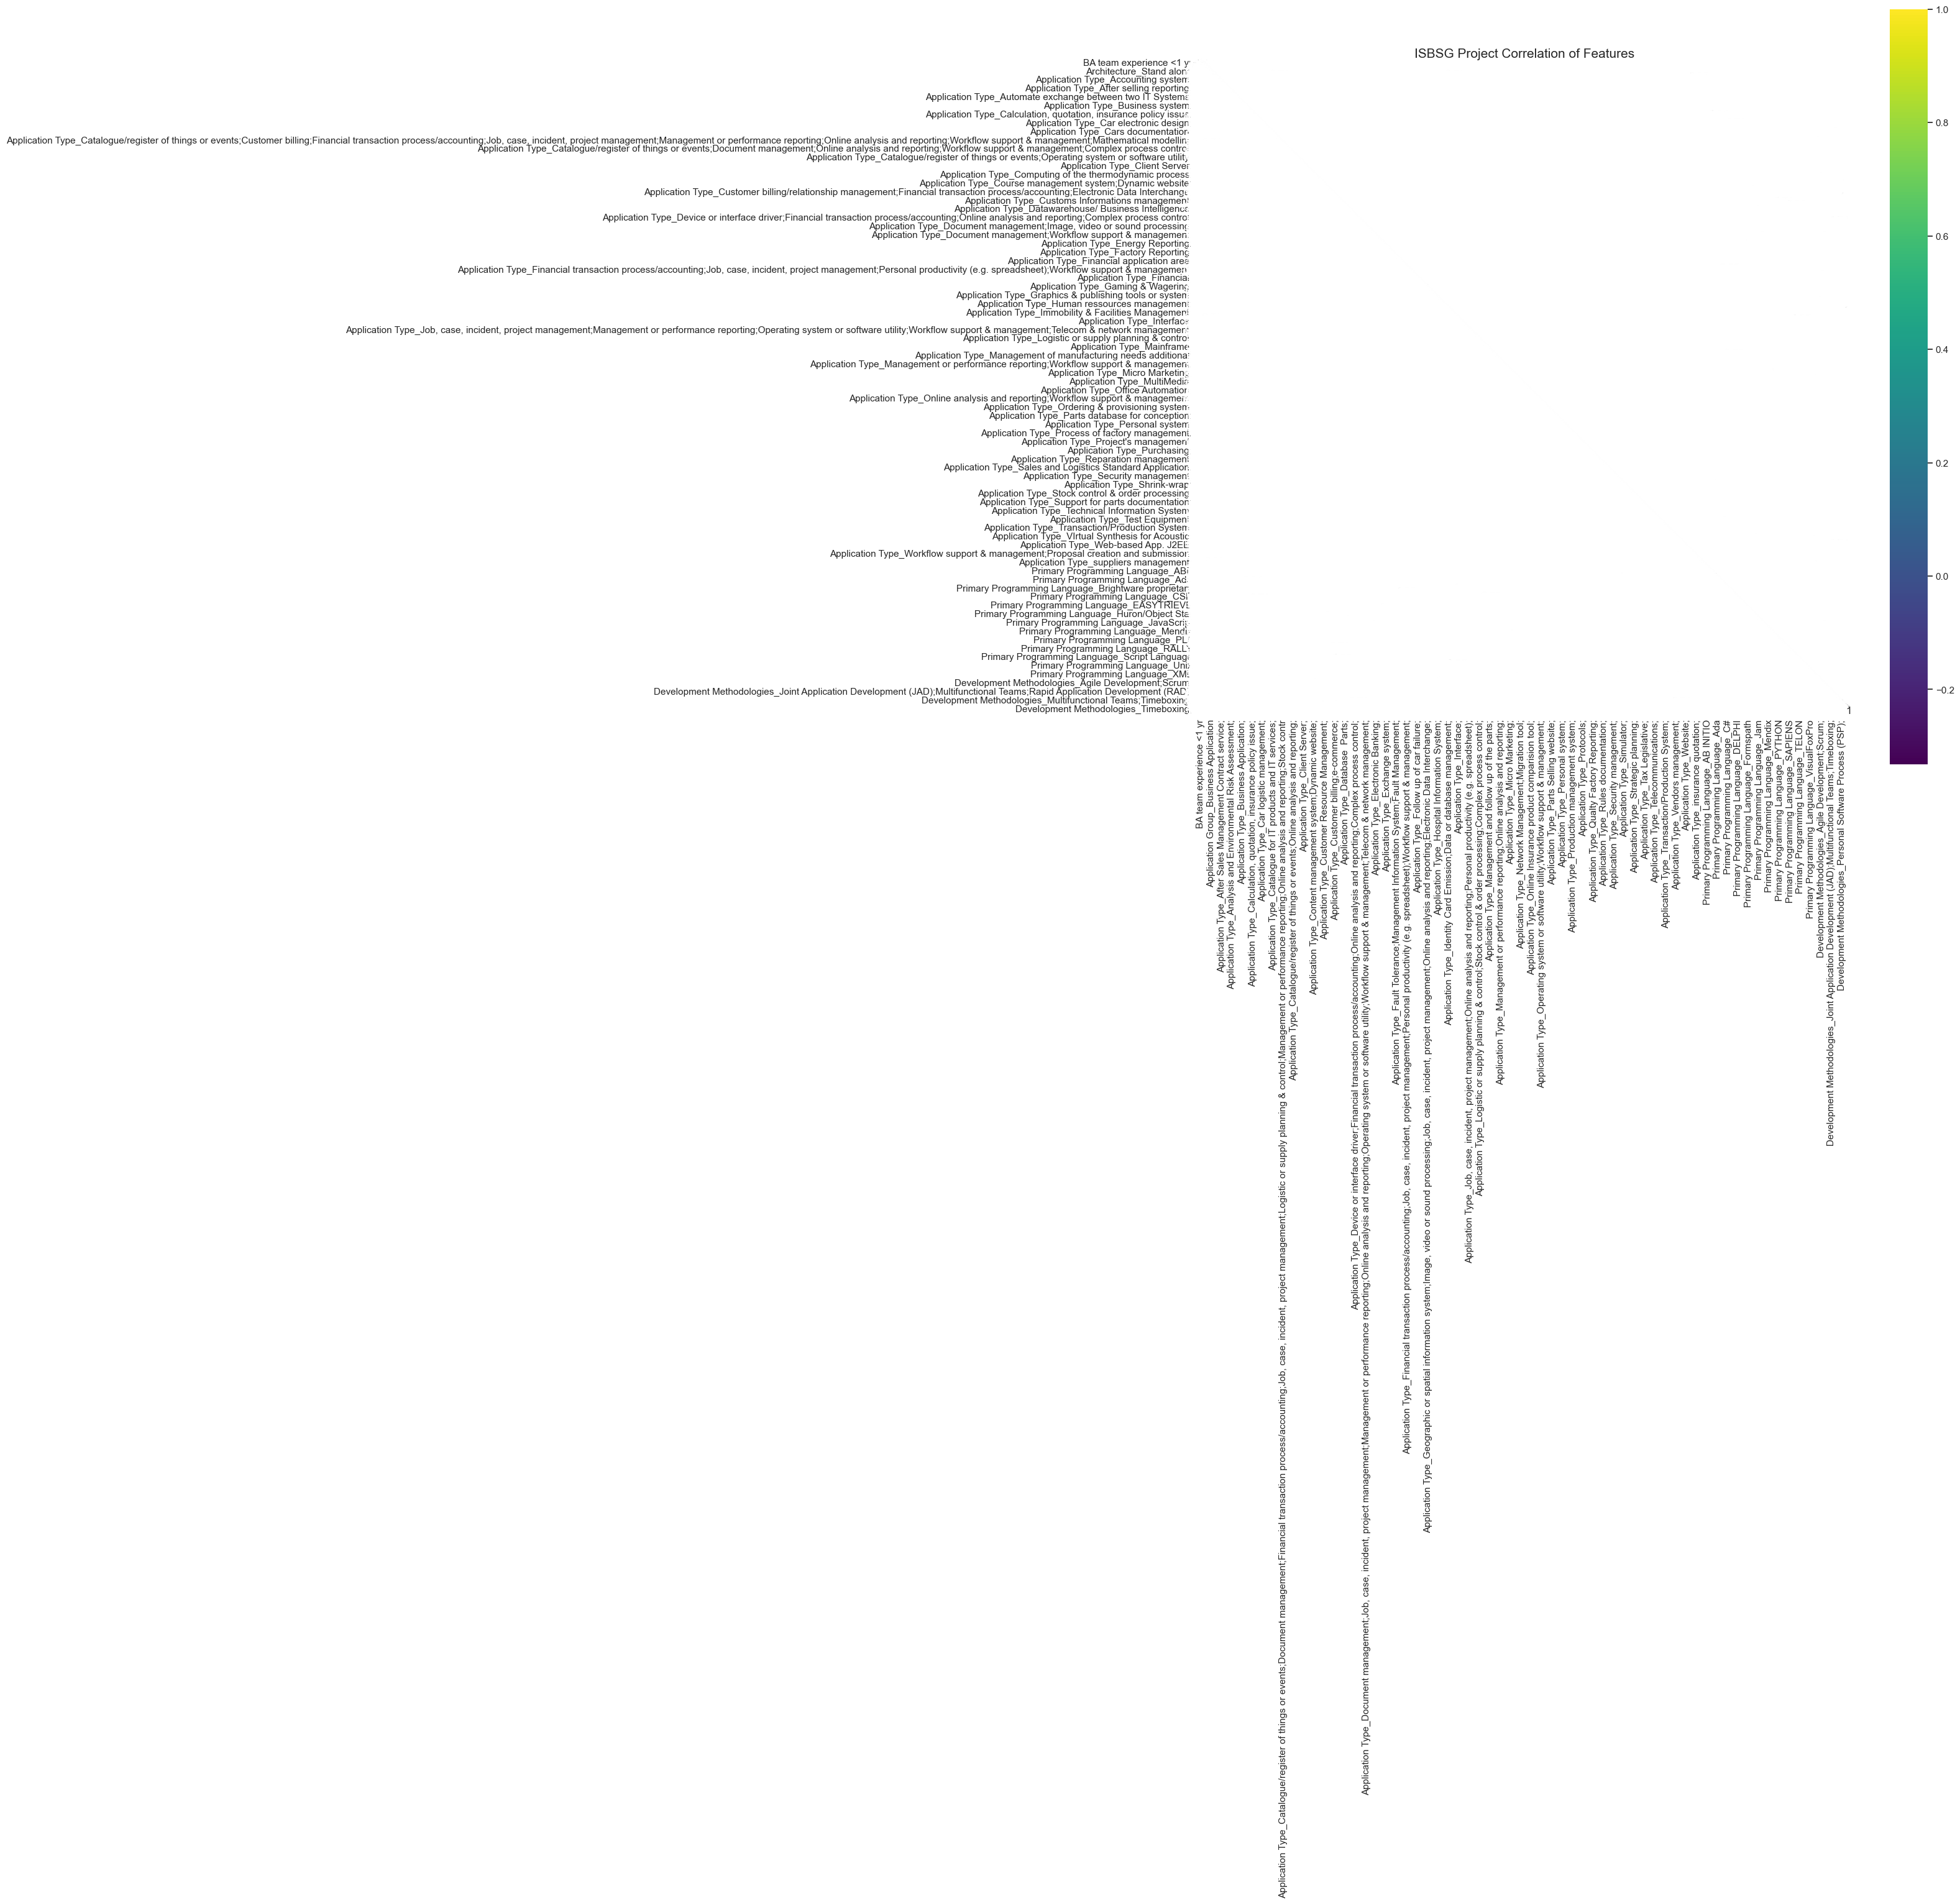

In [179]:
isbsg_2016_3 = isbsg_2016[['ISBSG Project ID','Architecture','BA team experience <1 yr','BA team experience 1 to 3 yr','BA team experience >3 yr','Project manage experience','Application Group','Application Type','Primary Programming Language','Max Team Size','Development Methodologies']]
df_encoded = pd.get_dummies(isbsg_2016_3, columns=['Architecture', 'Application Group', 'Application Type','Primary Programming Language','Development Methodologies'])
colormap = plt.cm.viridis
plt.figure(figsize=(15,15))
plt.title('ISBSG Project Correlation of Features', y=1, size=15)
sns.set(font_scale=1)
sns.heatmap(df_encoded.drop(['ISBSG Project ID'], axis=1).astype(float).corr(),linewidths=0.1,vmax=1.0, square=True,cmap=colormap, linecolor='white', annot=True)
plt.savefig('corrlation of ISBSG.png')

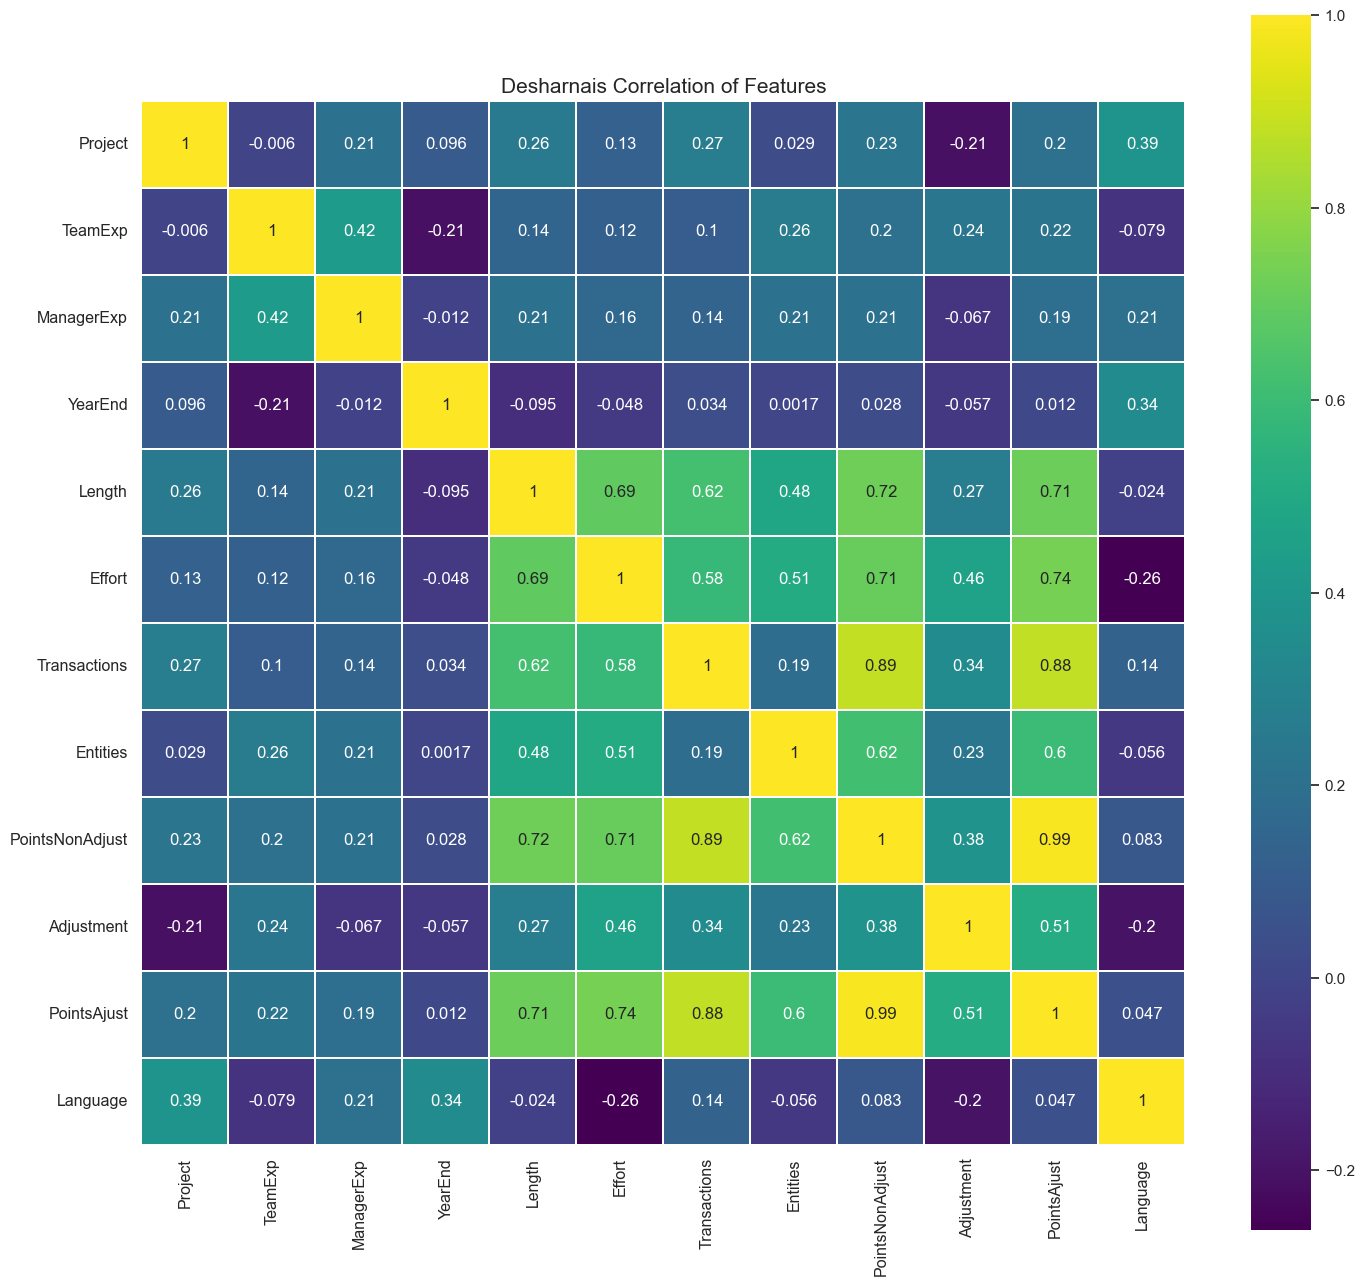

In [83]:
colormap = plt.cm.viridis
plt.figure(figsize=(15,15))
plt.title('Desharnais Correlation of Features', y=1, size=15)
sns.set(font_scale=1)
sns.heatmap(df_desharnais.drop(['id'], axis=1).astype(float).corr(),linewidths=0.1,vmax=1.0, square=True,cmap=colormap, linecolor='white', annot=True)
plt.savefig('corrlation of desharnais.png')

## COCOMO Dataset

In [7]:
df_cocomo = pd.read_csv('../Data/cocomo.csv',  header=0)
df_cocomo.head()

id name            category system_type  center  dev_year      dev_mode  \
0   1   de  avionicsmonitoring           g       2      1979  semidetached   
1   2   de  avionicsmonitoring           g       2      1979  semidetached   
2   3   de  avionicsmonitoring           g       2      1979  semidetached   
3   4   de  avionicsmonitoring           g       2      1979  semidetached   
4   5   de  avionicsmonitoring           g       2      1979  semidetached   

  rely data cplx  ... acap aexp pcap vexp lexp modp tool sced equivphyskloc  \
0    h    l    h  ...    n    n    n    n    h    h    n    l          25.9   
1    h    l    h  ...    n    n    n    n    h    h    n    l          24.6   
2    h    l    h  ...    n    n    n    n    h    h    n    l           7.7   
3    h    l    h  ...    n    n    n    n    h    h    n    l           8.2   
4    h    l    h  ...    n    n    n    n    h    h    n    l           9.7   

  act_effort  
0      117.6  
1      117.6  
2       31.2  
3       36.0  
4       25.2  

[5 rows x 24 columns]

In [8]:
df_cocomo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93 entries, 0 to 92
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             93 non-null     int64  
 1   name           93 non-null     object 
 2   category       93 non-null     object 
 3   system_type    93 non-null     object 
 4   center         93 non-null     int64  
 5   dev_year       93 non-null     int64  
 6   dev_mode       93 non-null     object 
 7   rely           93 non-null     object 
 8   data           93 non-null     object 
 9   cplx           93 non-null     object 
 10  time           93 non-null     object 
 11  stor           93 non-null     object 
 12  virt           93 non-null     object 
 13  turn           93 non-null     object 
 14  acap           93 non-null     object 
 15  aexp           93 non-null     object 
 16  pcap           93 non-null     object 
 17  vexp           93 non-null     object 
 18  lexp        

In [9]:
df_cocomo.describe()

id     center     dev_year  equivphyskloc   act_effort
count   93.000000  93.000000    93.000000      93.000000    93.000000
mean    47.752688   3.279570  1980.827957      94.022043   624.411828
std     28.229901   1.683459     3.335004     133.597947  1135.928065
min      1.000000   1.000000  1971.000000       0.900000     8.400000
25%     24.000000   2.000000  1979.000000      15.400000    70.000000
50%     47.000000   2.000000  1980.000000      47.500000   252.000000
75%     70.000000   5.000000  1983.000000     111.000000   600.000000
max    101.000000   6.000000  1987.000000     980.000000  8211.000000

In [10]:
df_cocomo.corr()

C:\Users\Justin\AppData\Local\Temp\ipykernel_71036\3962688033.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_cocomo.corr()


id    center  dev_year  equivphyskloc  act_effort
id             1.000000  0.639594 -0.323380       0.222124    0.394758
center         0.639594  1.000000 -0.485029       0.505346    0.421006
dev_year      -0.323380 -0.485029  1.000000      -0.471486   -0.354663
equivphyskloc  0.222124  0.505346 -0.471486       1.000000    0.594941
act_effort     0.394758  0.421006 -0.354663       0.594941    1.000000

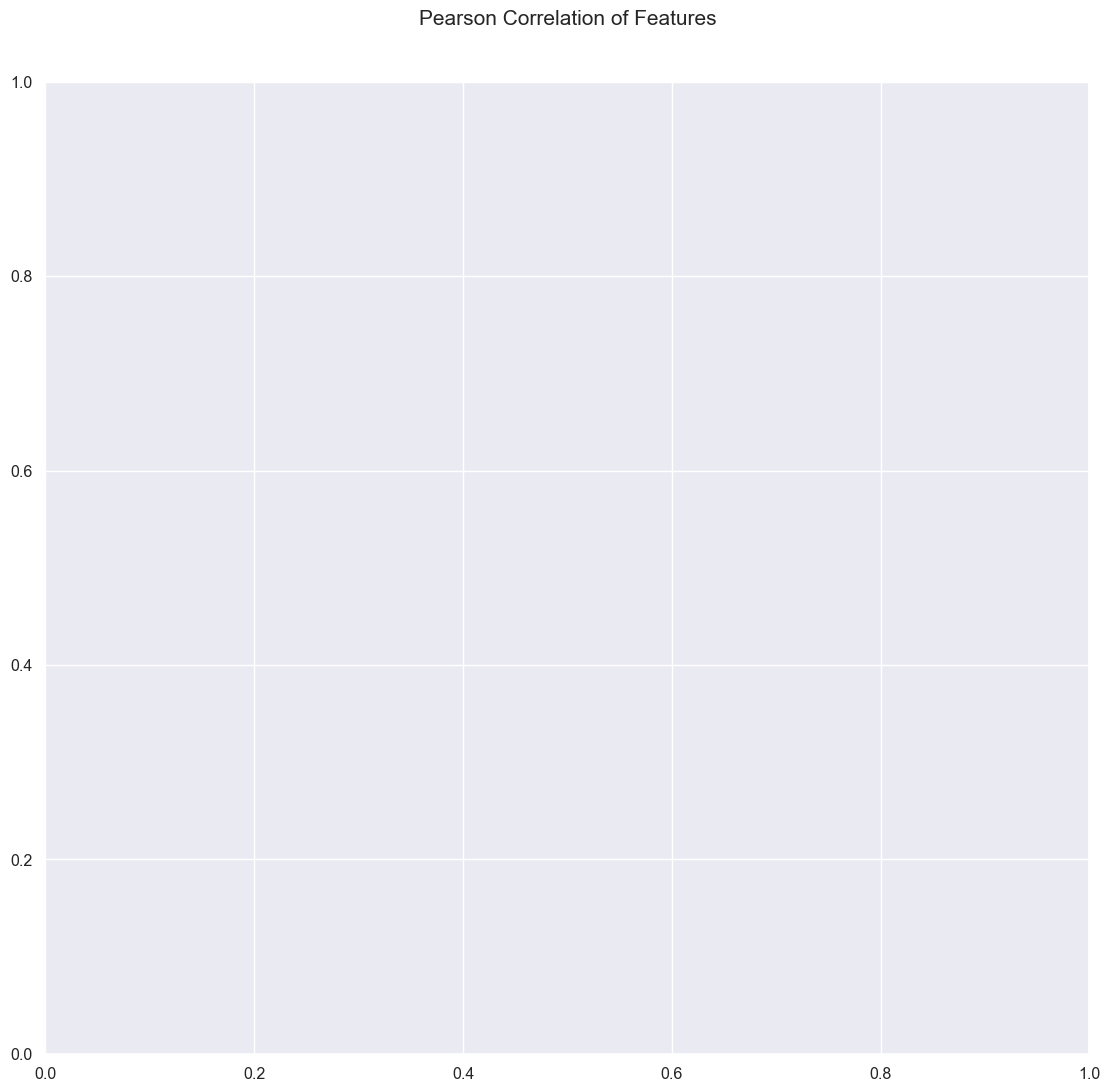

In [11]:
colormap = plt.cm.viridis
plt.figure(figsize=(12,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.set(font_scale=1.05)
#sns.heatmap(df_cocomo.drop(['id'], axis=1).astype(float).corr(),linewidths=0.1,vmax=1.0, square=True,cmap=colormap, linecolor='white', annot=True)

## MAXWELL Dataset

In [12]:
df_maxwell = pd.read_csv('../Data/maxwell.csv',  header=0)
df_maxwell.head()

Syear  App  Har  Dba  Ifc  Source  Telonuse  Nlan  T01  T02  ...  T10  T11  \
0     92    2    2    1    2       2         0     3    4    3  ...    5    4   
1     93    2    2    1    2       2         0     3    2    3  ...    3    4   
2     90    1    2    1    2       2         0     2    3    3  ...    5    4   
3     86    3    2    1    2       2         0     3    2    2  ...    4    5   
4     88    2    2    1    2       2         0     2    3    3  ...    4    3   

   T12  T13  T14  T15  Duration  Size  Time  Effort  
0    4    4    4    5        16   647     8    7871  
1    4    4    4    4         5   130     9     845  
2    3    2    3    3         8   254     6    2330  
3    4    3    2    3        16  1056     2   21272  
4    4    5    4    4        12   383     4    4224  

[5 rows x 27 columns]

In [13]:
df_maxwell.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 27 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Syear     62 non-null     int64
 1   App       62 non-null     int64
 2   Har       62 non-null     int64
 3   Dba       62 non-null     int64
 4   Ifc       62 non-null     int64
 5   Source    62 non-null     int64
 6   Telonuse  62 non-null     int64
 7   Nlan      62 non-null     int64
 8   T01       62 non-null     int64
 9   T02       62 non-null     int64
 10  T03       62 non-null     int64
 11  T04       62 non-null     int64
 12  T05       62 non-null     int64
 13  T06       62 non-null     int64
 14  T07       62 non-null     int64
 15  T08       62 non-null     int64
 16  T09       62 non-null     int64
 17  T10       62 non-null     int64
 18  T11       62 non-null     int64
 19  T12       62 non-null     int64
 20  T13       62 non-null     int64
 21  T14       62 non-null     int64
 22  T15 

In [14]:
df_maxwell.describe()

Syear        App        Har        Dba        Ifc     Source  \
count  62.000000  62.000000  62.000000  62.000000  62.000000  62.000000   
mean   89.580645   2.354839   2.612903   1.032258   1.935484   1.870968   
std     2.131331   0.993368   0.997617   0.442339   0.247676   0.337972   
min    85.000000   1.000000   1.000000   0.000000   1.000000   1.000000   
25%    88.000000   2.000000   2.000000   1.000000   2.000000   2.000000   
50%    90.000000   2.000000   2.000000   1.000000   2.000000   2.000000   
75%    91.000000   3.000000   3.000000   1.000000   2.000000   2.000000   
max    93.000000   5.000000   5.000000   4.000000   2.000000   2.000000   

        Telonuse       Nlan        T01        T02  ...        T10        T11  \
count  62.000000  62.000000  62.000000  62.000000  ...  62.000000  62.000000   
mean    0.241935   2.548387   3.048387   3.048387  ...   3.612903   3.419355   
std     0.431751   1.019119   0.998809   0.711208  ...   0.893599   0.984276   
min     0.000000   1.000000   1.000000   1.000000  ...   2.000000   2.000000   
25%     0.000000   2.000000   2.000000   3.000000  ...   3.000000   3.000000   
50%     0.000000   3.000000   3.000000   3.000000  ...   4.000000   3.000000   
75%     0.000000   3.000000   4.000000   3.000000  ...   4.000000   4.000000   
max     1.000000   4.000000   5.000000   5.000000  ...   5.000000   5.000000   

             T12        T13        T14        T15   Duration         Size  \
count  62.000000  62.000000  62.000000  62.000000  62.000000    62.000000   
mean    3.822581   3.064516   3.258065   3.338710  17.209677   673.306452   
std     0.690075   0.955930   1.007114   0.745336  10.651156   784.084505   
min     2.000000   1.000000   1.000000   1.000000   4.000000    48.000000   
25%     4.000000   2.000000   3.000000   3.000000  10.000000   232.500000   
50%     4.000000   3.000000   3.000000   3.000000  13.500000   385.000000   
75%     4.000000   4.000000   4.000000   4.000000  23.500000   640.750000   
max     5.000000   5.000000   5.000000   5.000000  54.000000  3643.000000   

            Time        Effort  
count  62.000000     62.000000  
mean    5.580645   8223.209677  
std     2.131331  10499.903168  
min     1.000000    583.000000  
25%     4.000000   2388.750000  
50%     6.000000   5189.500000  
75%     7.000000   9308.000000  
max     9.000000  63694.000000  

[8 rows x 27 columns]

In [15]:
df_maxwell.corr()

Syear       App       Har       Dba       Ifc    Source  \
Syear     1.000000 -0.160855  0.130573 -0.054970 -0.145259 -0.053592   
App      -0.160855  1.000000  0.025080 -0.213018  0.227835  0.040953   
Har       0.130573  0.025080  1.000000  0.288806 -0.235426 -0.588159   
Dba      -0.054970 -0.213018  0.288806  1.000000  0.019308 -0.081358   
Ifc      -0.145259  0.227835 -0.235426  0.019308  1.000000  0.486446   
Source   -0.053592  0.040953 -0.588159 -0.081358  0.486446  1.000000   
Telonuse  0.450547 -0.012330 -0.083487 -0.041535  0.148359  0.217443   
Nlan      0.334031  0.015149  0.034849  0.032846 -0.117324 -0.029171   
T01       0.117500 -0.331517  0.298793  0.219039 -0.185978 -0.418269   
T02      -0.051284  0.091319 -0.065589 -0.109262  0.297210  0.231004   
T03      -0.174934  0.135720 -0.022723 -0.086312 -0.214364 -0.204749   
T04       0.198848 -0.053425 -0.102596 -0.179968  0.168360  0.107676   
T05       0.316423 -0.117517 -0.111799 -0.057153 -0.447316 -0.246405   
T06       0.536988 -0.163278 -0.173268 -0.149769 -0.036894  0.085617   
T07      -0.108663 -0.097636  0.142590  0.268432 -0.296664 -0.273059   
T08      -0.475263 -0.099184 -0.165898  0.053808  0.084925  0.073700   
T09       0.193160 -0.231196  0.012116 -0.056260 -0.244019 -0.096775   
T10       0.119950 -0.322890 -0.097285  0.032109 -0.188760 -0.005253   
T11       0.225865 -0.020553 -0.049008 -0.182191 -0.021692  0.214607   
T12       0.115776 -0.074058 -0.172835 -0.034649 -0.355817  0.040813   
T13      -0.187659 -0.041767 -0.059334  0.188844 -0.120613  0.127672   
T14       0.318550  0.087218  0.247906  0.128203 -0.195045 -0.093218   
T15       0.235356 -0.032141 -0.019202  0.065764 -0.412511 -0.214129   
Duration -0.412739  0.147793  0.060219  0.102926  0.228926 -0.087995   
Size      0.017363  0.056581  0.058396 -0.005985 -0.091403 -0.121408   
Time      1.000000 -0.160855  0.130573 -0.054970 -0.145259 -0.053592   
Effort   -0.197499  0.044230 -0.060339 -0.012853  0.074087  0.030936   

          Telonuse      Nlan       T01       T02  ...       T10       T11  \
Syear     0.450547  0.334031  0.117500 -0.051284  ...  0.119950  0.225865   
App      -0.012330  0.015149 -0.331517  0.091319  ... -0.322890 -0.020553   
Har      -0.083487  0.034849  0.298793 -0.065589  ... -0.097285 -0.049008   
Dba      -0.041535  0.032846  0.219039 -0.109262  ...  0.032109 -0.182191   
Ifc       0.148359 -0.117324 -0.185978  0.297210  ... -0.188760 -0.021692   
Source    0.217443 -0.029171 -0.418269  0.231004  ... -0.005253  0.214607   
Telonuse  1.000000  0.438675 -0.065606 -0.198912  ... -0.008224  0.374562   
Nlan      0.438675  1.000000  0.118450 -0.172916  ...  0.290923  0.567783   
T01      -0.065606  0.118450  1.000000 -0.095660  ...  0.223370  0.012372   
T02      -0.198912 -0.172916 -0.095660  1.000000  ...  0.004160 -0.216809   
T03      -0.063558  0.070828  0.275933 -0.106525  ...  0.119496  0.040607   
T04       0.114141  0.078857  0.033399 -0.019188  ...  0.174777  0.094743   
T05       0.174801  0.392527  0.273581 -0.231573  ...  0.262108  0.157885   
T06       0.407413  0.238354  0.077763  0.109209  ...  0.097145  0.060344   
T07       0.015657  0.210526  0.333392 -0.172324  ...  0.281539  0.235297   
T08      -0.123075 -0.023898 -0.024384 -0.154878  ...  0.102825  0.035429   
T09       0.052699  0.147213  0.304684 -0.191952  ...  0.605523  0.455105   
T10      -0.008224  0.290923  0.223370  0.004160  ...  1.000000  0.318057   
T11       0.374562  0.567783  0.012372 -0.216809  ...  0.318057  1.000000   
T12       0.146431  0.350407  0.012659 -0.115831  ...  0.338740  0.304419   
T13      -0.117879  0.080880  0.048186 -0.004667  ...  0.048907 -0.064072   
T14      -0.145941  0.195274 -0.142993  0.096717  ... -0.032906  0.021339   
T15       0.148721  0.377338  0.241875 -0.124202  ...  0.396994  0.272478   
Duration  0.035131  0.067766  0.219388 -0.124715  ... -0.036115  0.088425   
Size      0.151446  0.386770  0.252199 -0.057676  ...  0.201622  0.4373

<AxesSubplot: title={'center': 'Pearson Correlation of Features'}>

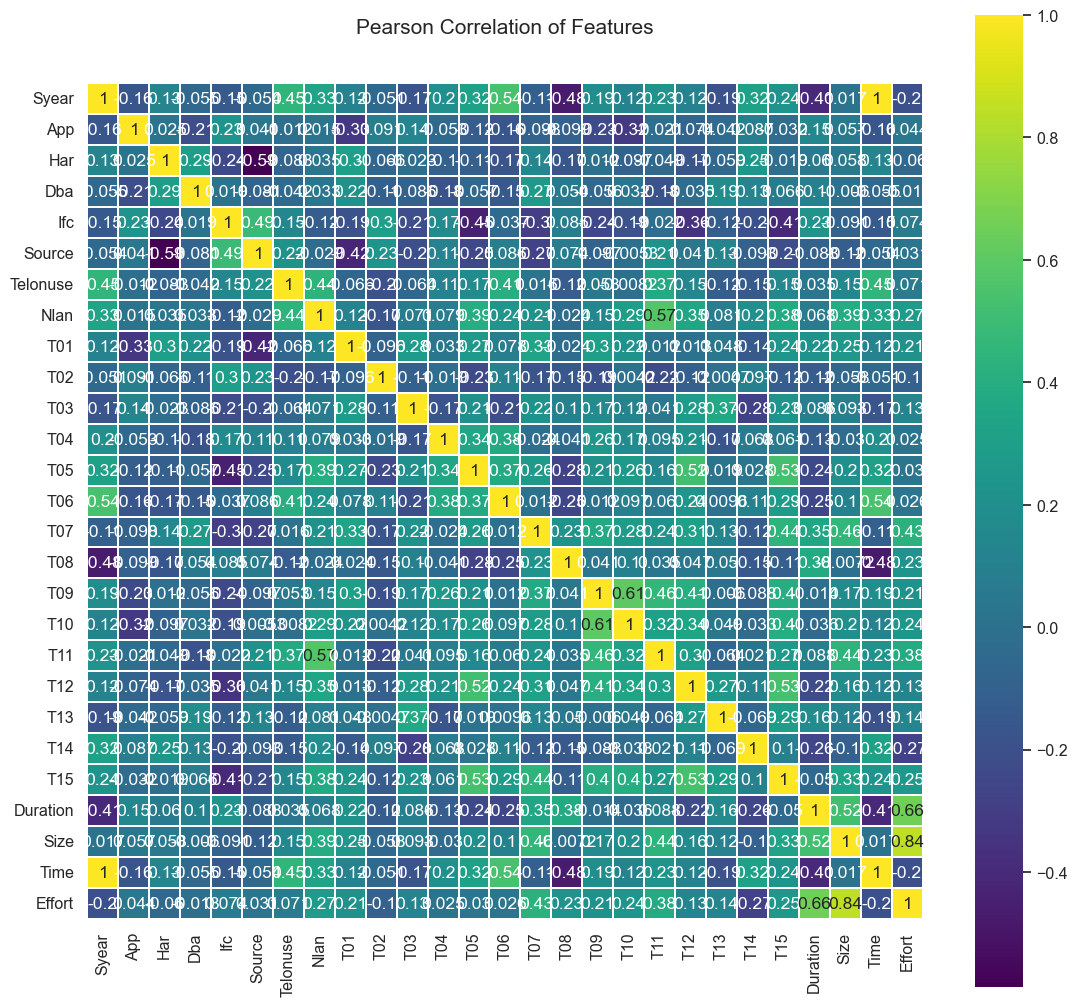

In [16]:
colormap = plt.cm.viridis
plt.figure(figsize=(12,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.set(font_scale=1.05)
sns.heatmap(df_maxwell.astype(float).corr(),linewidths=0.1,vmax=1.0, square=True,cmap=colormap, linecolor='white', annot=True)

## Models Costruction

## 1) Knn Regression

In [261]:
features = [ 'TeamExp', 'ManagerExp', 'YearEnd', 'Length', 'Transactions', 'Entities',
        'PointsNonAdjust', 'Adjustment', 'PointsAjust']

max_corr_features = ['Length', 'Transactions', 'Entities','PointsNonAdjust','PointsAjust']

X = df_desharnais[max_corr_features]
y = df_desharnais['Effort']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=30)

neigh = KNeighborsRegressor(n_neighbors=3, weights='uniform')
neigh.fit(X_train, y_train) 
print(neigh.score(X_test, y_test))

0.7379861869550943


In [327]:
y_pred_knn = neigh.predict(X_test)

In [328]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred_knn, squared=False)


1127.4959436662605

## 2) Linear Regression


In [264]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=22)

model = LinearRegression()
model.fit(X_train, y_train)
print(model.score(X_test, y_test))

0.7680074954440715


In [326]:
y_pred_lr = model.predict(X_test)
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred_lr, squared=False)

1447.043767845194

## 3) Support Vector Machine


In [266]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=22)

parameters = {'kernel':('linear', 'rbf'), 'C':[1,2,3,4,5,6,7,8,9,10]}

svr = SVR()
LinearSVC = GridSearchCV(svr, parameters)
LinearSVC.fit(X_train, y_train)
print("Best params hash: {}".format(LinearSVC.best_params_))
print(LinearSVC.score(X_test, y_test))

Best params hash: {'C': 7, 'kernel': 'linear'}
0.7705669964889383


In [268]:
y_pred_svm = LinearSVC.predict(X_test)
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred_svm, squared=False)

2665.295256806875

In [24]:
features = [ 'TeamExp', 'ManagerExp', 'YearEnd', 'Length', 'Transactions', 'Entities',
        'PointsNonAdjust', 'Adjustment', 'PointsAjust']

max_corr_features = ['Length', 'Transactions', 'Entities','PointsNonAdjust','PointsAjust']

X = df_desharnais[max_corr_features]
y = df_desharnais['Effort']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=30)

neigh = KNeighborsRegressor(n_neighbors=3, weights='uniform')
neigh.fit(X_train, y_train) 
print(f"knn regressor desharnais score {neigh.score(X_test, y_test)}")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=22)

model = LinearRegression()
model.fit(X_train, y_train)
print(f"linear rgression desharnais score: {model.score(X_test, y_test)}")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=22)

parameters = {'kernel':('linear', 'rbf'), 'C':[1,2,3,4,5,6,7,8,9,10]}

svr = SVR()
LinearSVC = GridSearchCV(svr, parameters)
LinearSVC.fit(X_train, y_train)

print(f"SVC desharnais score: {LinearSVC.score(X_test, y_test)}")

knn regressor desharnais score 0.7379861869550943
linear rgression desharnais score: 0.7680074954440715
SVC desharnais score: 0.7705669964889383


In [80]:
max_corr_features = ['Size', 'Duration', 'Time','Syear','App','Source','Nlan','Har','Dba','Ifc','Telonuse']

X = df_maxwell[max_corr_features]
y = df_maxwell['Effort']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=30)

neigh = KNeighborsRegressor(n_neighbors=3, weights='uniform')
neigh.fit(X_train, y_train) 
print(f"knn regressor maxwell score {neigh.score(X_test, y_test)}")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=22)

model = LinearRegression()
model.fit(X_train, y_train)
print(f"linear rgression maxwell score: {model.score(X_test, y_test)}")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=22)

parameters = {'kernel':('linear', 'rbf'), 'C':[1,2,3,8,9,10,50,100,1000,2000]}

svr = SVR()
LinearSVC = GridSearchCV(svr, parameters)
LinearSVC.fit(X_train, y_train)
print("Best params hash: {}".format(LinearSVC.best_params_))

print(f"SVC maxwell score: {LinearSVC.score(X_test, y_test)}")

knn regressor maxwell score -1.8606829127677225
linear rgression maxwell score: 0.7028101063159735
Best params hash: {'C': 2000, 'kernel': 'rbf'}
SVC maxwell score: 0.2522991176377324


In [323]:
from sklearn.preprocessing import OneHotEncoder

In [324]:
max_corr_features = ['center', 'equivphyskloc', 'dev_year','data','system_type','rely','stor','virt','tool']
enc = OneHotEncoder(handle_unknown='ignore')
X = enc.fit_transform(isbsg_2016[max_corr_features])
y = df_cocomo['act_effort']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=30)

neigh = KNeighborsRegressor(n_neighbors=4, weights='uniform')
neigh.fit(X_train, y_train) 
print(f"knn regressor score {neigh.score(X_test, y_test)}")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=22)

model = LinearRegression()
model.fit(X_train, y_train)
print(f"linear rgression score: {model.score(X_test, y_test)}")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=22)

parameters = {'kernel':('linear', 'rbf'), 'C':[1,2,3,4,5,6,7,8,9,10,50,100,1000,2000]}

svr = SVR()
LinearSVC = GridSearchCV(svr, parameters)
LinearSVC.fit(X_train, y_train)
print("Best params hash: {}".format(LinearSVC.best_params_))

print(f"SVC score: {LinearSVC.score(X_test, y_test)}")

KeyError: "None of [Index(['center', 'equivphyskloc', 'dev_year', 'data', 'system_type', 'rely',\n       'stor', 'virt', 'tool'],\n      dtype='object')] are in the [columns]"

In [325]:
y_pred_svm = LinearSVC.predict(X_test)
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred_svm, squared=False)

1475.7074869413123

In [334]:
X

<7518x1017 sparse matrix of type '<class 'numpy.float64'>'
	with 75180 stored elements in Compressed Sparse Row format>

In [335]:
max_corr_features = ['Architecture','BA team experience <1 yr','BA team experience 1 to 3 yr','BA team experience >3 yr','Project manage experience','Application Group','Application Type','Primary Programming Language','Max Team Size','Development Methodologies']
enc = OneHotEncoder(handle_unknown='ignore')
X = enc.fit_transform(isbsg_2016[max_corr_features])
y = isbsg_2016['Normalised Work Effort'].fillna(0)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=30)

neigh = KNeighborsRegressor(n_neighbors=4, weights='uniform')
neigh.fit(X_train, y_train) 
print(f"knn regressor score {neigh.score(X_test, y_test)}")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=22)

model = LinearRegression()
model.fit(X_train, y_train)
print(f"linear rgression score: {model.score(X_test, y_test)}")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=22)

parameters = {'kernel':('linear', 'rbf'), 'C':[1,2,3,4,5,6,7,8,9,10,50,100,1000,2000]}

svr = SVR()
LinearSVC = GridSearchCV(svr, parameters)
LinearSVC.fit(X_train, y_train)
print("Best params hash: {}".format(LinearSVC.best_params_))

print(f"SVC score: {LinearSVC.score(X_test, y_test)}")

knn regressor score -1.452896633968905
linear rgression score: 0.050685849607941535
Best params hash: {'C': 2000, 'kernel': 'linear'}
SVC score: 0.02867211958168059


In [336]:
y_pred_svm = neigh.predict(X_test)
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred_svm, squared=False)

15813.596625375063

In [337]:
y_pred_svm = model.predict(X_test)
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred_svm, squared=False)

14309.824862469895

In [338]:
y_pred_svm = LinearSVC.predict(X_test)
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred_svm, squared=False)

14474.789895039583

In [52]:
df_cocomo.corr().unstack().sort_values(ascending=False).head(40)

C:\Users\Justin\AppData\Local\Temp\ipykernel_71036\1464306682.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_cocomo.corr().unstack().sort_values(ascending=False).head(40)


id             id               1.000000
center         center           1.000000
equivphyskloc  equivphyskloc    1.000000
dev_year       dev_year         1.000000
act_effort     act_effort       1.000000
center         id               0.639594
id             center           0.639594
act_effort     equivphyskloc    0.594941
equivphyskloc  act_effort       0.594941
center         equivphyskloc    0.505346
equivphyskloc  center           0.505346
act_effort     center           0.421006
center         act_effort       0.421006
act_effort     id               0.394758
id             act_effort       0.394758
equivphyskloc  id               0.222124
id             equivphyskloc    0.222124
               dev_year        -0.323380
dev_year       id              -0.323380
act_effort     dev_year        -0.354663
dev_year       act_effort      -0.354663
               equivphyskloc   -0.471486
equivphyskloc  dev_year        -0.471486
dev_year       center          -0.485029
center         d

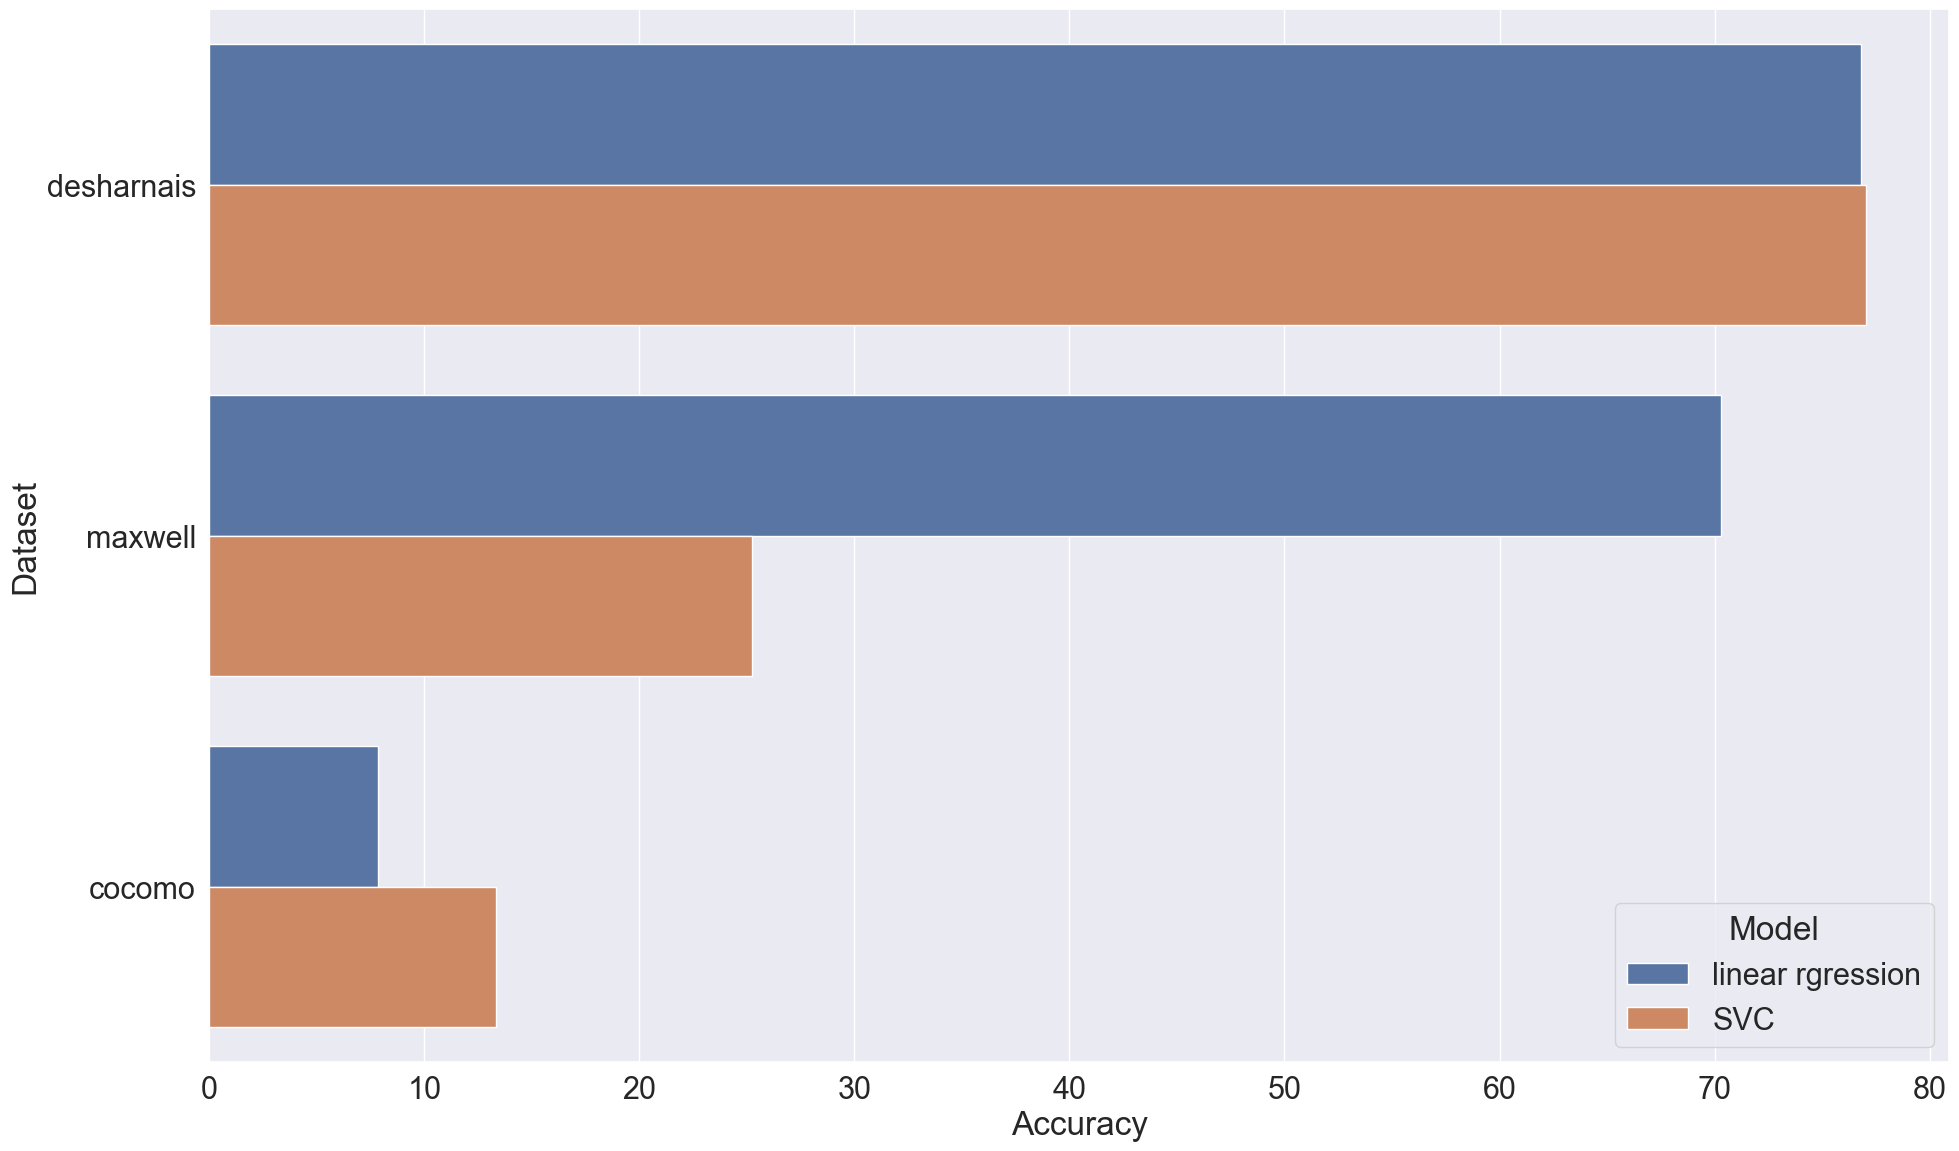

In [81]:
data = {'Model': ['linear rgression','linear rgression','linear rgression','SVC','SVC','SVC'],
                'Accuracy': [76.80         ,70.28          ,7.83        ,77.05          ,25.22        ,13.34],
        'Dataset': ['desharnais'       ,'maxwell'        ,'cocomo', 'desharnais'       ,'maxwell'        ,'cocomo']}

df = pd.DataFrame(data)
sns.set(rc={'figure.figsize':(20,13)})
sns.set(font_scale = 2)
ax = sns.barplot(x="Accuracy", y="Dataset", hue='Model', data=df)
plt.savefig('Baseline_1.png')

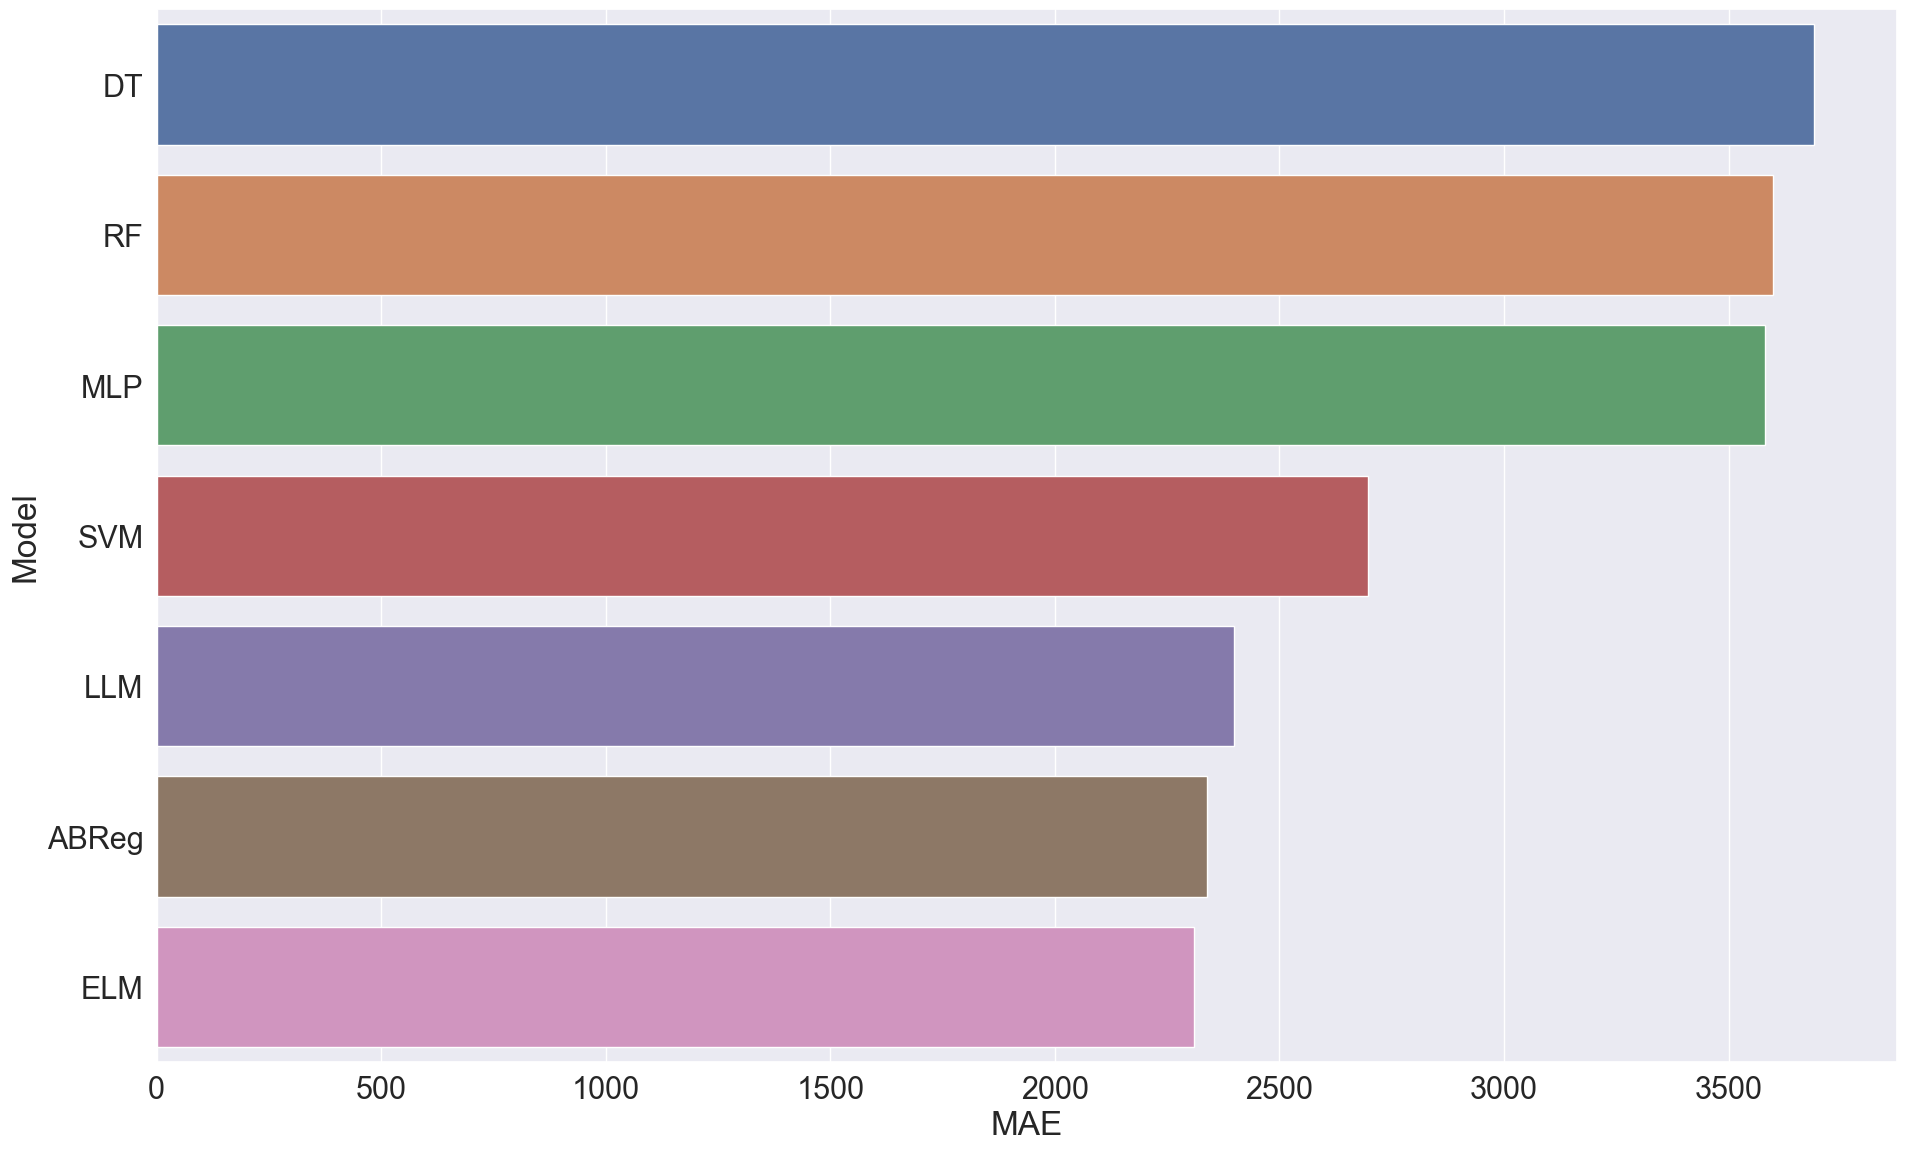

In [65]:
data = {'Model': ['DT','RF','MLP','SVM','LLM','ABReg','ELM'],
                'MAE': [3689.5  ,3599.5  ,3580.2,    2696.9  ,2398.2, 2339.2, 2310.7]}

df = pd.DataFrame(data)
sns.set(rc={'figure.figsize':(20,13)})
sns.set(font_scale = 2)
ax = sns.barplot(x="MAE", y="Model", data=df)
plt.savefig('MAE.png')

## Results 

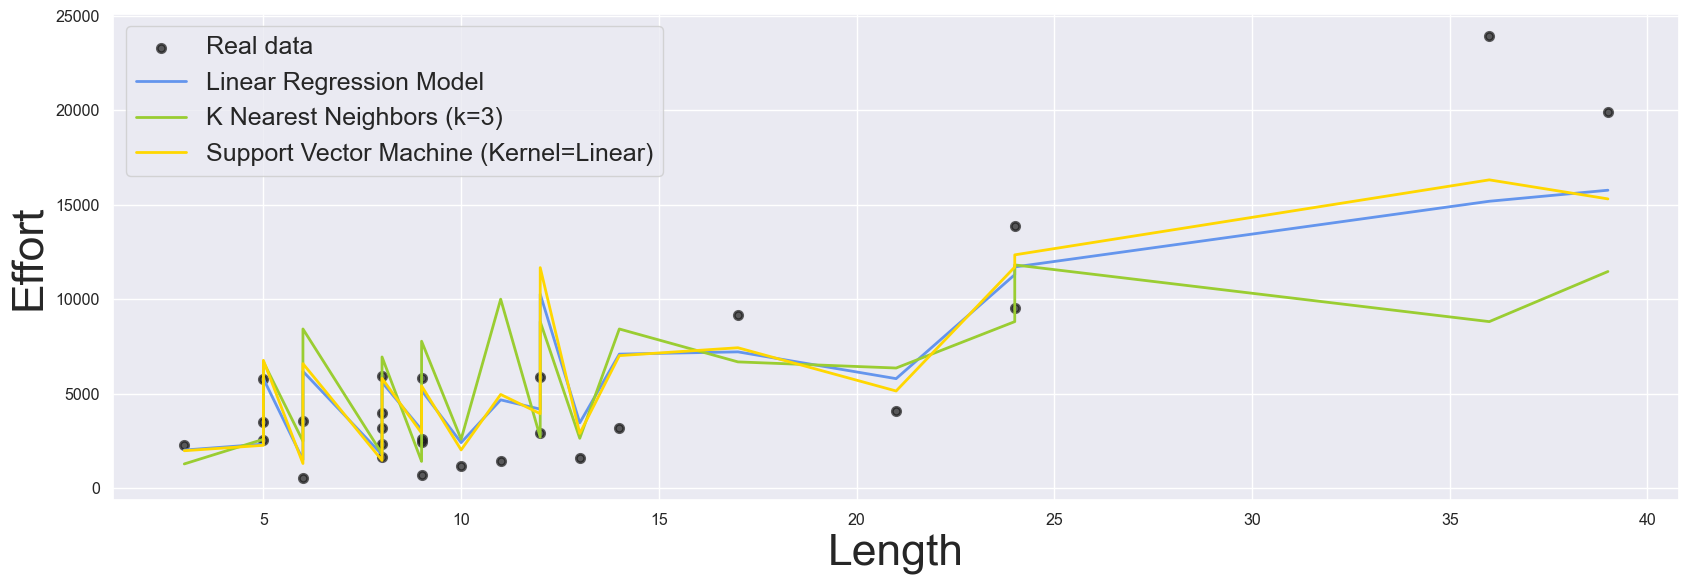

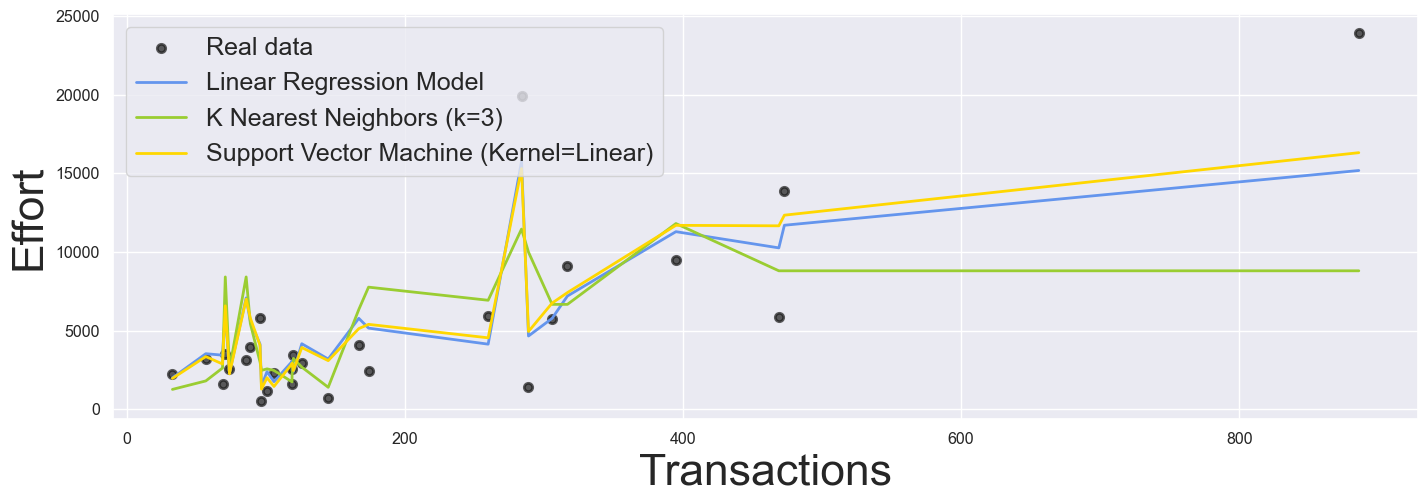

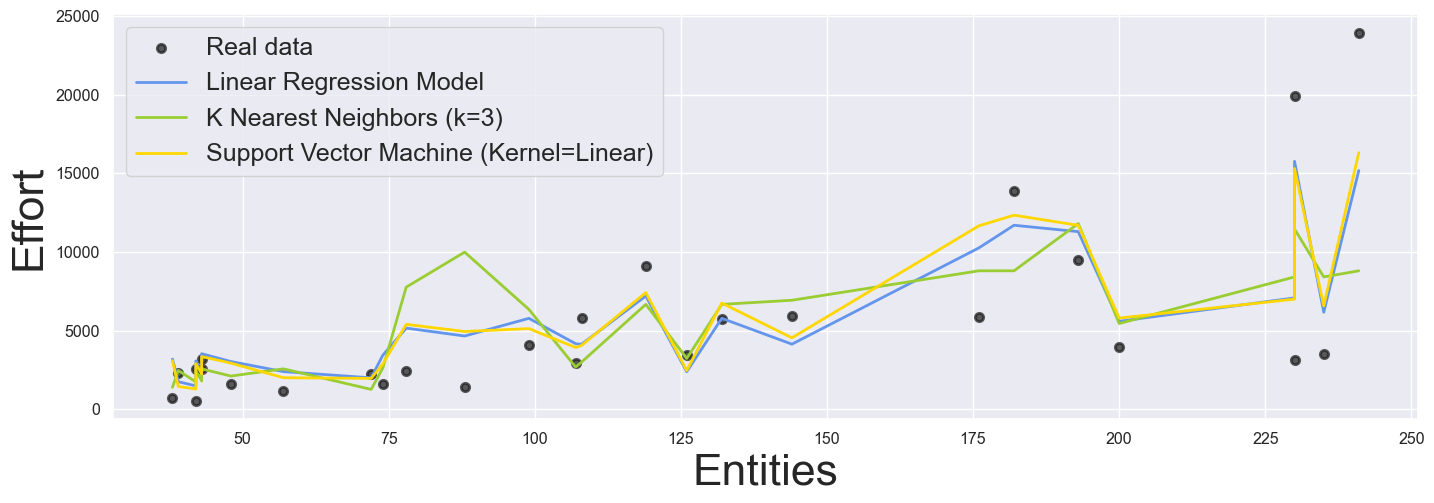

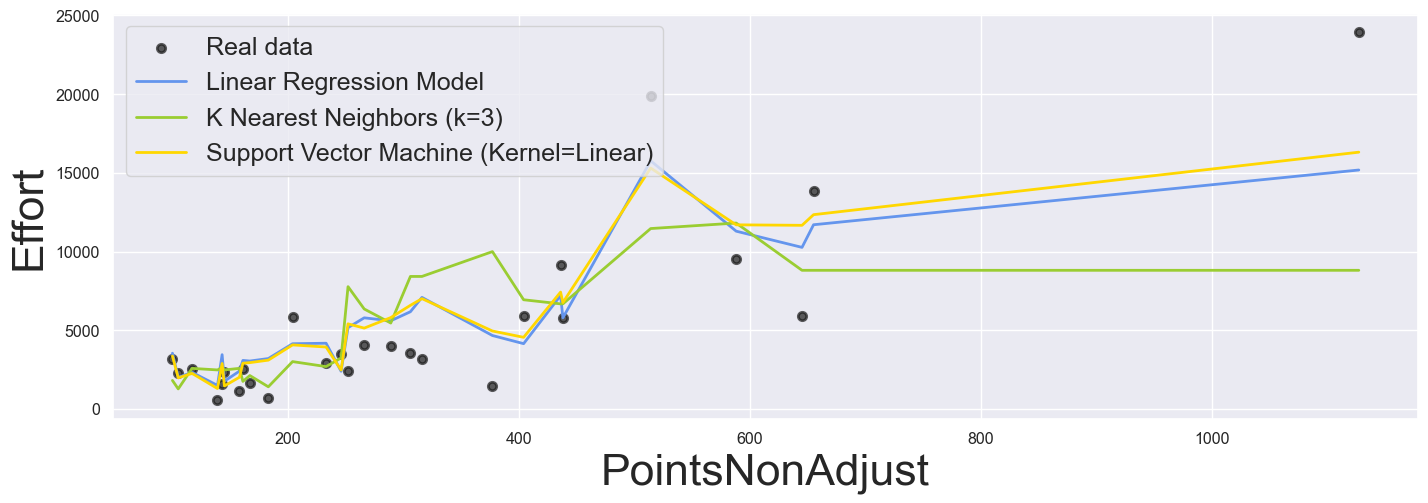

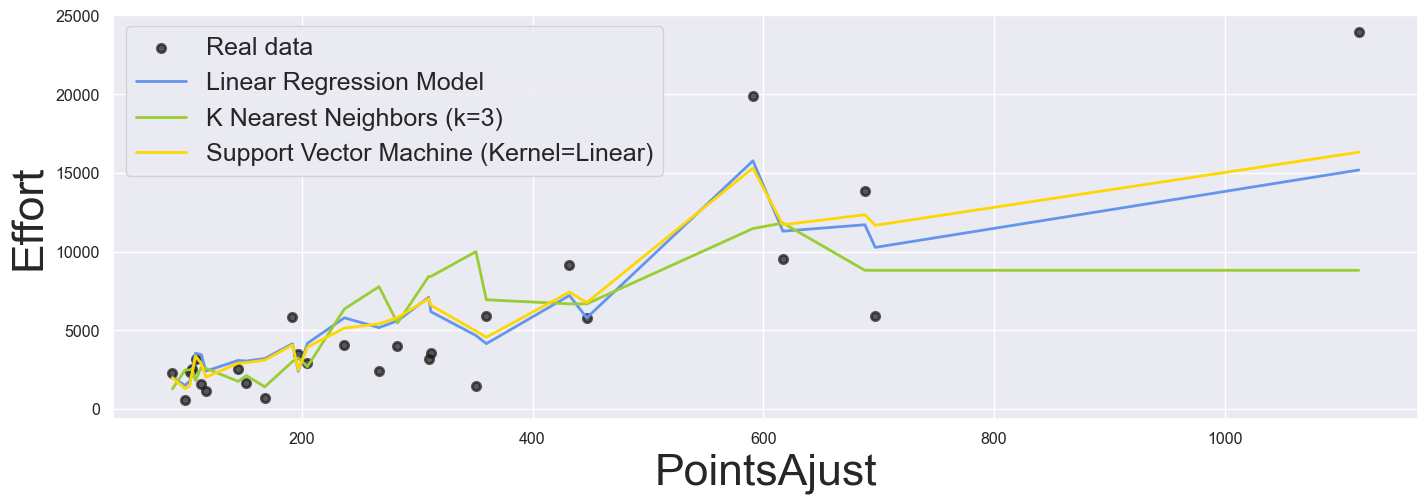

In [22]:

plt.figure(figsize=(18,6))
plt.rcParams['legend.fontsize'] = 18
plt.rcParams['legend.loc']= 'upper left'
plt.rcParams['axes.labelsize']= 32

for i, feature in enumerate(max_corr_features):
   
    # Knn Regression Model 
    xs, ys = zip(*sorted(zip(X_test[feature], neigh.fit(X_train, y_train).predict(X_test))))
    
    # Linear Regression Model 
    model_xs, model_ys = zip(*sorted(zip(X_test[feature], model.fit(X_train, y_train).predict(X_test))))
    
    # Support Vector Machine
    svc_model_xs, svc_model_ys = zip(*sorted(zip(X_test[feature], LinearSVC.fit(X_train, y_train).predict(X_test))))

    plt.scatter(X_test[feature], y_test, label='Real data', lw=2,alpha= 0.7, c='k' )
    plt.plot(model_xs, model_ys , lw=2, label='Linear Regression Model', c='cornflowerblue')
    plt.plot(xs, ys , lw=2,label='K Nearest Neighbors (k=3)', c='yellowgreen')
    plt.plot(svc_model_xs, svc_model_ys , lw=2,label='Support Vector Machine (Kernel=Linear)', c='gold')
    
    plt.xlabel(feature)
    plt.ylabel('Effort')
    plt.legend()
    plt.show()